In [1]:
# Acid resistance - lactobacilli

In [132]:
# Load packages
library(dplyr)
library(tidyr)
library(hms)
library(lubridate)
library(ggplot2)
library(purrr)
library(patchwork)
library(tidyverse)
# library(reshape2)
library(stringr)
library(pracma)  # for trapz()

In [133]:
setwd('/home/strawperry/Documents/Masters/unu_fellowship')

getwd()


[1] "/home/strawperry/Documents/Masters/unu_fellowship"

In [134]:
# list files
library(readr)
library(stringr)
library(purrr)

files <- list.files(
  path = "acid-triplicates-feb",
  pattern = "_[abc]\\.tsv$",
  recursive = TRUE,
  full.names = TRUE
)
files

[1] "acid-triplicates-feb/050226/acid-lactos-050226_0h_R1_a.tsv" 
 [2] "acid-triplicates-feb/050226/acid-lactos-050226_0h_R1_b.tsv" 
 [3] "acid-triplicates-feb/050226/acid-lactos-050226_0h_R2_a.tsv" 
 [4] "acid-triplicates-feb/050226/acid-lactos-050226_0h_R2_b.tsv" 
 [5] "acid-triplicates-feb/050226/acid-lactos-050226_0h_R3_a.tsv" 
 [6] "acid-triplicates-feb/050226/acid-lactos-050226_0h_R3_b.tsv" 
 [7] "acid-triplicates-feb/050226/acid-lactos-050226_24h_R1_a.tsv"
 [8] "acid-triplicates-feb/050226/acid-lactos-050226_24h_R1_b.tsv"
 [9] "acid-triplicates-feb/050226/acid-lactos-050226_24h_R1_c.tsv"
[10] "acid-triplicates-feb/050226/acid-lactos-050226_24h_R2_a.tsv"
[11] "acid-triplicates-feb/050226/acid-lactos-050226_24h_R2_b.tsv"
[12] "acid-triplicates-feb/050226/acid-lactos-050226_24h_R3_a.tsv"
[13] "acid-triplicates-feb/050226/acid-lactos-050226_24h_R3_b.tsv"
[14] "acid-triplicates-feb/050226/acid-lactos-050226_2h_R1_a.tsv" 
[15] "acid-triplicates-feb/050226/acid-lactos-050226_2h_R1_b.tsv" 
[16] "acid-triplicates-feb/050226/acid-lactos-050226_2h_R2_a.tsv" 
[17] "acid-triplicates-feb/050226/acid-lactos-050226_2h_R2_b.tsv" 
[18] "acid-triplicates-feb/050226/acid-lactos-050226_2h_R3_a.tsv" 
[19] "acid-triplicates-feb/050226/acid-lactos-050226_2h_R3_b.tsv" 
[20] "acid-triplicates-feb/050226/acid-lactos-050226_4h_R1_a.tsv" 
[21] "acid-triplicates-feb/050226/acid-lactos-050226_4h_R1_b.tsv" 
[22] "acid-triplicates-feb/050226/acid-lactos-050226_4h_R2_a.tsv" 
[23] "acid-triplicates-feb/050226/acid-lactos-050226_4h_R2_b.tsv" 
[24] "acid-triplicates-feb/050226/acid-lactos-050226_4h_R3_a.tsv" 
[25] "acid-triplicates-feb/050226/acid-lactos-050226_4h_R3_b.tsv" 
[26] "acid-triplicates-feb/050226/acid-lactos-050226_8h_R1_a.tsv" 
[27] "acid-triplicates-feb/050226/acid-lactos-050226_8h_R1_b.tsv" 
[28] "acid-triplicates-feb/050226/acid-lactos-050226_8h_R2_a.tsv" 
[29] "acid-triplicates-feb/050226/acid-lactos-050226_8h_R2_b.tsv" 
[30] "acid-triplicates-feb/050226/acid-lactos-050226_8h_R3_a.tsv" 
[31] "acid-triplicates-feb/050226/acid-lactos-050226_8h_R3_b.tsv" 
[32] "acid-triplicates-feb/060226/acid-lactos-060226_0h_R1_a.tsv" 
[33] "acid-triplicates-feb/060226/acid-lactos-060226_0h_R1_b.tsv" 
[34] "acid-triplicates-feb/060226/acid-lactos-060226_0h_R1_c.tsv" 
[35] "acid-triplicates-feb/060226/acid-lactos-060226_0h_R2_a.tsv" 
[36] "acid-triplicates-feb/060226/acid-lactos-060226_0h_R2_b.tsv" 
[37] "acid-triplicates-feb/060226/acid-lactos-060226_0h_R2_c.tsv" 
[38] "acid-triplicates-feb/060226/acid-lactos-060226_0h_R3_a.tsv" 
[39] "acid-triplicates-feb/060226/acid-lactos-060226_0h_R3_b.tsv" 
[40] "acid-triplicates-feb/060226/acid-lactos-060226_0h_R3_c.tsv" 
[41] "acid-triplicates-feb/060226/acid-lactos-060226_24h_R1_a.tsv"
[42] "acid-triplicates-feb/060226/acid-lactos-060226_24h_R1_b.tsv"
[43] "acid-triplicates-feb/060226/acid-lactos-060226_24h_R1_c.tsv"
[44] "acid-triplicates-feb/060226/acid-lactos-060226_24h_R2_a.tsv"
[45] "acid-triplicates-feb/060226/acid-lactos-060226_24h_R2_b.tsv"
[46] "acid-triplicates-feb/060226/acid-lactos-060226_24h_R2_c.tsv"
[47] "acid-triplicates-feb/060226/acid-lactos-060226_24h_R3_a.tsv"
[48] "acid-triplicates-feb/060226/acid-lactos-060226_24h_R3_b.tsv"
[49] "acid-triplicates-feb/060226/acid-lactos-060226_24h_R3_c.tsv"
[50] "acid-triplicates-feb/060226/acid-lactos-060226_2h_R1_a.tsv" 
[51] "acid-triplicates-feb/060226/acid-lactos-060226_2h_R1_b.tsv" 
[52] "acid-triplicates-feb/060226/acid-lactos-060226_2h_R1_c.tsv" 
[53] "acid-triplicates-feb/060226/acid-lactos-060226_2h_R2_a.tsv" 
[54] "acid-triplicates-feb/060226/acid-lactos-060226_2h_R2_b.tsv" 
[55] "acid-triplicates-feb/060226/acid-lactos-060226_2h_R2_c.tsv" 
[56] "acid-triplicates-feb/060226/acid-lactos-060226_2h_R3_a.tsv" 
[57] "acid-triplicates-feb/060226/acid-lactos-060226_2h_R3_b.tsv" 
[58] "acid-triplicates-feb/060226/acid-lactos-060226_2h_R3_c.tsv" 
[59] "acid-triplicates-feb/060226/acid-lactos-060226_4h_R1_a.tsv" 
[60] "acid-triplicates-feb/060226/acid-lactos-06

In [135]:
# Read all files into a named list
plates <- map(files, ~ read_tsv(.x, show_col_types = FALSE))

names(plates) <- str_remove(basename(files), "\\.tsv$")

# Attach metadata from filenames
plates <- imap(plates, ~
  .x %>%
    mutate(
      ID = as.character(ID),   # <<< FIX
      date  = str_extract(.y, "\\d{6}"),
      time  = str_extract(.y, "\\d+h"),
      rep   = str_extract(.y, "R\\d"),
      plate = str_extract(.y, "_[abc]$") |> str_remove("_"),
      source = .y
    )
)

# combine all in one tidy dataframe
plates_df <- bind_rows(plates)
head(plates_df)

Row,1,2,3,4,5,6,7,8,9,10,11,12,ID,date,time,rep,plate,source
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A,0.672,0.085,0.086,0.086,0.087,0.087,0.087,0.085,0.086,0.084,0.087,0.086,NA,050226,0h,R1,a,acid-lactos-050226_0h_R1_a
B,0.542,0.230,0.236,0.235,0.234,0.152,0.151,0.205,0.203,0.202,0.205,0.086,2,050226,0h,R1,a,acid-lactos-050226_0h_R1_a
C,0.091,0.434,0.445,0.440,0.433,0.152,0.152,0.428,0.432,0.425,0.429,0.086,4,050226,0h,R1,a,acid-lactos-050226_0h_R1_a
D,0.307,0.493,0.496,0.495,0.496,0.092,0.092,0.477,0.483,0.483,0.482,0.087,6,050226,0h,R1,a,acid-lactos-050226_0h_R1_a
E,0.214,0.459,0.464,0.460,0.457,0.092,0.091,0.401,0.402,0.405,0.401,0.085,11,050226,0h,R1,a,acid-lactos-050226_0h_R1_a
F,0.089,0.506,0.497,0.503,0.495,0.151,0.151,0.412,0.414,0.412,0.414,0.085,12,050226,0h,R1,a,acid-lactos-050226_0h_R1_a


In [136]:
tail(plates_df)

Row,1,2,3,4,5,6,7,8,9,10,11,12,ID,date,time,rep,plate,source
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
C,0.142,0.231,0.220,0.224,0.213,0.152,0.154,0.174,0.177,0.170,0.170,0.075,USA300,060226,8h,R3,c,acid-lactos-060226_8h_R3_c
D,0.782,0.294,0.284,0.281,0.285,0.152,0.148,0.245,0.245,0.245,0.245,0.075,BL21,060226,8h,R3,c,acid-lactos-060226_8h_R3_c
E,0.574,0.086,0.088,0.087,0.088,0.151,0.149,0.082,0.082,0.082,0.086,0.077,NA,060226,8h,R3,c,acid-lactos-060226_8h_R3_c
F,0.227,0.084,0.090,0.090,0.086,0.152,0.151,0.081,0.091,0.084,0.089,0.076,NA,060226,8h,R3,c,acid-lactos-060226_8h_R3_c
G,0.836,0.083,0.085,0.089,0.087,0.152,0.158,0.088,0.090,0.088,0.086,0.075,NA,060226,8h,R3,c,acid-lactos-060226_8h_R3_c
H,0.793,0.078,0.078,0.082,0.075,0.082,0.079,0.080,0.077,0.088,0.085,0.078,NA,060226,8h,R3,c,acid-lactos-060226_8h_R3_c


In [137]:
# Extract metadata from plate_name
plates_df <- plates_df %>%
  mutate(plate_name = source)

plates_df <- plates_df %>%
  mutate(
    date        = str_extract(plate_name, "\\d{6}"),
    time_h      = str_extract(plate_name, "\\d+h"),
    replicate   = str_extract(plate_name, "R\\d+"),
    plate       = str_extract(plate_name, "_[abc]$") |> str_remove("_"),
    experiment  = str_remove(plate_name, "_\\d{6}.*$")  # e.g. acid-lactos
  )
head(plates_df)

Row,1,2,3,4,5,6,7,8,9,⋯,ID,date,time,rep,plate,source,plate_name,time_h,replicate,experiment
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A,0.672,0.085,0.086,0.086,0.087,0.087,0.087,0.085,0.086,⋯,NA,050226,0h,R1,a,acid-lactos-050226_0h_R1_a,acid-lactos-050226_0h_R1_a,0h,R1,acid-lactos-050226_0h_R1_a
B,0.542,0.230,0.236,0.235,0.234,0.152,0.151,0.205,0.203,⋯,2,050226,0h,R1,a,acid-lactos-050226_0h_R1_a,acid-lactos-050226_0h_R1_a,0h,R1,acid-lactos-050226_0h_R1_a
C,0.091,0.434,0.445,0.440,0.433,0.152,0.152,0.428,0.432,⋯,4,050226,0h,R1,a,acid-lactos-050226_0h_R1_a,acid-lactos-050226_0h_R1_a,0h,R1,acid-lactos-050226_0h_R1_a
D,0.307,0.493,0.496,0.495,0.496,0.092,0.092,0.477,0.483,⋯,6,050226,0h,R1,a,acid-lactos-050226_0h_R1_a,acid-lactos-050226_0h_R1_a,0h,R1,acid-lactos-050226_0h_R1_a
E,0.214,0.459,0.464,0.460,0.457,0.092,0.091,0.401,0.402,⋯,11,050226,0h,R1,a,acid-lactos-050226_0h_R1_a,acid-lactos-050226_0h_R1_a,0h,R1,acid-lactos-050226_0h_R1_a
F,0.089,0.506,0.497,0.503,0.495,0.151,0.151,0.412,0.414,⋯,12,050226,0h,R1,a,acid-lactos-050226_0h_R1_a,acid-lactos-050226_0h_R1_a,0h,R1,acid-lactos-050226_0h_R1_a


In [138]:
colnames(plates_df)

[1] "Row"        "1"          "2"          "3"          "4"         
 [6] "5"          "6"          "7"          "8"          "9"         
[11] "10"         "11"         "12"         "ID"         "date"      
[16] "time"       "rep"        "plate"      "source"     "plate_name"
[21] "time_h"     "replicate"  "experiment"

In [139]:
# Convert to long format
plates_long <- plates_df %>%
  pivot_longer(
    cols = as.character(1:12),      # columns named "1" to "12"
    names_to = "col",
    values_to = "OD600"
  ) %>%
  mutate(
    well = paste0(Row, col)
  ) %>%
  select(
    ID,
    time,
    date,
    rep,
    plate,
    well,
    OD600, 
    Row, 
    col
  )
head(plates_long)


ID,time,date,rep,plate,well,OD600,Row,col
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
NA,0h,050226,R1,a,A1,0.672,A,1
NA,0h,050226,R1,a,A2,0.085,A,2
NA,0h,050226,R1,a,A3,0.086,A,3
NA,0h,050226,R1,a,A4,0.086,A,4
NA,0h,050226,R1,a,A5,0.087,A,5
NA,0h,050226,R1,a,A6,0.087,A,6


In [140]:
tail(plates_long)

ID,time,date,rep,plate,well,OD600,Row,col
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
NA,8h,060226,R3,c,H7,0.079,H,7
NA,8h,060226,R3,c,H8,0.080,H,8
NA,8h,060226,R3,c,H9,0.077,H,9
NA,8h,060226,R3,c,H10,0.088,H,10
NA,8h,060226,R3,c,H11,0.085,H,11
NA,8h,060226,R3,c,H12,0.078,H,12


In [141]:
# drop NAs
plates_long <- plates_long %>%
  # filter(!is.na(OD600)) %>%
  filter(!is.na(ID))

head(plates_long)

ID,time,date,rep,plate,well,OD600,Row,col
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
2,0h,050226,R1,a,B1,0.542,B,1
2,0h,050226,R1,a,B2,0.230,B,2
2,0h,050226,R1,a,B3,0.236,B,3
2,0h,050226,R1,a,B4,0.235,B,4
2,0h,050226,R1,a,B5,0.234,B,5
2,0h,050226,R1,a,B6,0.152,B,6


In [143]:
# Encode plate logic (conditions)
plates_long <- plates_long %>%
  mutate(
    condition = case_when(
      Row %in% c("B","C","D","E","F","G") &
        col %in% c("2","3","4","5")  ~ "pH7",

      Row %in% c("B","C","D","E","F","G") &
        col %in% c("8","9","10","11") ~ "pH2.5",

      Row %in% c("B","C","D","E","F","G") &
        col %in% c("6","7") ~ "Blank",

      TRUE ~ NA_character_
    )
  )
head(plates_long)

ID,time,date,rep,plate,well,OD600,Row,col,condition
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
2,0h,050226,R1,a,B1,0.542,B,1,NA
2,0h,050226,R1,a,B2,0.230,B,2,pH7
2,0h,050226,R1,a,B3,0.236,B,3,pH7
2,0h,050226,R1,a,B4,0.235,B,4,pH7
2,0h,050226,R1,a,B5,0.234,B,5,pH7
2,0h,050226,R1,a,B6,0.152,B,6,Blank


In [144]:
# Drop irrelevant wells
plates_long <- plates_long %>%
  filter(!is.na(condition))

# Clean column types
plates_long <- plates_long %>%
  mutate(
    col       = as.integer(col),
    condition = factor(condition, levels = c("Blank", "pH2.5", "pH7"))
  )

plates_long <- plates_long %>%
  mutate(
    time_h = as.numeric(str_remove(time, "h"))
  )

head(plates_long)

ID,time,date,rep,plate,well,OD600,Row,col,condition,time_h
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<fct>,<dbl>
2,0h,050226,R1,a,B2,0.230,B,2,pH7,0
2,0h,050226,R1,a,B3,0.236,B,3,pH7,0
2,0h,050226,R1,a,B4,0.235,B,4,pH7,0
2,0h,050226,R1,a,B5,0.234,B,5,pH7,0
2,0h,050226,R1,a,B6,0.152,B,6,Blank,0
2,0h,050226,R1,a,B7,0.151,B,7,Blank,0


In [145]:
colnames(plates_long)

[1] "ID"        "time"      "date"      "rep"       "plate"     "well"     
 [7] "OD600"     "Row"       "col"       "condition" "time_h"

In [146]:
plates_summary <- plates_long %>%
  group_by(ID, time_h, condition) %>%
  summarise(
    mean_OD600 = mean(OD600, na.rm = TRUE),
    sd_OD600   = sd(OD600, na.rm = TRUE),
    .groups = "drop"
  )
head(plates_summary)

ID,time_h,condition,mean_OD600,sd_OD600
<chr>,<dbl>,<fct>,<dbl>,<dbl>
1,0,Blank,0.1561667,0.008727352
1,0,pH2.5,0.2729167,0.032060903
1,0,pH7,0.2747500,0.037743452
1,2,Blank,0.2293333,0.124974664
1,2,pH2.5,0.4862500,0.155963938
1,2,pH7,0.4761667,0.118010657


In [164]:
plates_long2 <- plates_long %>%
  mutate(
    Strain  = ID, 
    Well = well, 
    Time_hr = time_h
  ) %>%
  select(
    Strain,
    well,
    time_h,
    condition,
    OD600, 
    rep
  )

head(plates_long2)
tail(plates_long2)

Strain,well,time_h,condition,OD600,rep
<chr>,<chr>,<dbl>,<fct>,<dbl>,<chr>
2,B2,0,pH7,0.230,R1
2,B3,0,pH7,0.236,R1
2,B4,0,pH7,0.235,R1
2,B5,0,pH7,0.234,R1
2,B6,0,Blank,0.152,R1
2,B7,0,Blank,0.151,R1


Strain,well,time_h,condition,OD600,rep
<chr>,<chr>,<dbl>,<fct>,<dbl>,<chr>
BL21,D6,8,Blank,0.152,R3
BL21,D7,8,Blank,0.148,R3
BL21,D8,8,pH2.5,0.245,R3
BL21,D9,8,pH2.5,0.245,R3
BL21,D10,8,pH2.5,0.245,R3
BL21,D11,8,pH2.5,0.245,R3


In [150]:
unique(plates_long2$time_h)

# Ordered factor with numeric labels
plates_long2 <- plates_long2 %>%
  mutate(
    time_h = factor(
      time_h,
      levels = c(0, 2, 4, 8, 24),
      ordered = TRUE
    )
  )
head(plates_long2)

[1] 0  24 2  4  8 
Levels: 0 < 2 < 4 < 8 < 24

Strain,well,time_h,condition,OD600
<chr>,<chr>,<ord>,<fct>,<dbl>
2,B2,0,pH7,0.230
2,B3,0,pH7,0.236
2,B4,0,pH7,0.235
2,B5,0,pH7,0.234
2,B6,0,Blank,0.152
2,B7,0,Blank,0.151


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


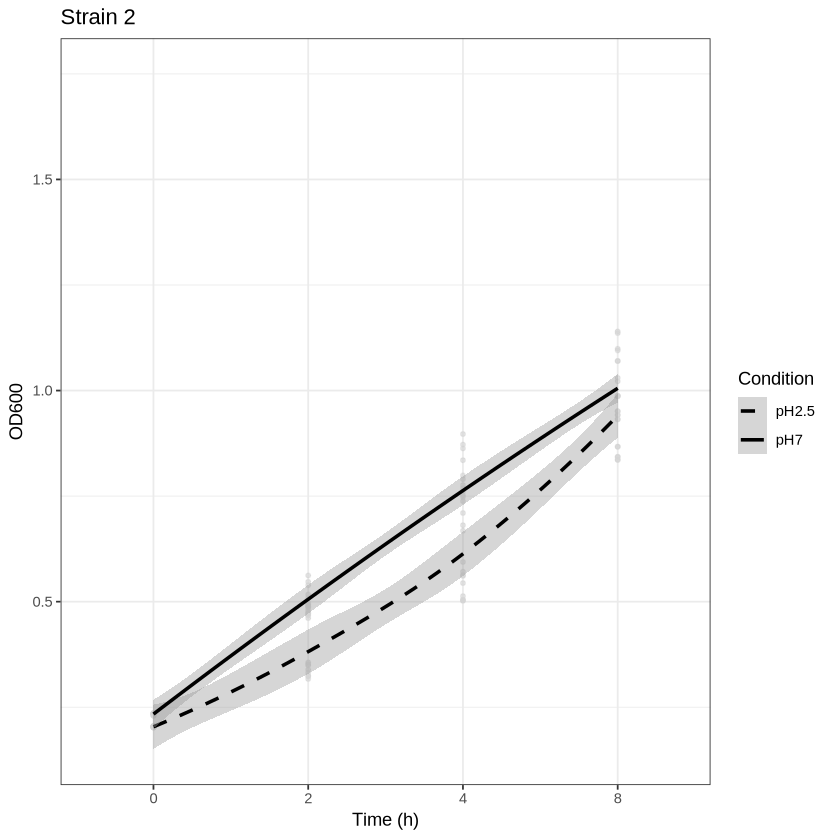

`geom_smooth()` using formula = 'y ~ x'


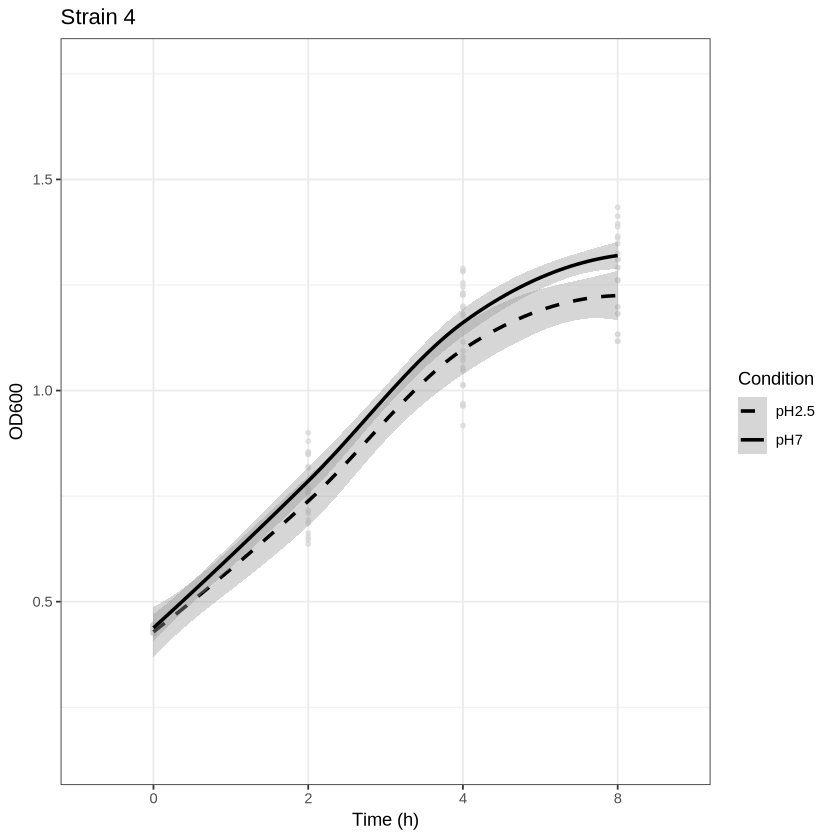

`geom_smooth()` using formula = 'y ~ x'


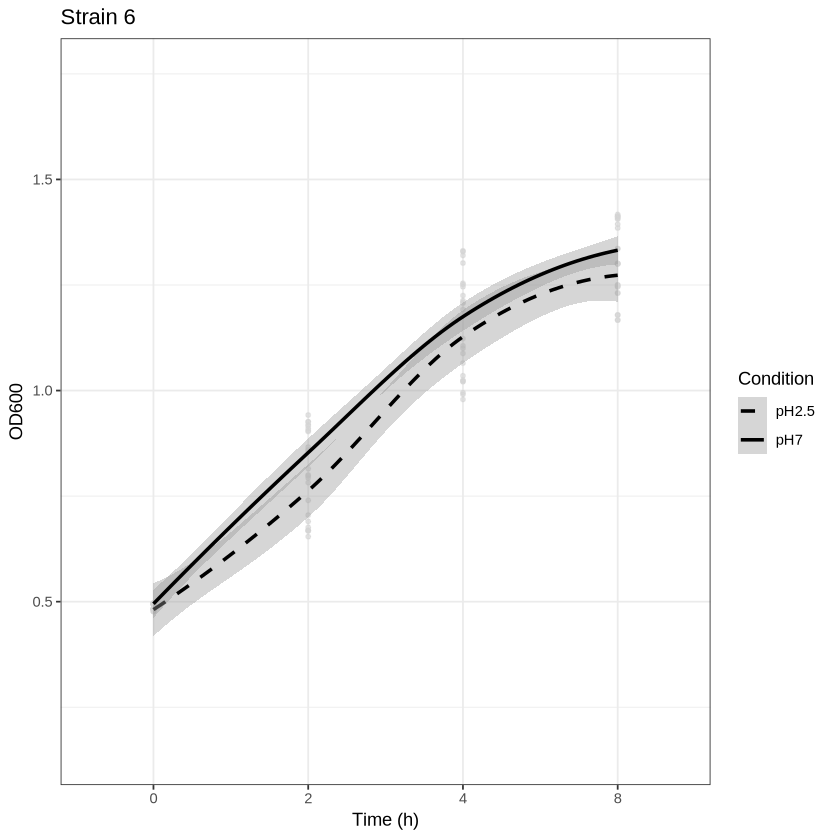

`geom_smooth()` using formula = 'y ~ x'


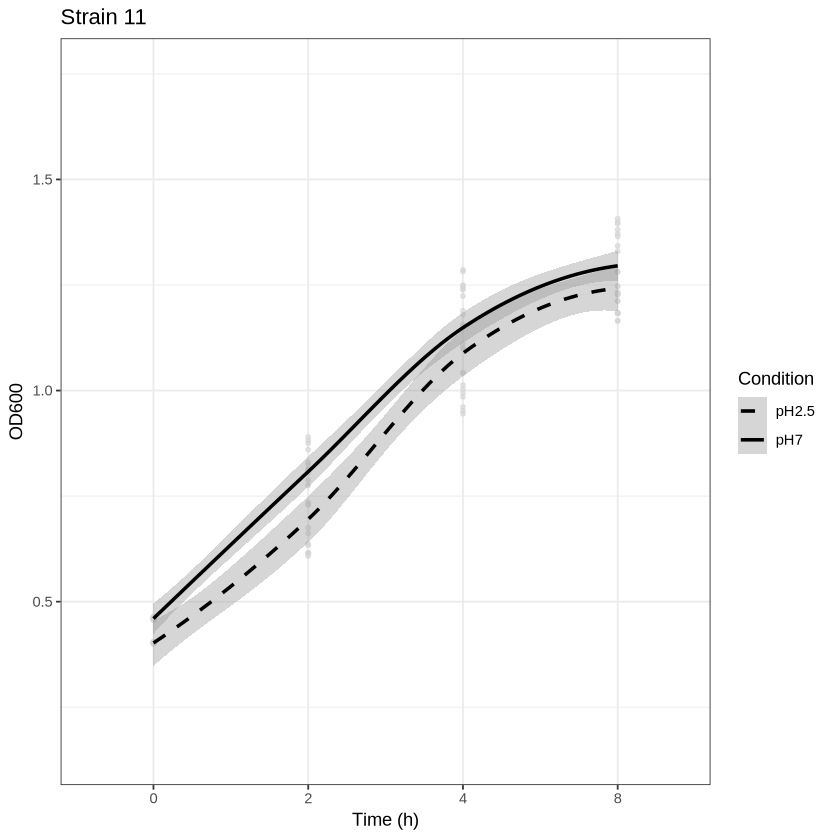

`geom_smooth()` using formula = 'y ~ x'


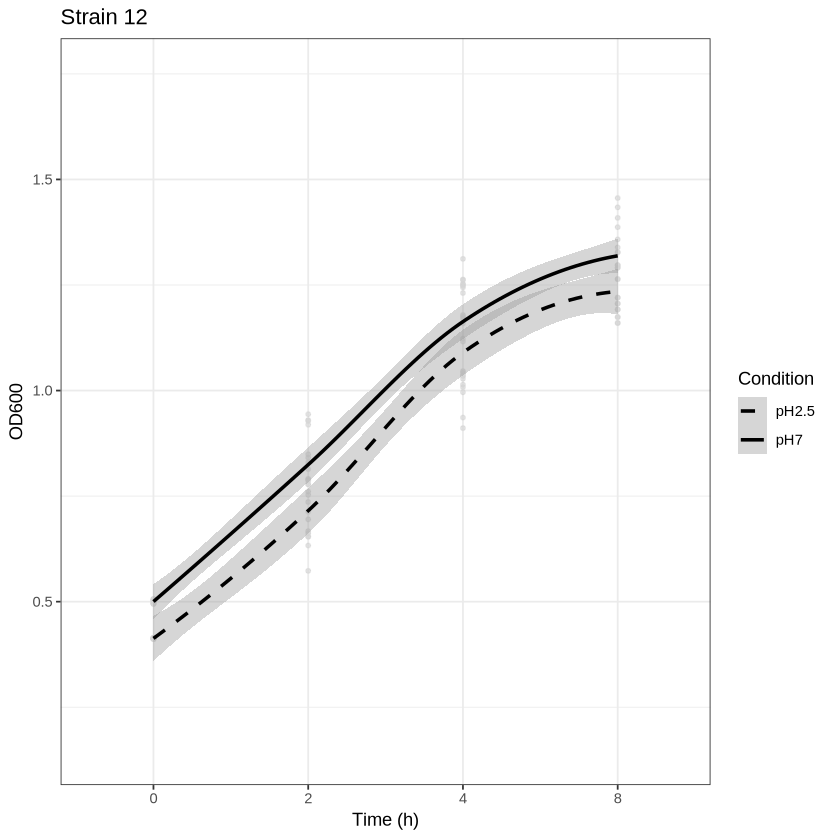

`geom_smooth()` using formula = 'y ~ x'


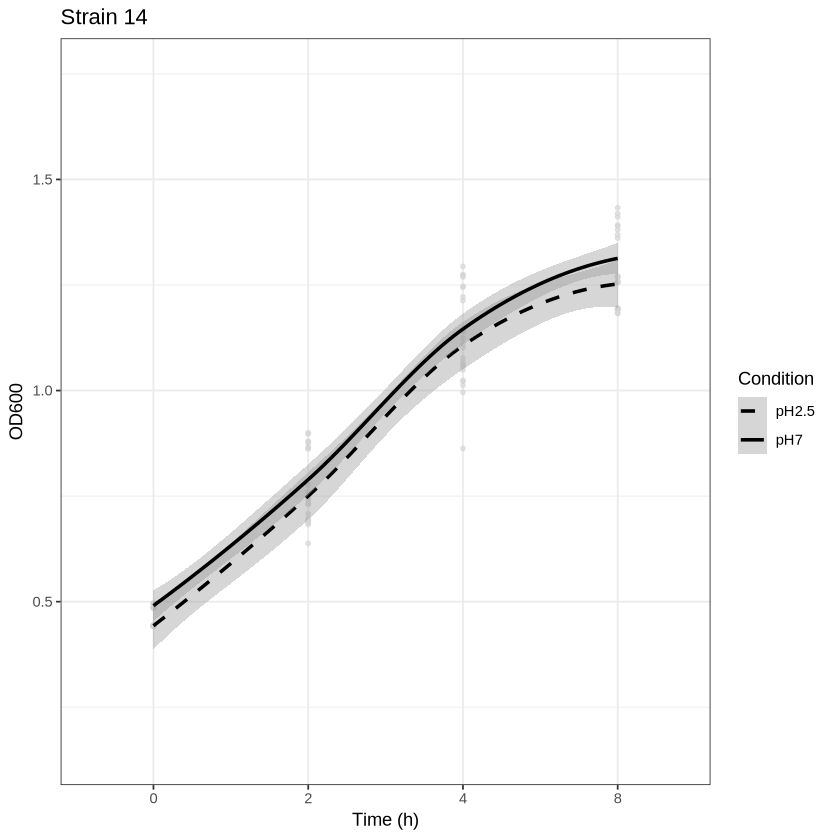

`geom_smooth()` using formula = 'y ~ x'


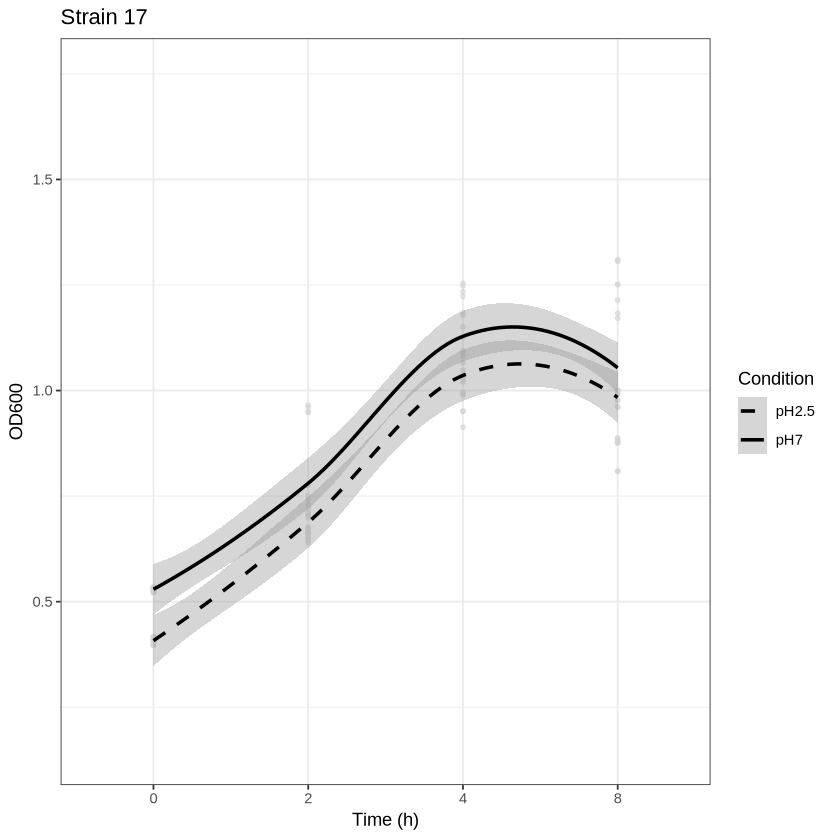

`geom_smooth()` using formula = 'y ~ x'


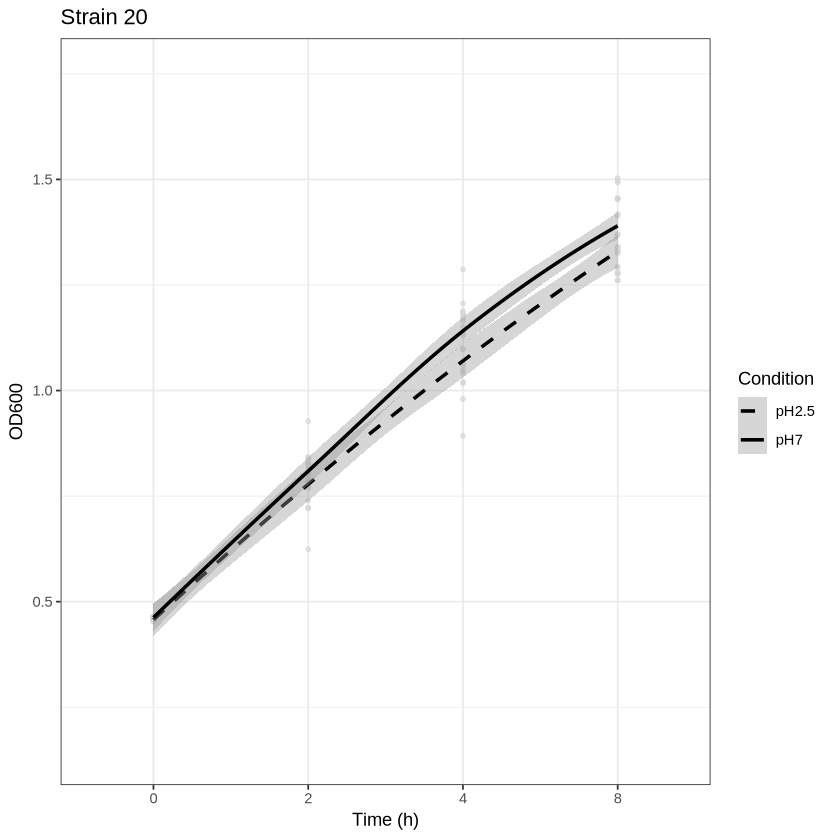

`geom_smooth()` using formula = 'y ~ x'


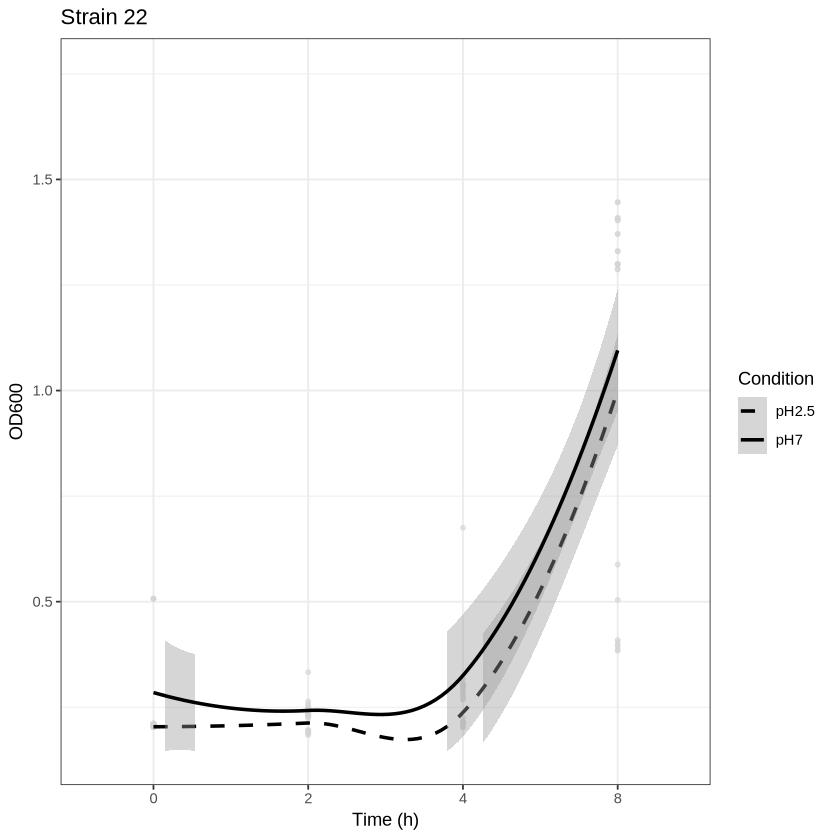

`geom_smooth()` using formula = 'y ~ x'


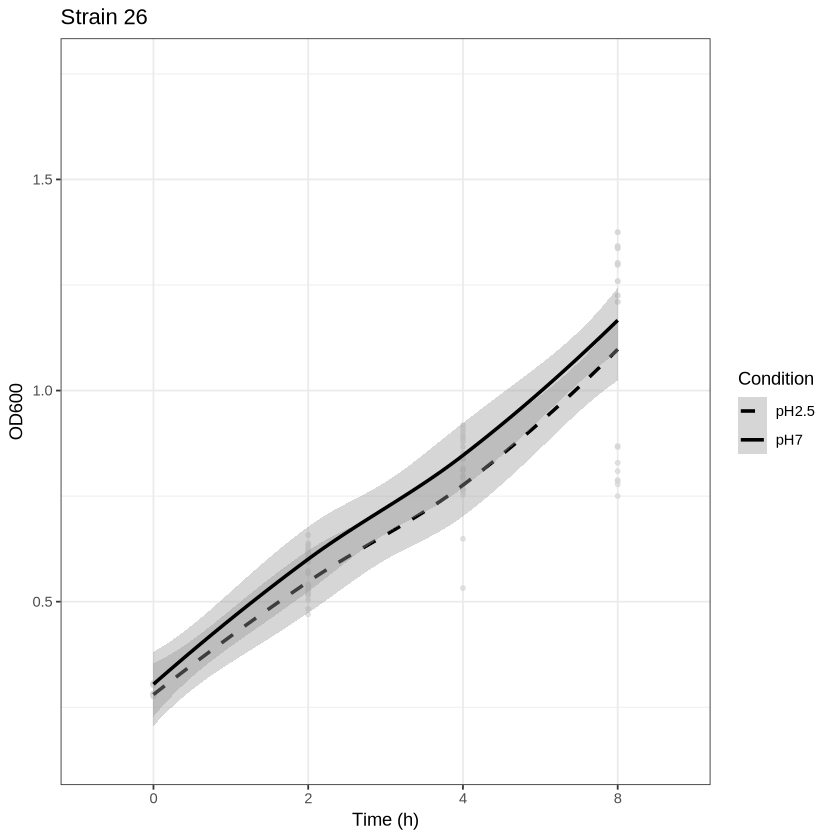

`geom_smooth()` using formula = 'y ~ x'


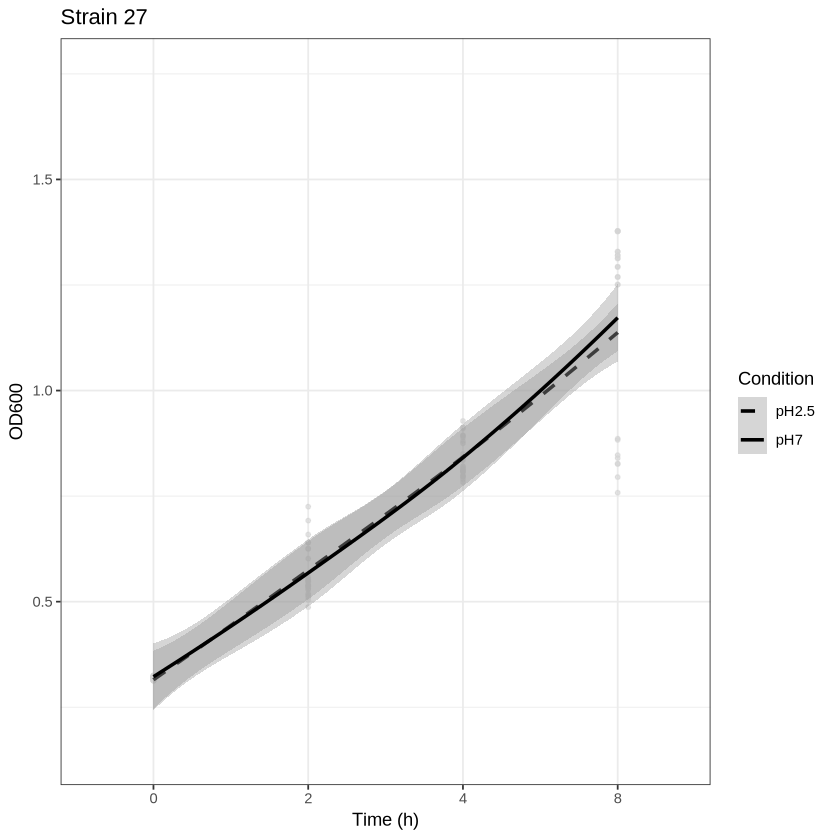

`geom_smooth()` using formula = 'y ~ x'


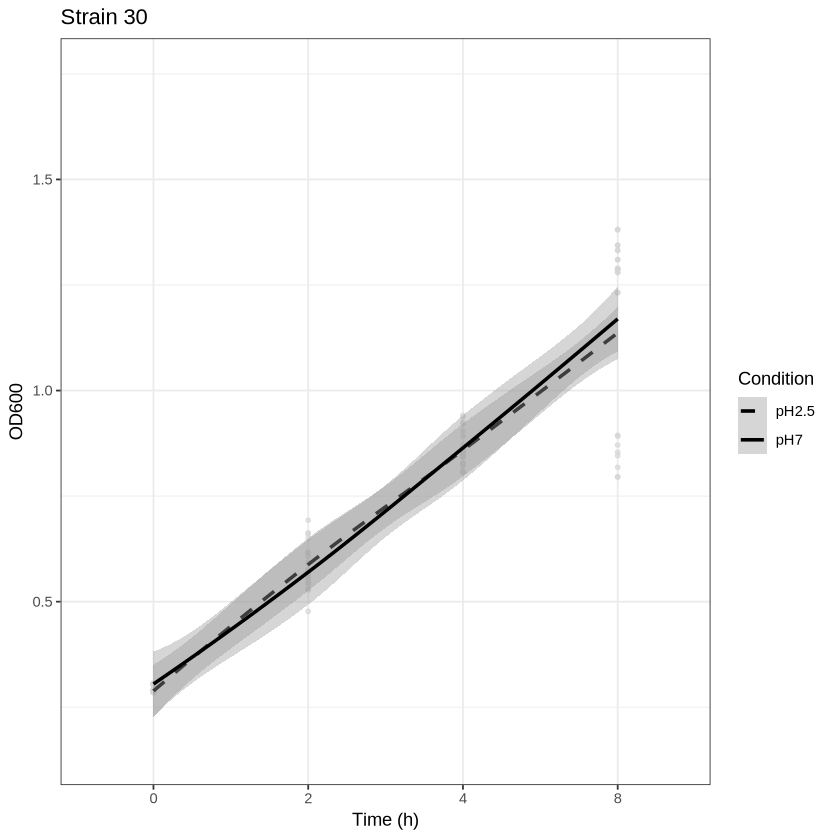

`geom_smooth()` using formula = 'y ~ x'


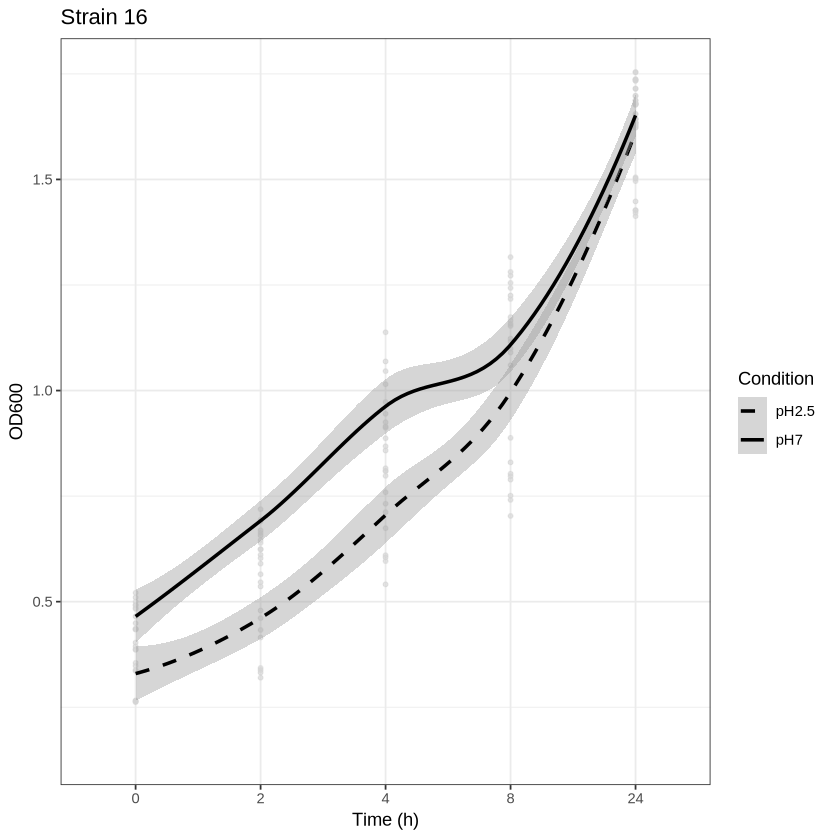

`geom_smooth()` using formula = 'y ~ x'


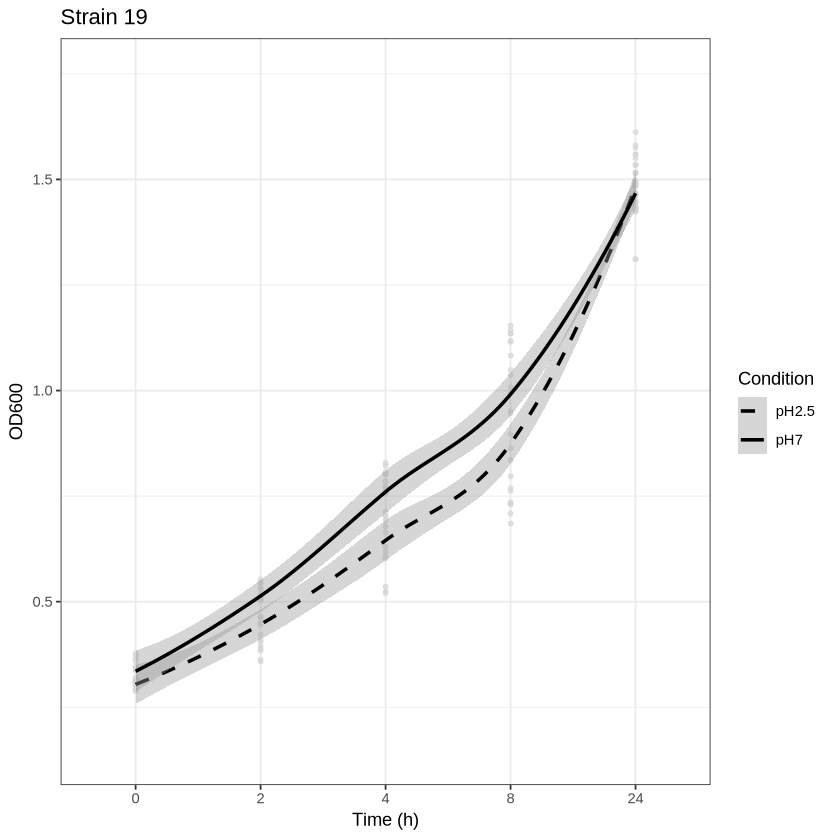

`geom_smooth()` using formula = 'y ~ x'


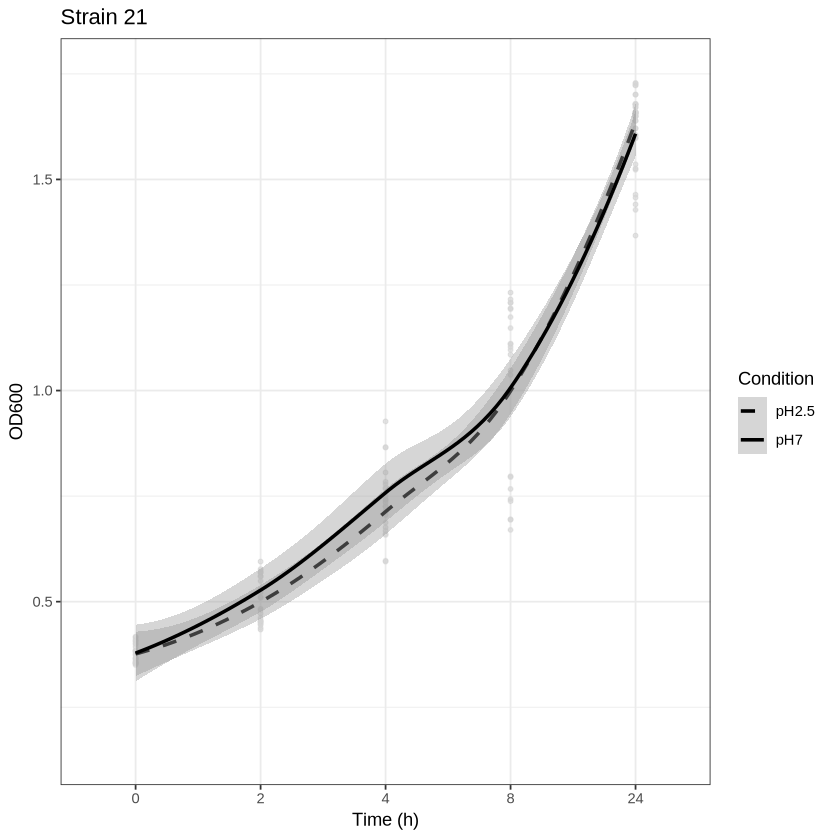

`geom_smooth()` using formula = 'y ~ x'


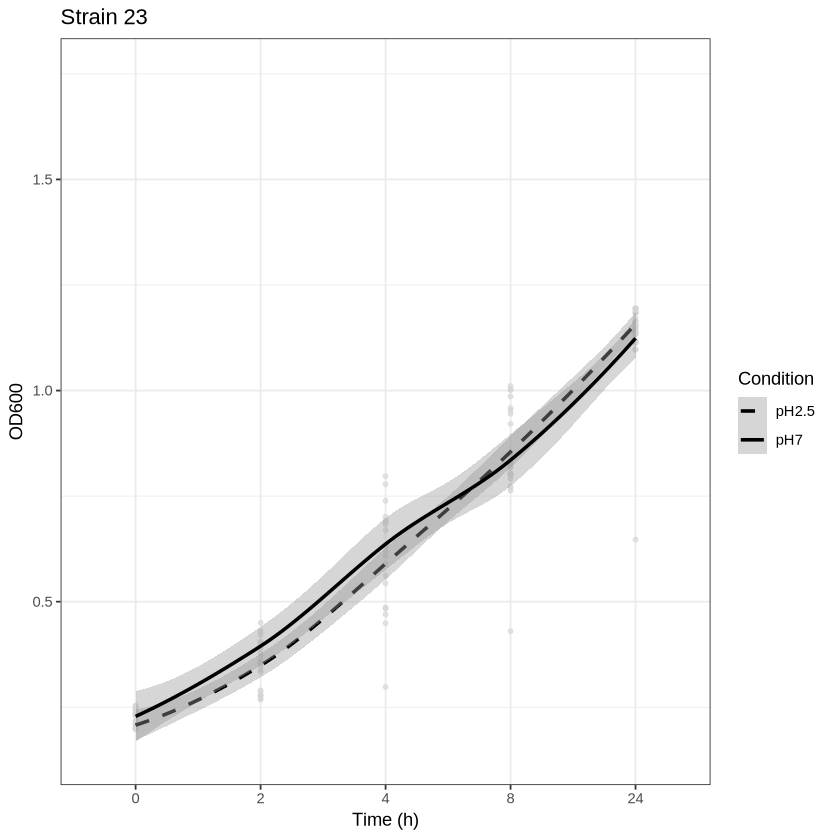

`geom_smooth()` using formula = 'y ~ x'


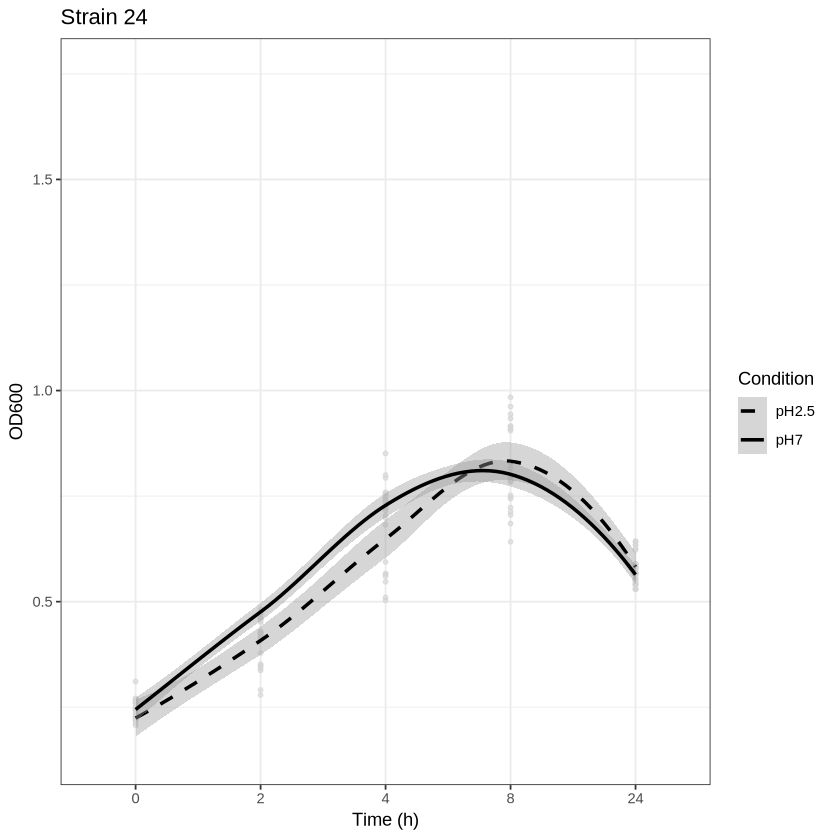

`geom_smooth()` using formula = 'y ~ x'


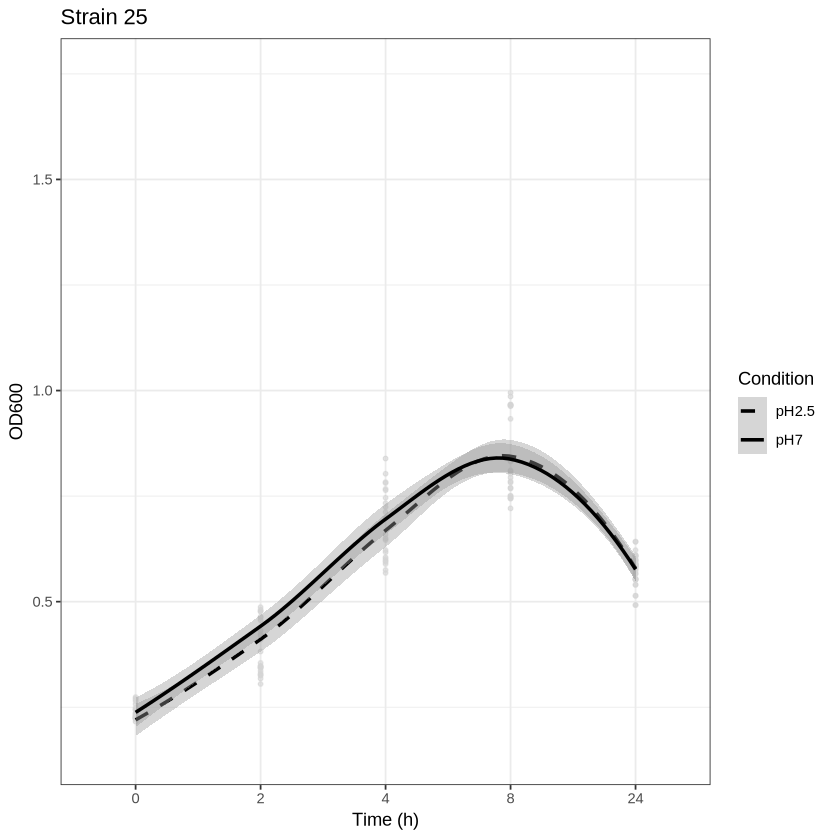

`geom_smooth()` using formula = 'y ~ x'


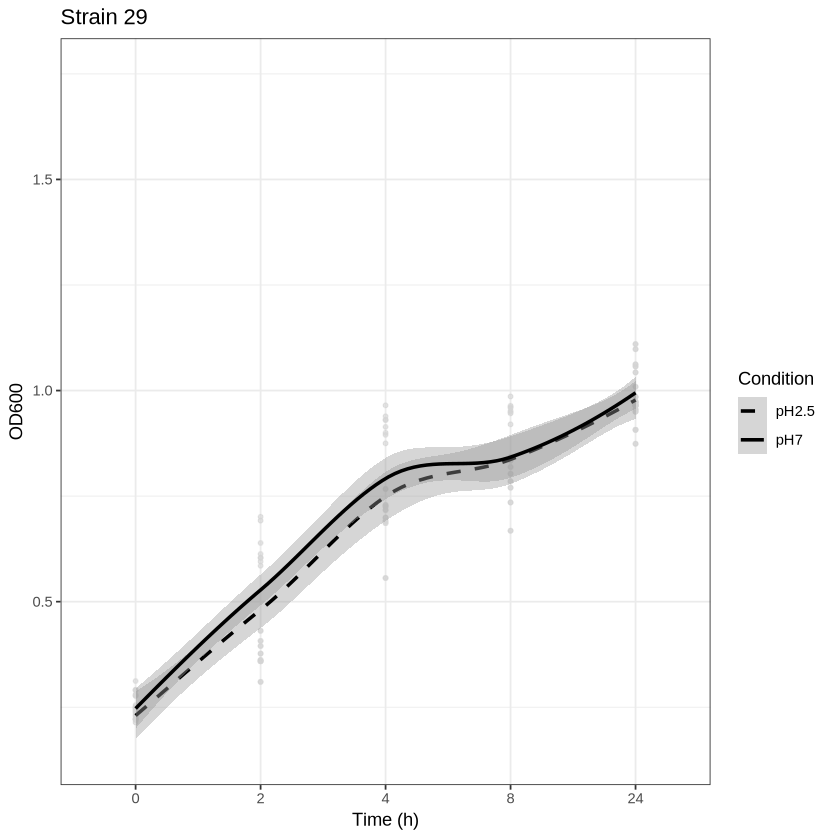

`geom_smooth()` using formula = 'y ~ x'


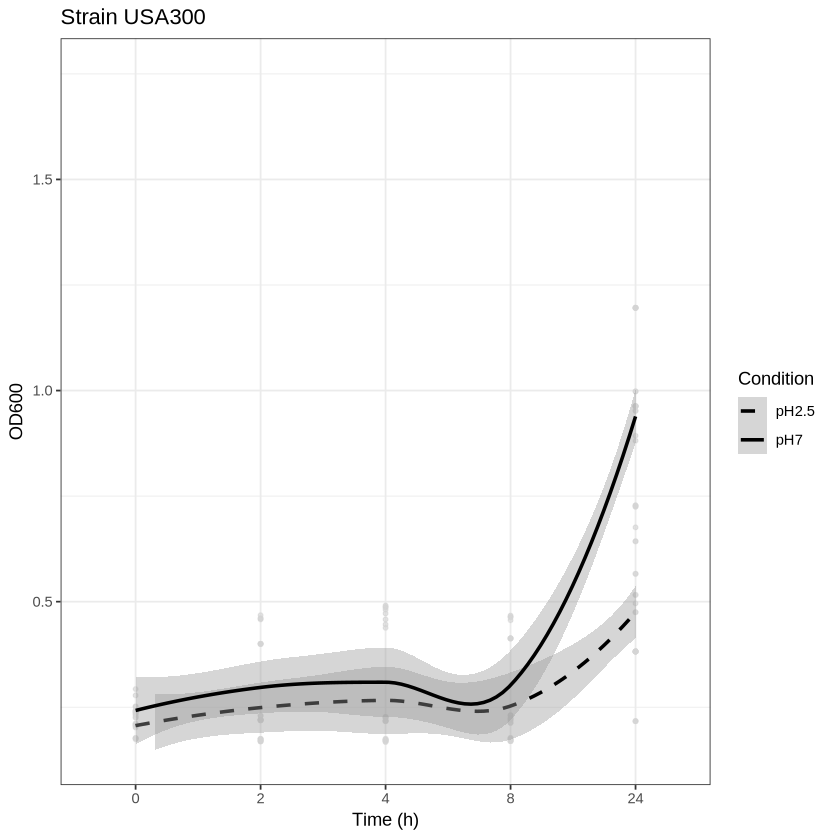

`geom_smooth()` using formula = 'y ~ x'


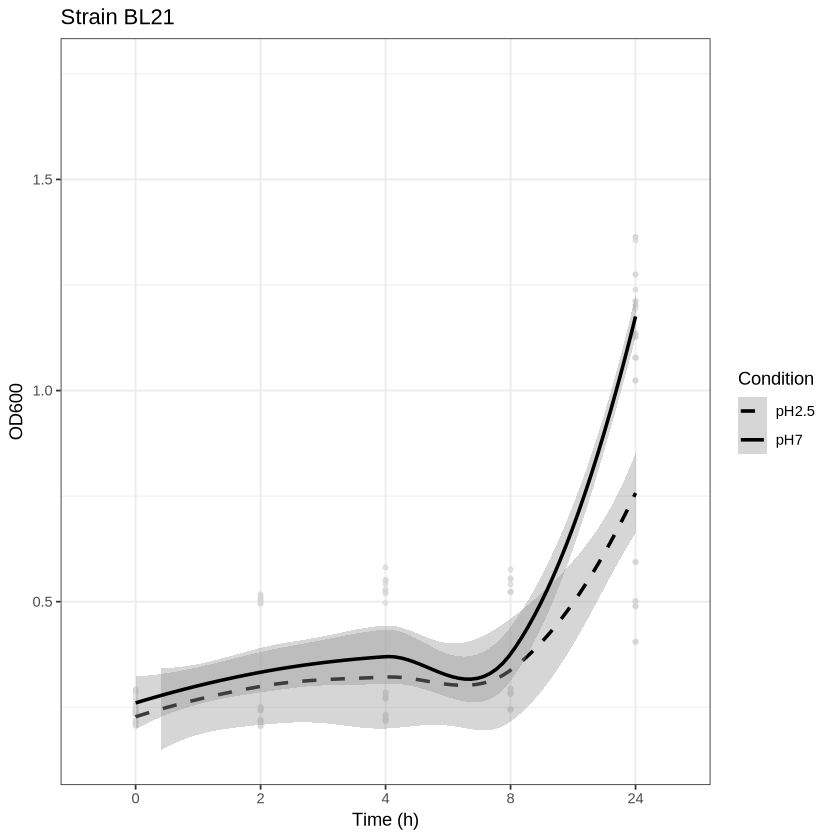

`geom_smooth()` using formula = 'y ~ x'


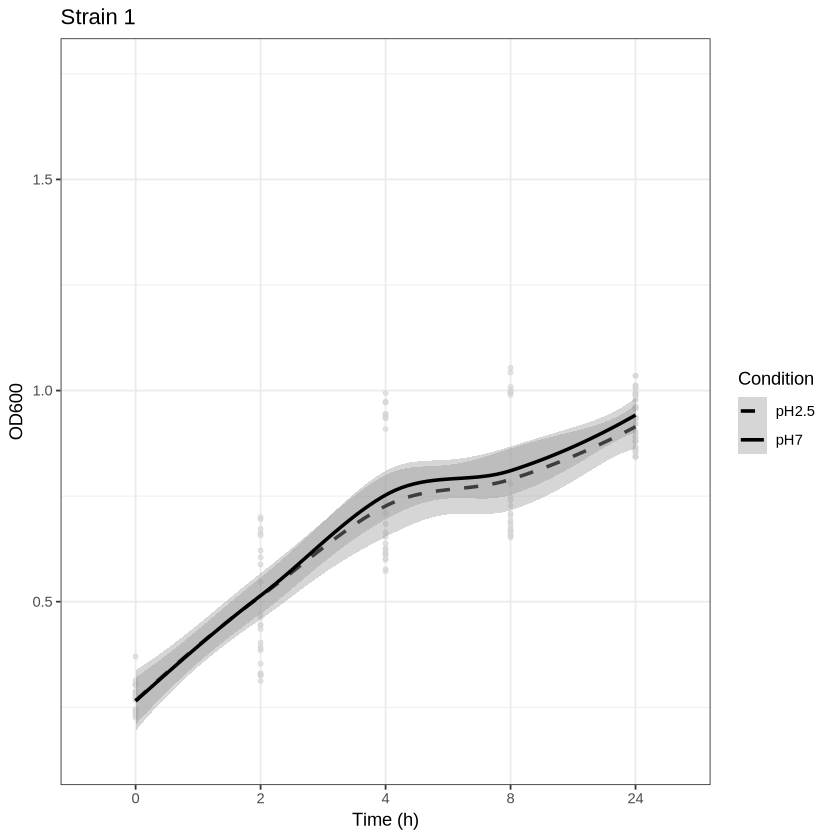

`geom_smooth()` using formula = 'y ~ x'


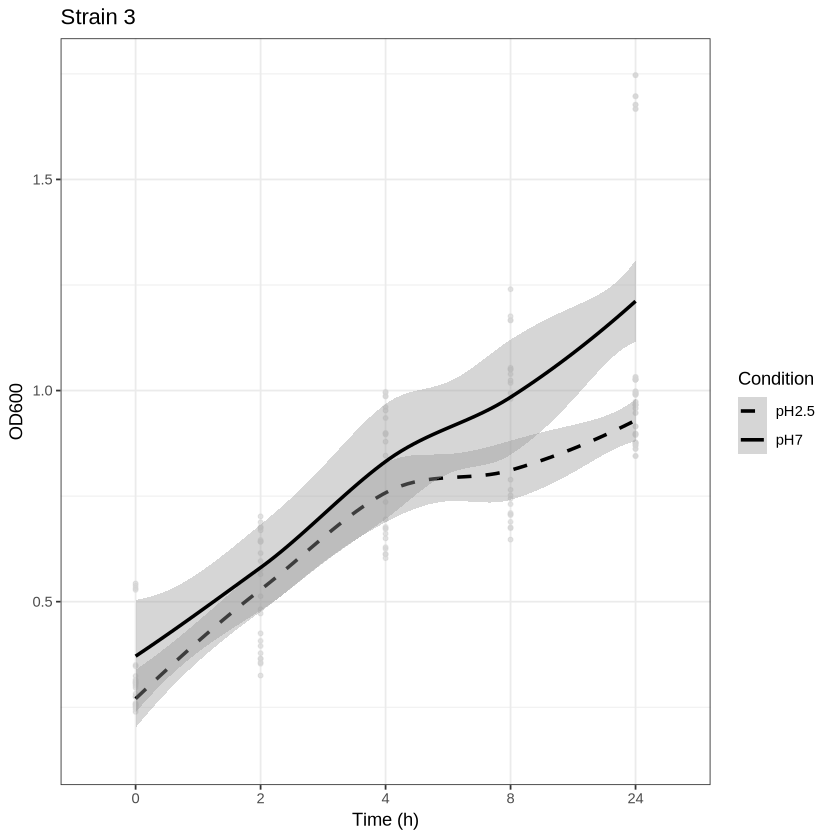

`geom_smooth()` using formula = 'y ~ x'


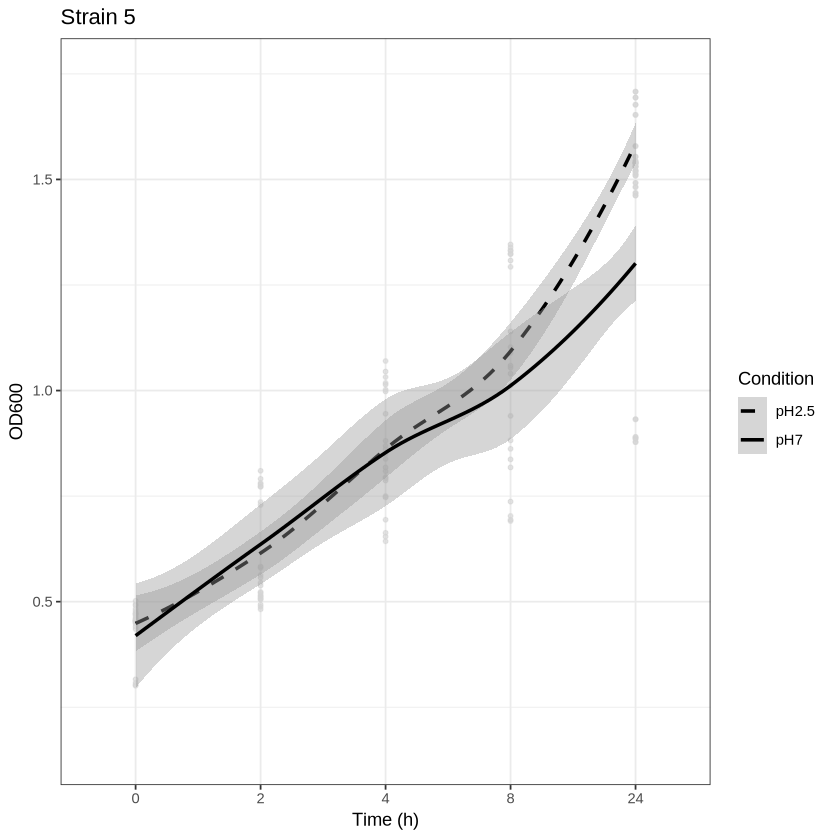

`geom_smooth()` using formula = 'y ~ x'


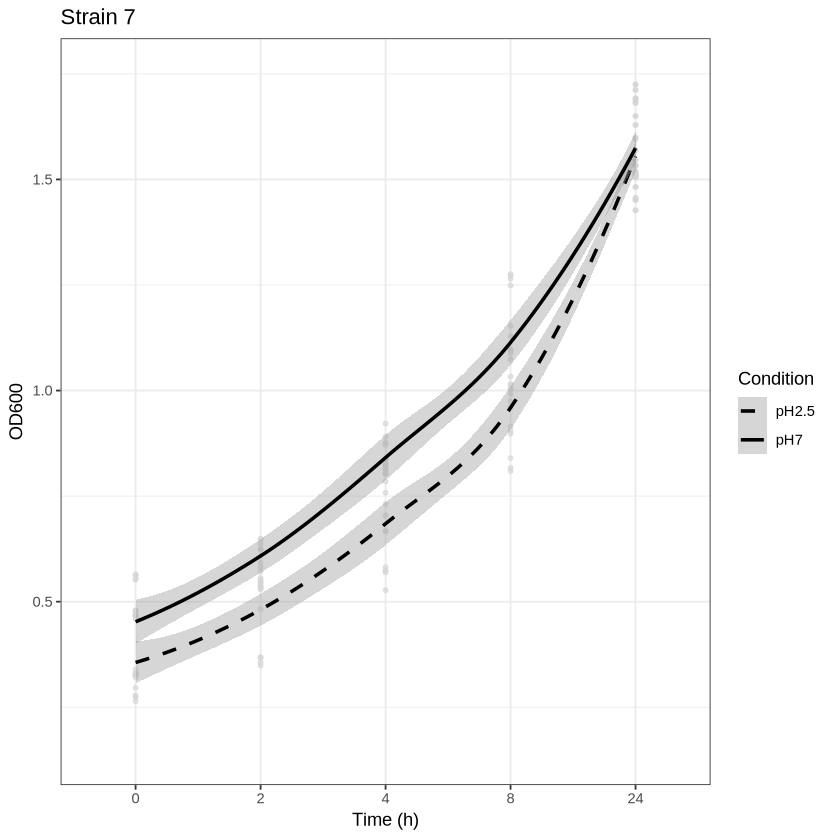

`geom_smooth()` using formula = 'y ~ x'


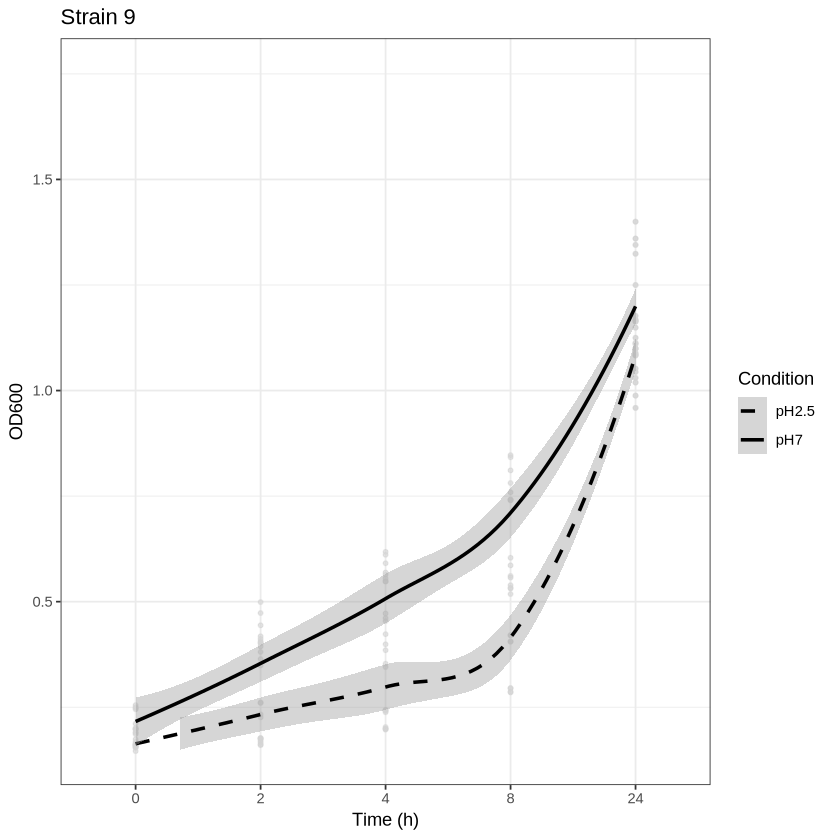

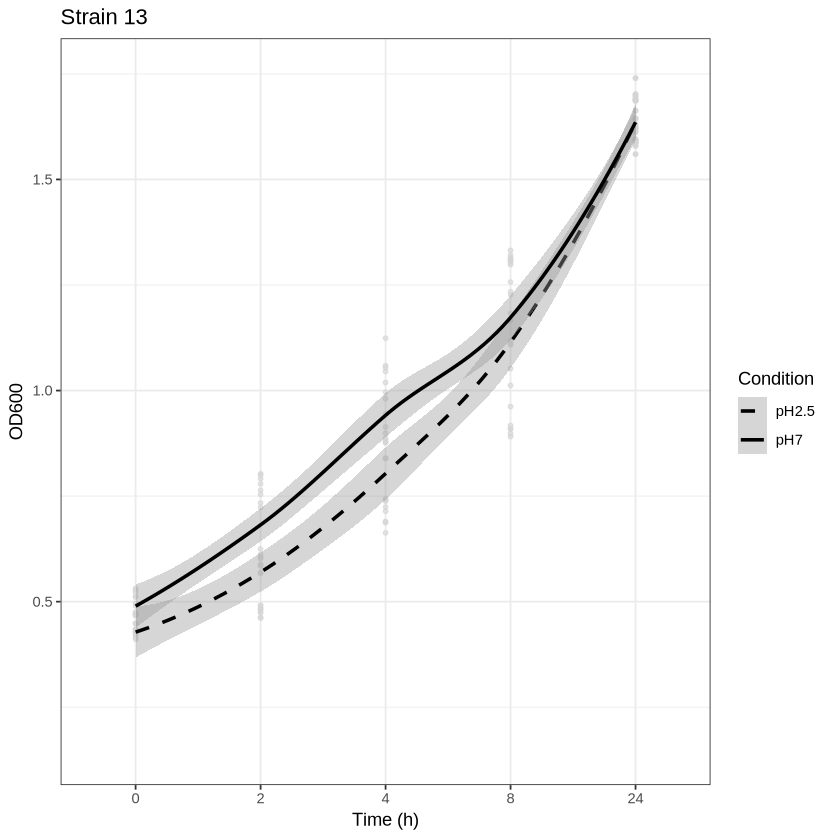

In [155]:
strains <- unique(plates_long2$Strain)

for (s in strains) {
  p <- ggplot(
    plates_long2 %>%
      filter(condition != "Blank", Strain == s),
    aes(x = time_h, y = OD600)
  ) +
    geom_point(
      aes(group = well),
      color = "lightgray",
      size  = 1,
      alpha = 0.6
    ) +
    geom_smooth(
      aes(
        linetype = condition,
        group    = condition
      ),
      method    = "loess",
      span      = 0.8,
      se        = TRUE,
      linewidth = 1,
      color     = "black"
    ) +
    scale_linetype_manual(
      values = c("pH7" = "solid", "pH2.5" = "dashed")
    ) +
    scale_y_continuous(limits = y_limits) +
    labs(
      title    = paste("Strain", s),
      x        = "Time (h)",
      y        = "OD600",
      linetype = "Condition"
    ) +
    theme_bw()

  print(p)
}


`geom_smooth()` using formula = 'y ~ x'


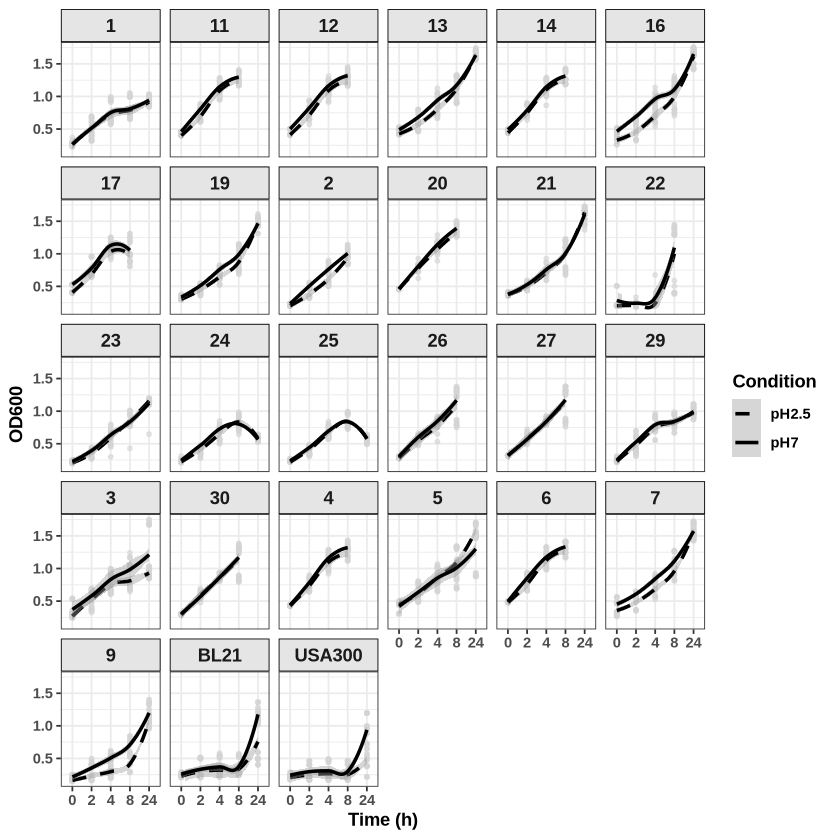

In [153]:
library(dplyr)
library(ggplot2)

## Compute global y-axis limits (excluding blanks)
y_limits <- range(
  plates_long2$OD600[plates_long2$condition != "Blank"],
  na.rm = TRUE
)

ggplot(
  plates_long2 %>%
    filter(condition != "Blank"),
  aes(x = time_h, y = OD600)
) +

  ## Raw wells = technical replicates
  geom_point(
    aes(group = well),
    color = "lightgray",
    size  = 1,
    alpha = 0.6
  ) +

  ## Smoothed growth curves (pooled biological replicates)
  geom_smooth(
    aes(
      linetype = condition,
      group    = condition
    ),
    method    = "loess",
    span      = 0.8,
    se        = TRUE,
    linewidth = 1,
    color     = "black"
  ) +

  ## Facet by strain (shared axes)
  facet_wrap(
    ~ Strain,
    scales = "fixed"
  ) +

  ## Line styles
  scale_linetype_manual(
    values = c(
      "pH7"   = "solid",
      "pH2.5" = "dashed"
    )
  ) +

  ## Shared y-axis
  scale_y_continuous(limits = y_limits) +

  labs(
    x        = "Time (h)",
    y        = "OD600",
    linetype = "Condition"
  ) +

  theme_bw() +
  theme(
    strip.background = element_rect(fill = "grey90", color = "black"),
    strip.text       = element_text(face = "bold", size = 11),
    axis.title       = element_text(face = "bold"),
    axis.text        = element_text(face = "bold"),
    legend.title     = element_text(face = "bold"),
    legend.text      = element_text(face = "bold")
  )


`geom_smooth()` using formula = 'y ~ x'


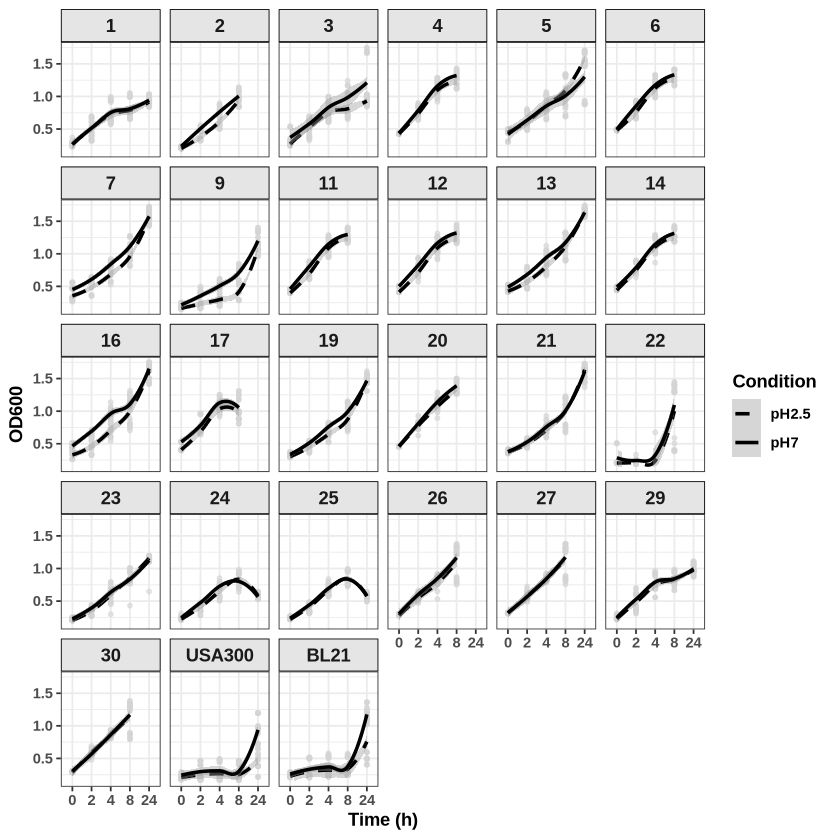

In [158]:
# sort numeric strains then add character ones later
desired_order <- c(as.character(1:30), "USA300", "BL21")

plates_long2 <- plates_long2 %>%
  mutate(
    Strain = factor(Strain, levels = desired_order)
  )

library(dplyr)
library(ggplot2)

## Compute global y-axis limits (excluding blanks)
y_limits <- range(
  plates_long2$OD600[plates_long2$condition != "Blank"],
  na.rm = TRUE
)

ggplot(
  plates_long2 %>%
    filter(condition != "Blank"),
  aes(x = time_h, y = OD600)
) +

  ## Raw wells = technical replicates
  geom_point(
    aes(group = well),
    color = "lightgray",
    size  = 1,
    alpha = 0.6
  ) +

  ## Smoothed growth curves (pooled biological replicates)
  geom_smooth(
    aes(
      linetype = condition,
      group    = condition
    ),
    method    = "loess",
    span      = 0.8,
    se        = TRUE,
    linewidth = 1,
    color     = "black"
  ) +

  ## Facet by strain (shared axes)
  facet_wrap(
    ~ Strain,
    scales = "fixed"
  ) +

  ## Line styles
  scale_linetype_manual(
    values = c(
      "pH7"   = "solid",
      "pH2.5" = "dashed"
    )
  ) +

  ## Shared y-axis
  scale_y_continuous(limits = y_limits) +

  labs(
    x        = "Time (h)",
    y        = "OD600",
    linetype = "Condition"
  ) +

  theme_bw() +
  theme(
    strip.background = element_rect(fill = "grey90", color = "black"),
    strip.text       = element_text(face = "bold", size = 11),
    axis.title       = element_text(face = "bold"),
    axis.text        = element_text(face = "bold"),
    legend.title     = element_text(face = "bold"),
    legend.text      = element_text(face = "bold")
  )


`geom_smooth()` using formula = 'y ~ x'


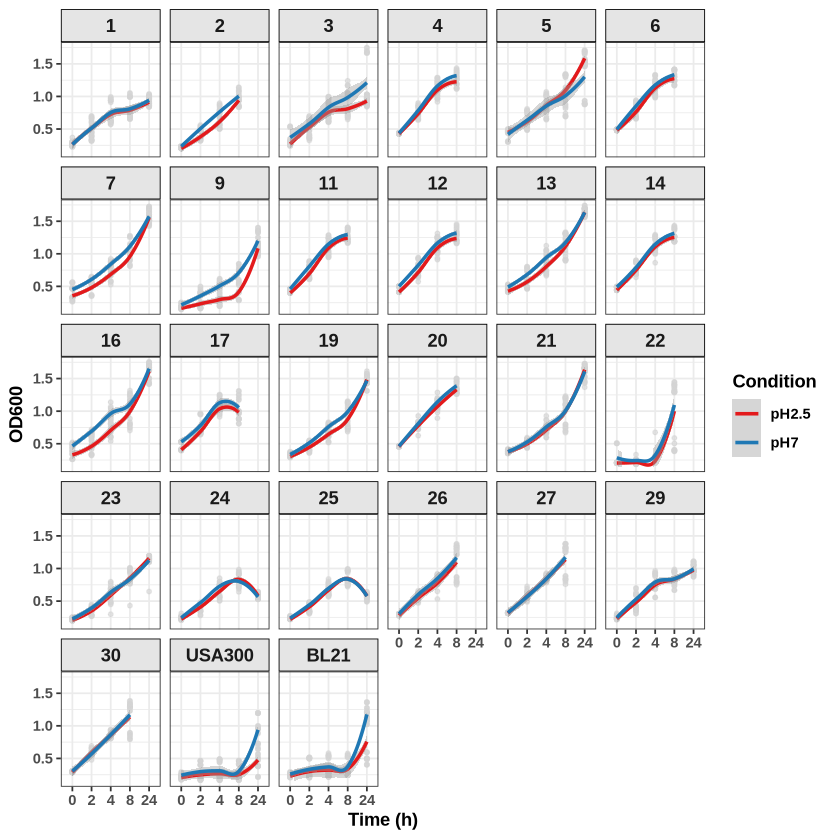

In [159]:
library(dplyr)
library(ggplot2)

## Compute global y-axis limits (excluding blanks)
y_limits <- range(
  plates_long2$OD600[plates_long2$condition != "Blank"],
  na.rm = TRUE
)

ggplot(
  plates_long2 %>%
    filter(condition != "Blank"),
  aes(x = time_h, y = OD600)
) +

  ## Raw wells = technical replicates
  geom_point(
    aes(group = well),
    color = "lightgray",
    size  = 1,
    alpha = 0.6
  ) +

  ## Smoothed growth curves (pooled biological replicates)
  geom_smooth(
    aes(
      color = condition,
      group = condition
    ),
    method    = "loess",
    span      = 0.8,
    se        = TRUE,
    linewidth = 1
  ) +

  ## Facet by strain (shared axes)
  facet_wrap(
    ~ Strain,
    scales = "fixed"
  ) +

  ## Condition colors
  scale_color_manual(
    values = c(
      "pH7"   = "#1F78B4",   # blue
      "pH2.5" = "#E31A1C"    # red
    )
  ) +

  ## Shared y-axis
  scale_y_continuous(limits = y_limits) +

  labs(
    x     = "Time (h)",
    y     = "OD600",
    color = "Condition"
  ) +

  theme_bw() +
  theme(
    strip.background = element_rect(fill = "grey90", color = "black"),
    strip.text       = element_text(face = "bold", size = 11),
    axis.title       = element_text(face = "bold"),
    axis.text        = element_text(face = "bold"),
    legend.title     = element_text(face = "bold"),
    legend.text      = element_text(face = "bold")
  )


In [160]:
plates_summary <- plates_long2 %>%
  filter(condition != "Blank") %>%
  group_by(Strain, condition, time_h) %>%
  summarise(
    mean_OD = mean(OD600, na.rm = TRUE),
    sd_OD   = sd(OD600, na.rm = TRUE),
    .groups = "drop"
  )
head(plates_summary)

Strain,condition,time_h,mean_OD,sd_OD
<fct>,<fct>,<ord>,<dbl>,<dbl>
1,pH2.5,0,0.2729167,0.03206090
1,pH2.5,2,0.4862500,0.15596394
1,pH2.5,4,0.7265833,0.18054184
1,pH2.5,8,0.7895833,0.17510073
1,pH2.5,24,0.9144167,0.06653728
1,pH7,0,0.2747500,0.03774345


In [161]:
# ggplot(plates_summary,
#        aes(x = time_h, y = mean_OD)) +

#   geom_line(
#     aes(linetype = condition, group = condition),
#     linewidth = 1,
#     color = "black"
#   ) +

#   geom_point(
#     aes(shape = condition),
#     size = 2,
#     color = "black"
#   ) +

#   geom_errorbar(
#     aes(
#       ymin = mean_OD - sd_OD,
#       ymax = mean_OD + sd_OD
#     ),
#     width = 0.3,
#     linewidth = 0.5
#   ) +

#   facet_wrap(~ Strain, scales = "fixed") +

#   scale_linetype_manual(
#     values = c("pH7" = "solid", "pH2.5" = "dashed")
#   ) +

#   labs(
#     x = "Time (h)",
#     y = "OD600",
#     linetype = "Condition",
#     shape = "Condition"
#   ) +

#   theme_bw()


In [162]:
# Plot acid inhibition 
glimpse(plates_long2)

Rows: 4,050
Columns: 5
$ Strain    <fct> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, …
$ well      <chr> "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11"…
$ time_h    <ord> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ condition <fct> pH7, pH7, pH7, pH7, Blank, Blank, pH2.5, pH2.5, pH2.5, pH2.5…
$ OD600     <dbl> 0.230, 0.236, 0.235, 0.234, 0.152, 0.151, 0.205, 0.203, 0.20…


In [166]:
## Remove blanks & average technical replicates
library(dplyr)
library(pracma)  # for trapz

growth_mean <- plates_long2 %>%
  filter(condition %in% c("pH7", "pH2.5")) %>%
  group_by(Strain, rep, condition, time_h) %>%
  summarise(
    mean_OD = mean(OD600, na.rm = TRUE),
    .groups = "drop"
  )
head(growth_mean)

Strain,rep,condition,time_h,mean_OD
<chr>,<chr>,<fct>,<dbl>,<dbl>
1,R1,pH2.5,0,0.29175
1,R1,pH2.5,2,0.32275
1,R1,pH2.5,4,0.58750
1,R1,pH2.5,8,0.67975
1,R1,pH2.5,24,0.89050
1,R1,pH7,0,0.23800


In [168]:
## Compute AUC per strain × condition × replicate
auc_df <- growth_mean %>%
  group_by(Strain, rep, condition) %>%
  summarise(
    AUC = trapz(time_h, mean_OD),
    .groups = "drop"
  )

head(auc_df)

Strain,rep,condition,AUC
<chr>,<chr>,<fct>,<dbl>
1,R1,pH2.5,16.62125
1,R1,pH7,18.27775
1,R2,pH2.5,20.15850
1,R2,pH7,20.00975
1,R3,pH2.5,19.12925
1,R3,pH7,19.07725


In [169]:
## Compute inhibition per replicate
inhibition_rep <- auc_df %>%
  tidyr::pivot_wider(
    names_from  = condition,
    values_from = AUC
  ) %>%
  mutate(
    inhibition_rate = 1 - (pH2.5 / pH7)
  )

head(inhibition_rep)

Strain,rep,pH2.5,pH7,inhibition_rate
<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,R1,16.62125,18.27775,0.090629317
1,R2,20.15850,20.00975,-0.007433876
1,R3,19.12925,19.07725,-0.002725760
11,R1,7.19700,7.91700,0.090943539
11,R2,8.54600,8.67600,0.014983864
11,R3,6.88300,7.74700,0.111527043


In [170]:
tail(inhibition_rep)

Strain,rep,pH2.5,pH7,inhibition_rate
<chr>,<chr>,<dbl>,<dbl>,<dbl>
BL21,R1,7.73700,13.55375,0.4291617
BL21,R2,15.18925,16.95125,0.1039451
BL21,R3,12.08400,15.30550,0.2104799
USA300,R1,6.49800,11.20750,0.4202097
USA300,R2,9.61775,12.77900,0.2473785
USA300,R3,7.67275,12.57325,0.3897560


In [171]:
## Compute mean ± SD inhibition per strain
inhibition_summary <- inhibition_rep %>%
  group_by(Strain) %>%
  summarise(
    mean_inhibition = mean(inhibition_rate, na.rm = TRUE),
    sd_inhibition   = sd(inhibition_rate, na.rm = TRUE),
    .groups = "drop"
  )
head(inhibition_summary)
tail(inhibition_summary)

Strain,mean_inhibition,sd_inhibition
<chr>,<dbl>,<dbl>
1,0.02682323,0.05530782
11,0.07248482,0.05084968
12,0.08557990,0.03649445
13,0.04318240,0.01481350
14,0.04668935,0.04278244
16,0.09504075,0.01548748


Strain,mean_inhibition,sd_inhibition
<chr>,<dbl>,<dbl>
5,-0.13143781,0.17906824
6,0.05648832,0.07294290
7,0.08932317,0.02109941
9,0.25133436,0.01641799
BL21,0.24786223,0.16579966
USA300,0.35244807,0.09225815


In [ ]:
## Remove unwanted strains
strains_to_remove <- c("X", "Y", "Z")

inhibition_summary <- inhibition_summary %>%
  filter(!Strain %in% strains_to_remove)

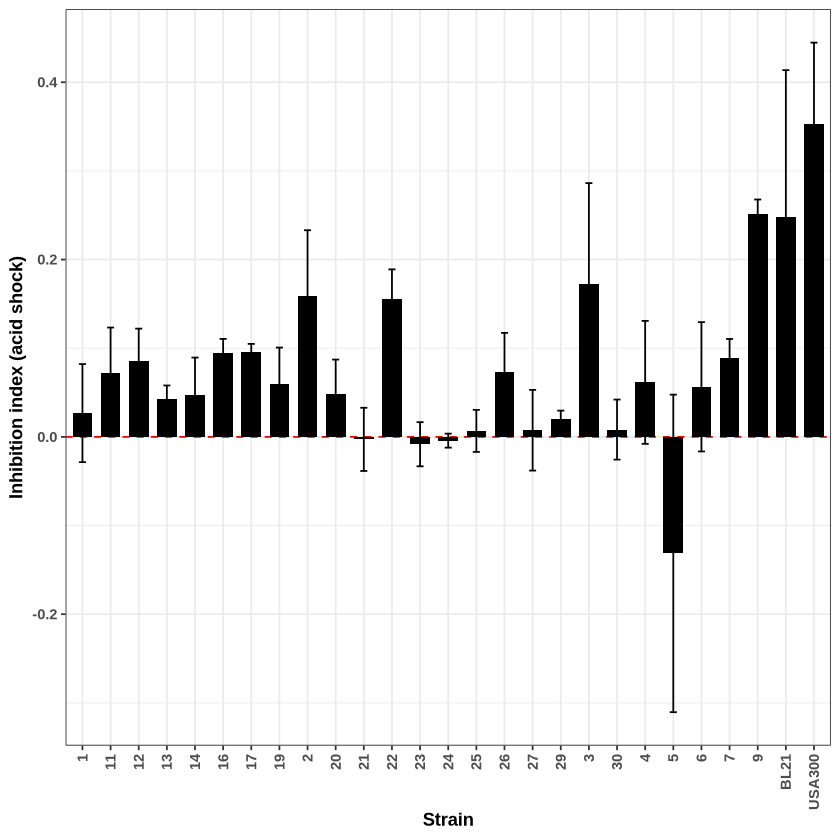

In [179]:
# inhibition plot with error bars
ggplot(
  inhibition_summary,
  aes(x = Strain, y = mean_inhibition)
) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +

  geom_col(fill = "black", width = 0.7) +

  geom_errorbar(
    aes(
      ymin = mean_inhibition - sd_inhibition,
      ymax = mean_inhibition + sd_inhibition
    ),
    width = 0.25
  ) +

  labs(
    x = "Strain",
    y = "Inhibition index (acid shock)"
  ) +

  theme_bw() +
  theme(
    axis.title  = element_text(face = "bold"),
    axis.text   = element_text(face = "bold"),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)
  )


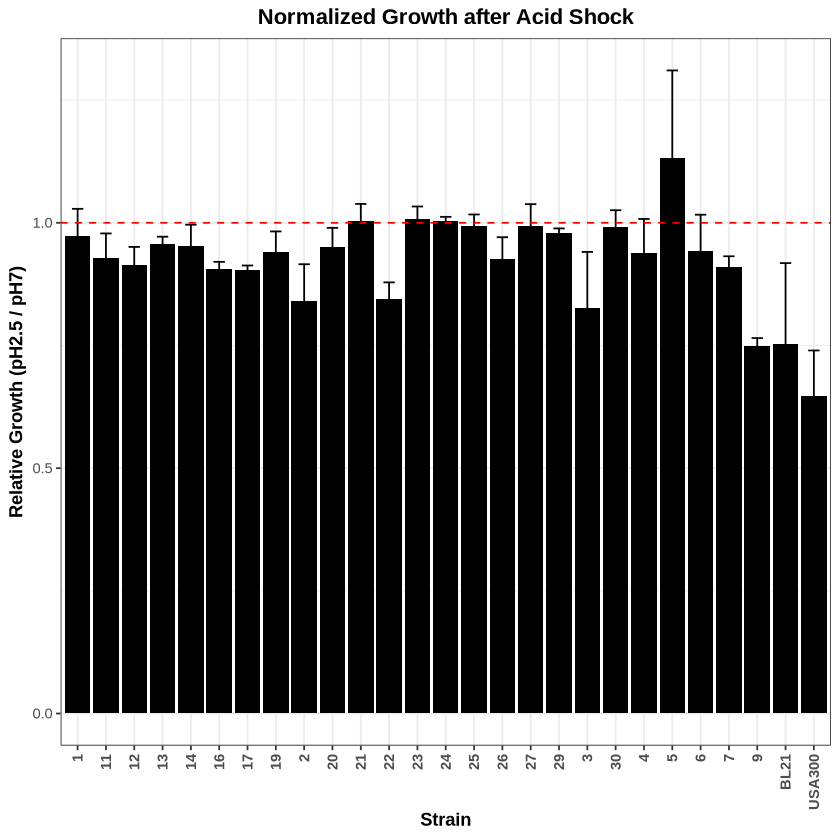

In [178]:
# Normalize AUC to pH7 (relative growth)
library(dplyr)
library(ggplot2)
library(pracma)   # for trapz
library(tidyr)

# 1️⃣ Compute mean per strain × replicate × condition (average technical replicates)
growth_mean <- plates_long2 %>%
  filter(condition %in% c("pH7", "pH2.5")) %>%
  group_by(Strain, rep, condition, time_h) %>%
  summarise(
    mean_OD = mean(OD600, na.rm = TRUE),
    .groups = "drop"
  )

# 2️⃣ Compute AUC per Strain × replicate × condition
auc_df <- growth_mean %>%
  group_by(Strain, rep, condition) %>%
  summarise(
    AUC = trapz(time_h, mean_OD),
    .groups = "drop"
  )

# 3️⃣ Pivot wider to normalize to pH7
auc_wide <- auc_df %>%
  pivot_wider(
    names_from = condition,
    values_from = AUC
  ) %>%
  mutate(
    relative_growth = pH2.5 / pH7
  )

# 4️⃣ Compute mean ± SD across biological replicates
relative_growth_stats <- auc_wide %>%
  group_by(Strain) %>%
  summarise(
    mean_rel_growth = mean(relative_growth, na.rm = TRUE),
    sd_rel_growth   = sd(relative_growth, na.rm = TRUE)
  )

# 5️⃣ Plot normalized growth
ggplot(relative_growth_stats, aes(x = factor(Strain, levels = Strain), y = mean_rel_growth)) +
  geom_col(fill = "black") +
  geom_errorbar(aes(ymin = mean_rel_growth - sd_rel_growth, ymax = mean_rel_growth + sd_rel_growth),
                width = 0.4, color = "black") +
  geom_hline(yintercept = 1, linetype = "dashed", color = "red") + # reference for no inhibition
  labs(
    x = "Strain",
    y = "Relative Growth (pH2.5 / pH7)",
    title = "Normalized Growth after Acid Shock"
  ) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.title  = element_text(face = "bold"),
    plot.title  = element_text(face = "bold", hjust = 0.5)
  )


In [185]:
## Compute mean ± SD inhibition per strain (relative growth)
inhibition_summary <- inhibition_rep %>%
  group_by(Strain) %>%
  summarise(
    mean_inhibition = mean(inhibition_rate, na.rm = TRUE),
    sd_inhibition   = sd(inhibition_rate, na.rm = TRUE),
    .groups = "drop"
  )
head(inhibition_summary)
tail(inhibition_summary)

Strain,mean_inhibition,sd_inhibition
<chr>,<dbl>,<dbl>
1,0.02682323,0.05530782
11,0.07248482,0.05084968
12,0.08557990,0.03649445
13,0.04318240,0.01481350
14,0.04668935,0.04278244
16,0.09504075,0.01548748


Strain,mean_inhibition,sd_inhibition
<chr>,<dbl>,<dbl>
5,-0.13143781,0.17906824
6,0.05648832,0.07294290
7,0.08932317,0.02109941
9,0.25133436,0.01641799
BL21,0.24786223,0.16579966
USA300,0.35244807,0.09225815


In [187]:
library(dplyr)
library(broom)
library(purrr)

# Wilcoxon signed-rank test per strain against 0
stat_tests_wilcox <- inhibition_rep %>%
  group_by(Strain) %>%
  summarise(
    wilcox_test = list(wilcox.test(inhibition_rate, mu = 0, exact = FALSE)),
    .groups = "drop"
  ) %>%
  mutate(
    tidied = map(wilcox_test, tidy)
  ) %>%
  unnest(tidied) %>%
  select(Strain, statistic, p.value, method, alternative)

stat_tests_wilcox

Strain,statistic,p.value,method,alternative
<chr>,<dbl>,<dbl>,<chr>,<chr>
1,3,1.0000000,Wilcoxon signed rank test with continuity correction,two.sided
11,6,0.1814492,Wilcoxon signed rank test with continuity correction,two.sided
12,6,0.1814492,Wilcoxon signed rank test with continuity correction,two.sided
13,6,0.1814492,Wilcoxon signed rank test with continuity correction,two.sided
14,5,0.4226781,Wilcoxon signed rank test with continuity correction,two.sided
16,6,0.1814492,Wilcoxon signed rank test with continuity correction,two.sided
17,6,0.1814492,Wilcoxon signed rank test with continuity correction,two.sided
19,6,0.1814492,Wilcoxon signed rank test with continuity correction,two.sided
2,6,0.1814492,Wilcoxon signed rank test with continuity correction,two.sided


In [196]:
library(dplyr)
library(boot)
library(purrr)

# Function to compute mean for bootstrapping
boot_mean <- function(x, i) mean(x[i], na.rm = TRUE)

# Compute bootstrap 95% CI per strain
boot_ci <- inhibition_rep %>%
  group_by(Strain) %>%
  summarise(
    boot_results = list(boot(data = inhibition_rate, statistic = boot_mean, R = 10000)),
    .groups = "drop"
  ) %>%
  rowwise() %>%
  mutate(
    # safely extract percentile CI
    ci = list({
      res <- try(boot.ci(boot_results, type = "perc"), silent = TRUE)
      if (inherits(res, "try-error") || is.null(res$percent)) {
        tibble(lower = NA, upper = NA)
      } else {
        tibble(lower = res$percent[4], upper = res$percent[5])
      }
    }),
    significant = ifelse(!is.na(ci$lower) & (ci$lower > 0 | ci$upper < 0), TRUE, FALSE)
  ) %>%
  unnest(ci) %>%
  select(Strain, lower, upper, significant) 
boot_ci


Strain,lower,upper,significant
<chr>,<dbl>,<dbl>,<lgl>
1,-0.007433876,0.090629317,FALSE
11,0.014983864,0.111527043,TRUE
12,0.043498910,0.108553549,TRUE
13,0.028376744,0.058003735,TRUE
14,-0.002452868,0.075632973,FALSE
16,0.083281960,0.112588905,TRUE
17,0.090239626,0.106210464,TRUE
19,0.014502162,0.096630096,TRUE
2,0.072926950,0.203430227,TRUE


In [207]:
library(dplyr)
library(boot)
library(purrr)
library(tidyr)

# 1️⃣ Define bootstrap function
boot_mean <- function(x, i) mean(x[i], na.rm = TRUE)

# 2️⃣ Compute bootstrap CI per strain
relative_growth_boot <- auc_wide %>%
  group_by(Strain) %>%
  summarise(
    boot_results = list(boot(data = relative_growth, statistic = boot_mean, R = 10000)),
    mean_relative_growth = mean(relative_growth, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  rowwise() %>%
  mutate(
    ci = list({
      res <- try(boot.ci(boot_results, type = "perc"), silent = TRUE)
      if (inherits(res, "try-error") || is.null(res$percent)) {
        tibble(lower = NA, upper = NA)
      } else {
        tibble(lower = res$percent[4], upper = res$percent[5])
      }
    }),
    significant = ifelse(!is.na(ci$lower) & (ci$upper < 1 | ci$lower > 1), TRUE, FALSE)
  ) %>%
  unnest(ci) %>%
  select(Strain, mean_relative_growth, lower, upper, significant) %>%
  arrange(desc(mean_relative_growth))

# Preview the final table
sort(relative_growth_boot$significant)
relative_growth_boot

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE

Strain,mean_relative_growth,lower,upper,significant
<chr>,<dbl>,<dbl>,<dbl>,<lgl>
5,1.1314378,0.9339988,1.2833438,FALSE
23,1.0083116,0.9909074,1.0368192,FALSE
24,1.0042453,0.9957174,1.0113107,FALSE
21,1.0028144,0.9798219,1.0438624,FALSE
25,0.9932424,0.9712490,1.0183780,FALSE
27,0.9924722,0.9554673,1.0432684,FALSE
30,0.9917489,0.9607106,1.0278709,FALSE
29,0.9794719,0.9738384,0.9899329,TRUE
1,0.9731768,0.9093707,1.0074339,FALSE


In [202]:
install.packages("VennDiagram")

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [22]:
plates_long <- plates_long %>%
  mutate(
    Well    = paste0(Rows, col),
    Time_hr = time,
    Strain  = ID
  ) %>%
  select(
    Strain,
    Well,
    Time_hr,
    condition,
    OD600,
    plate
  )

head(plates_long)

Strain,Well,Time_hr,condition,OD600,plate
<dbl>,<chr>,<dbl>,<fct>,<dbl>,<chr>
2,B2,0,pH2.5,0.565,a
2,B3,0,pH2.5,0.585,a
2,B4,0,pH2.5,0.582,a
2,B5,0,pH2.5,0.581,a
2,B6,0,Blank,0.157,a
2,B7,0,Blank,0.155,a


In [24]:
plates_summary <- plates_long %>%
  group_by(Strain, Time_hr, condition) %>%
  summarise(
    mean_OD600 = mean(OD600, na.rm = TRUE),
    sd_OD600   = sd(OD600, na.rm = TRUE),
    .groups = "drop"
  )
head(plates_summary)

Strain,Time_hr,condition,mean_OD600,sd_OD600
<dbl>,<dbl>,<fct>,<dbl>,<dbl>
2,0,Blank,0.15600,0.001414214
2,0,pH2.5,0.57825,0.008995369
2,0,pH7,0.56700,0.002581989
2,6,Blank,0.29450,0.003535534
2,6,pH2.5,1.29850,0.031416556
2,6,pH7,1.34850,0.014933185


In [25]:
# COrrect OD to cuvette
plates_long_cuvette <- plates_long %>%
  mutate(OD600 = OD600 * 1.8)
head(plates_long_cuvette)

write_tsv(plates_long, "acid-lactos-OD600_pilot.tsv")
write_tsv(plates_long_cuvette, "acid-lactos-OD600_pilot-cuvette.tsv")

Strain,Well,Time_hr,condition,OD600,plate
<dbl>,<chr>,<dbl>,<fct>,<dbl>,<chr>
2,B2,0,pH2.5,1.0170,a
2,B3,0,pH2.5,1.0530,a
2,B4,0,pH2.5,1.0476,a
2,B5,0,pH2.5,1.0458,a
2,B6,0,Blank,0.2826,a
2,B7,0,Blank,0.2790,a


`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

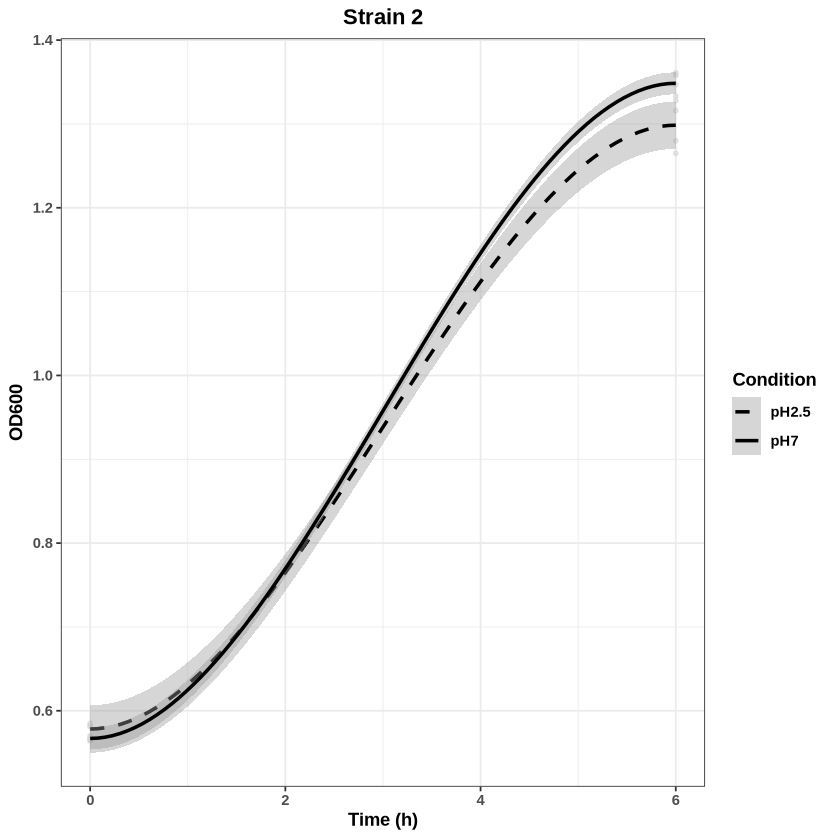

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

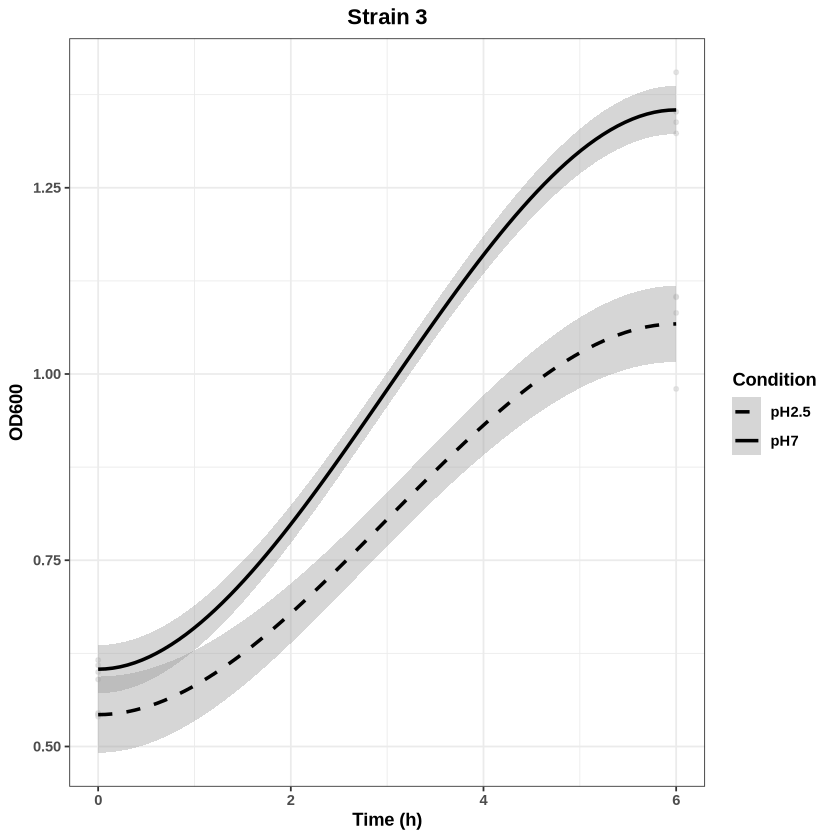

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

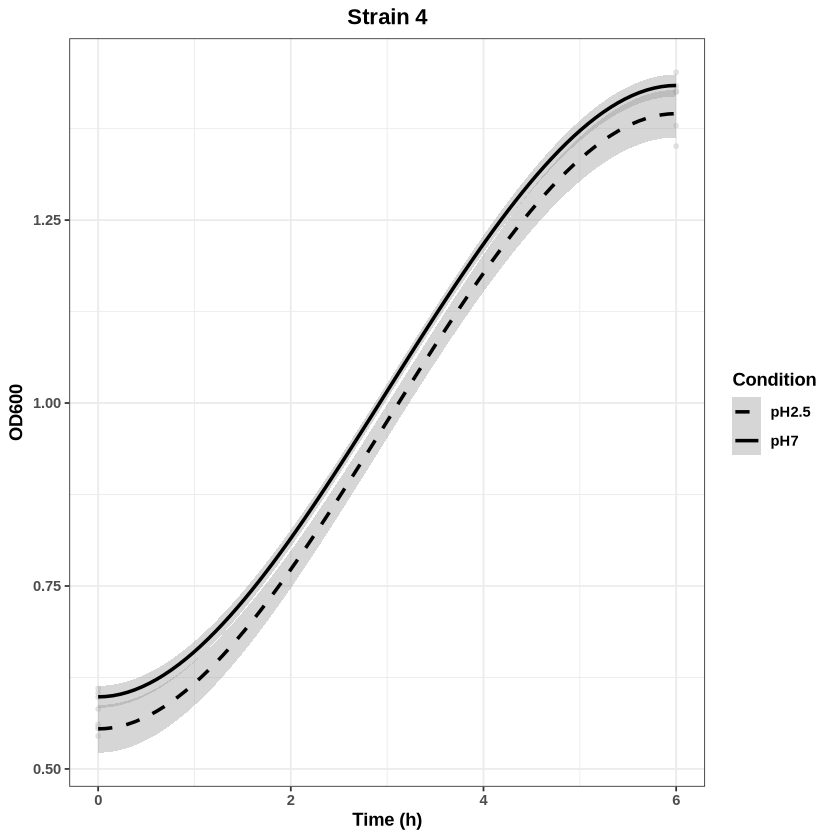

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

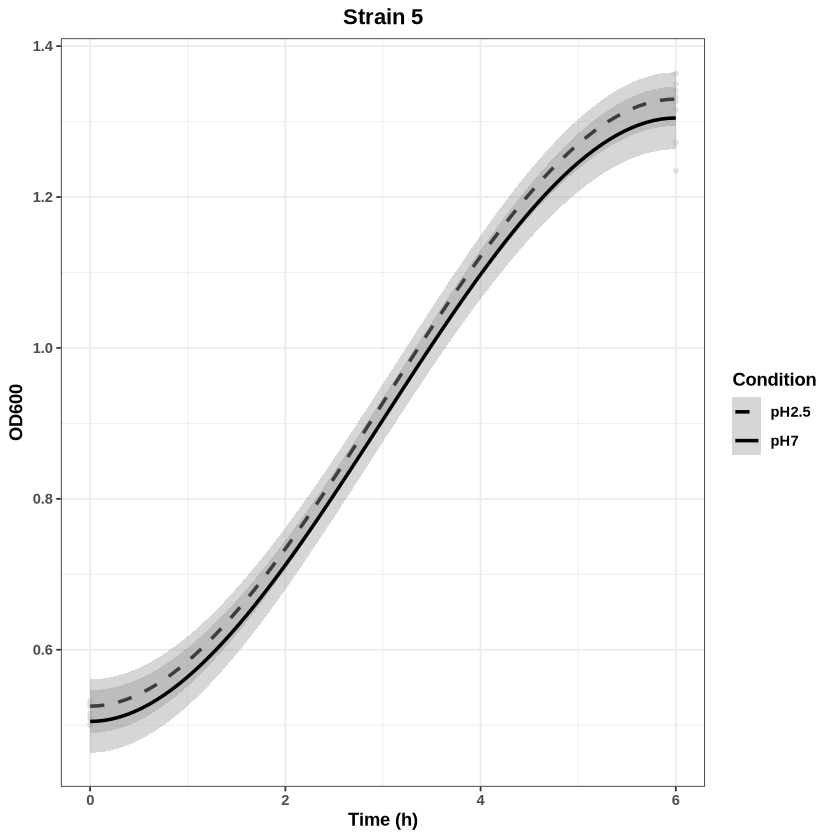

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

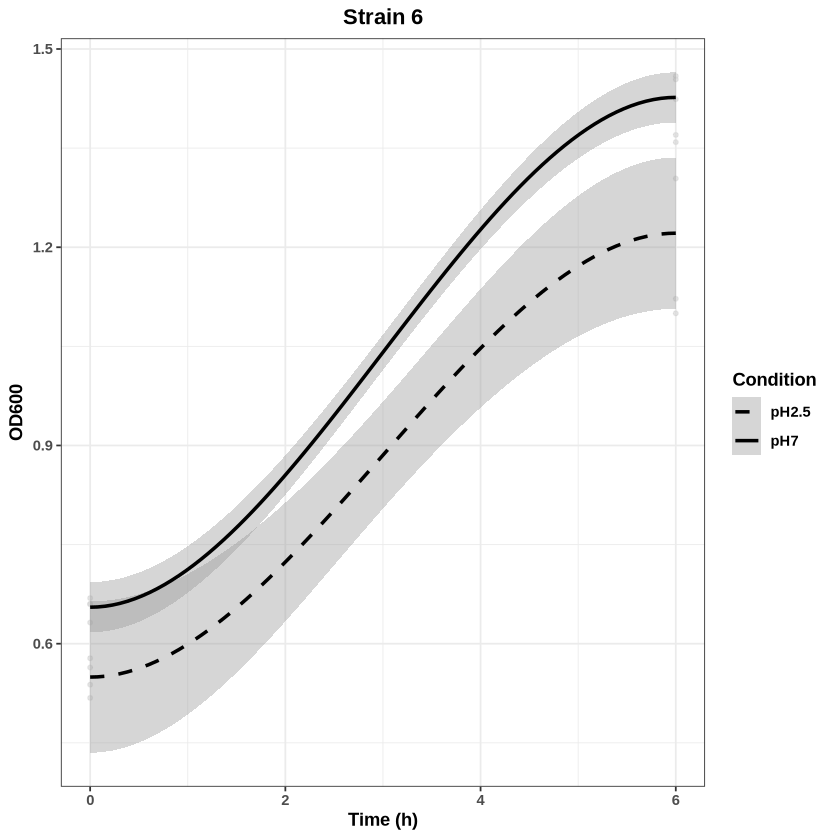

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

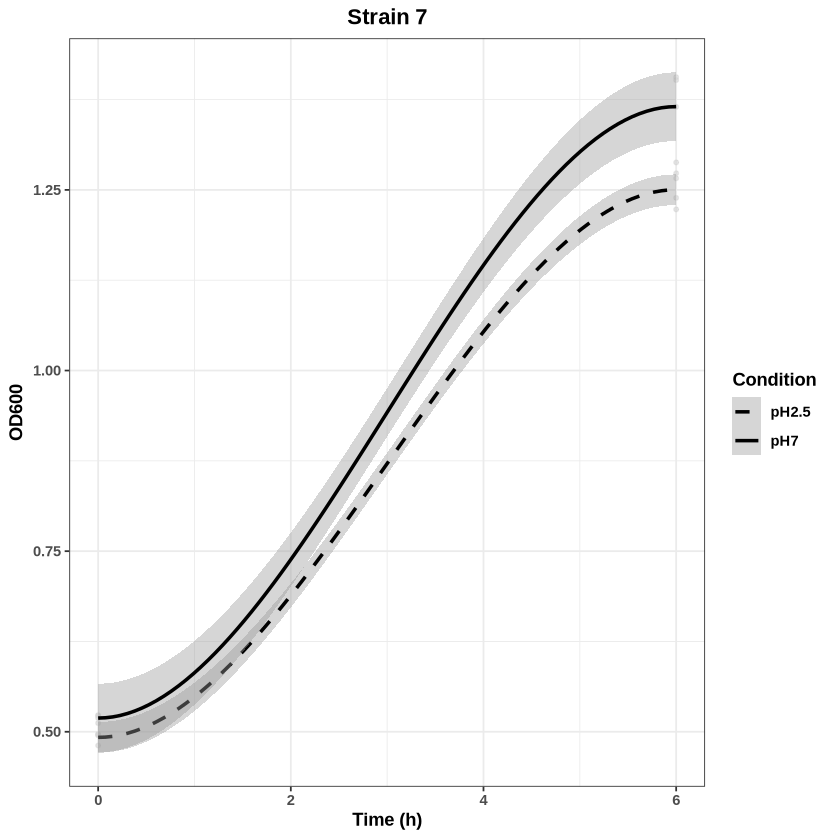

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

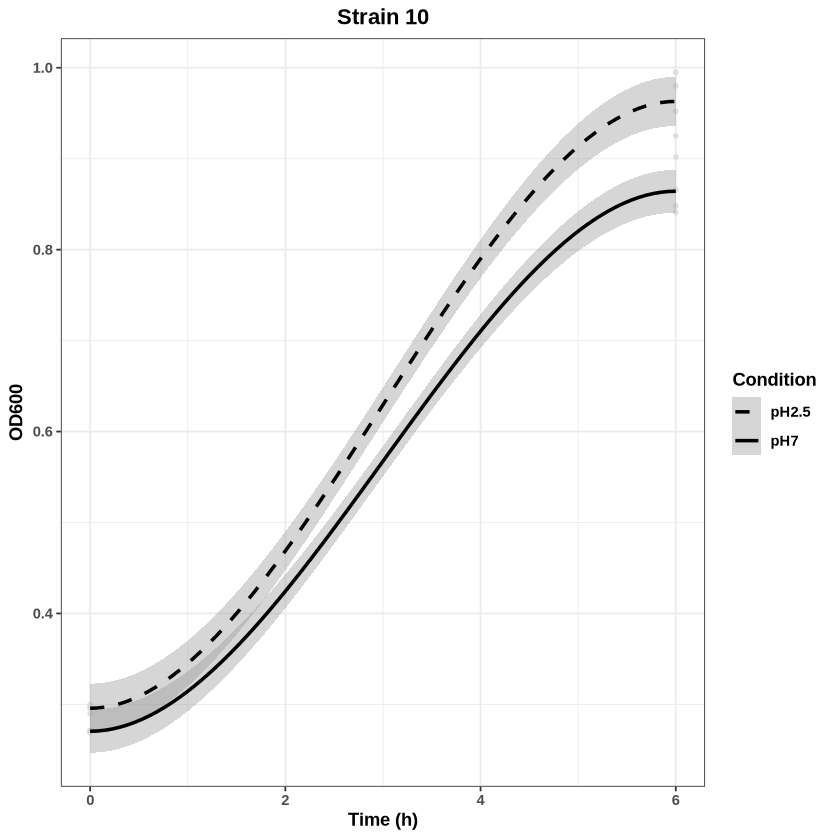

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

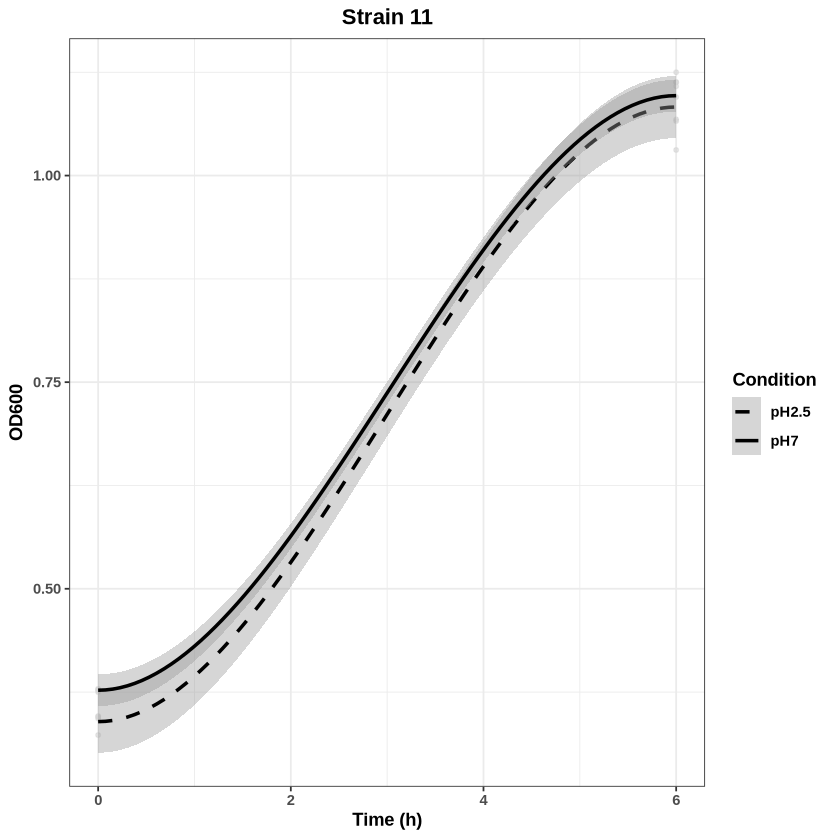

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

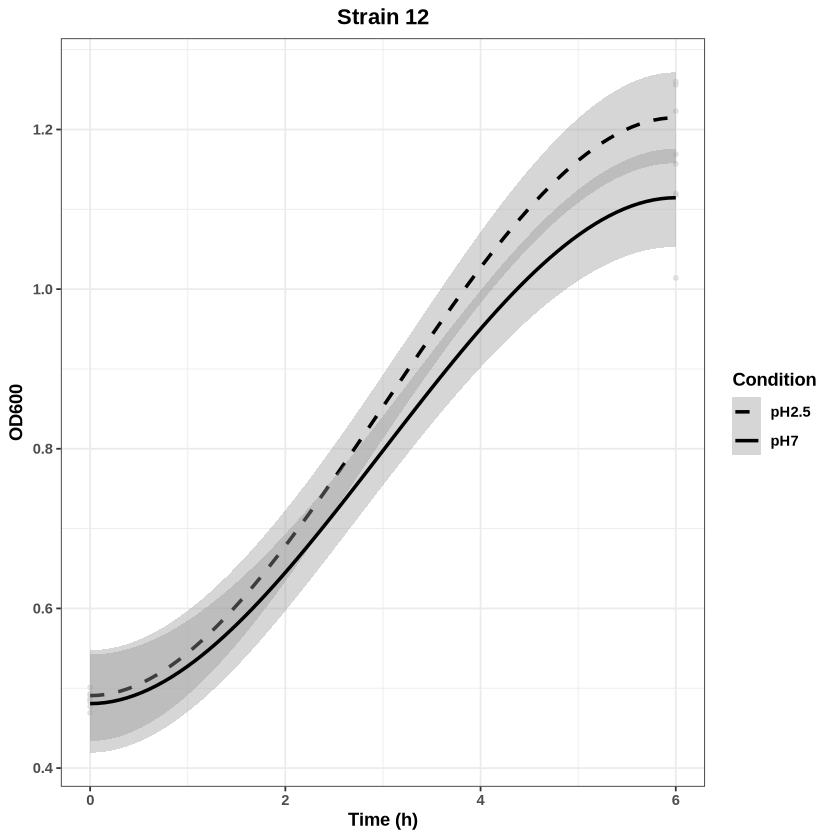

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

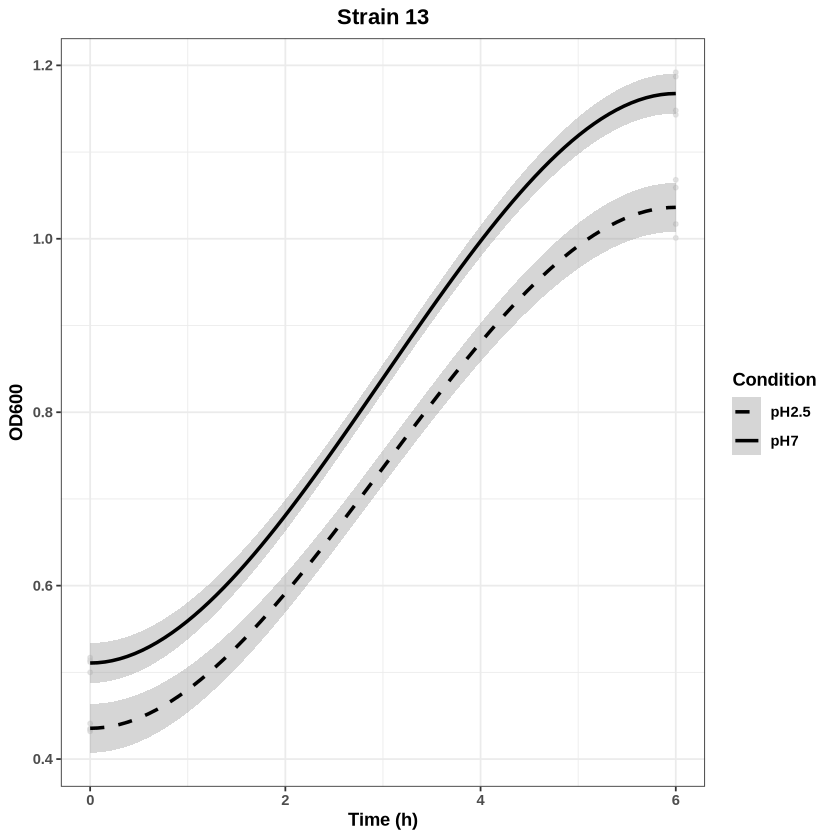

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

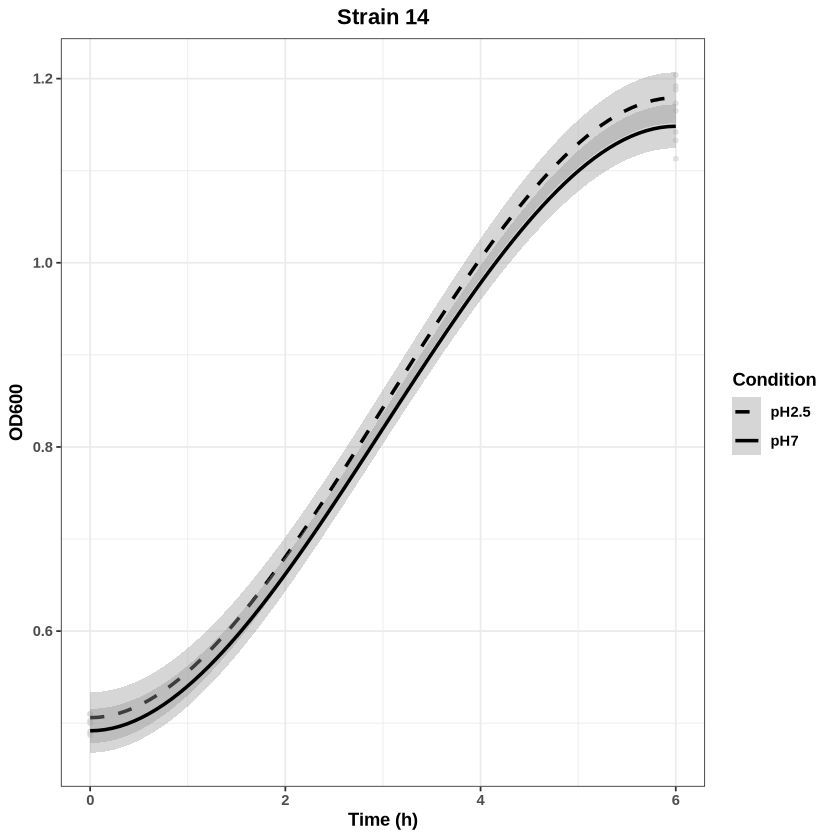

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

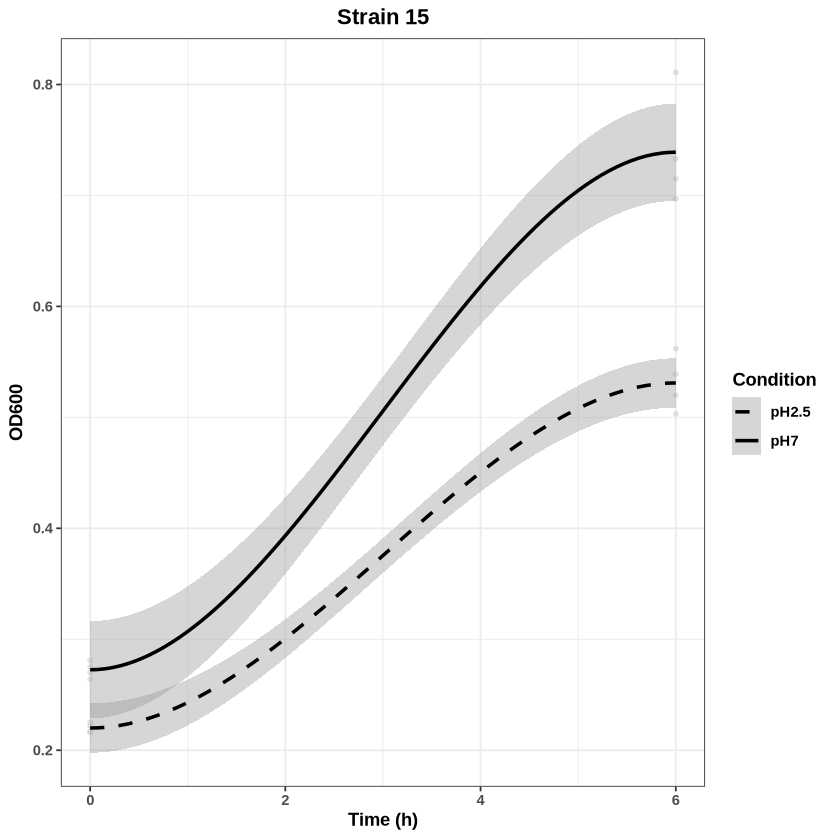

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

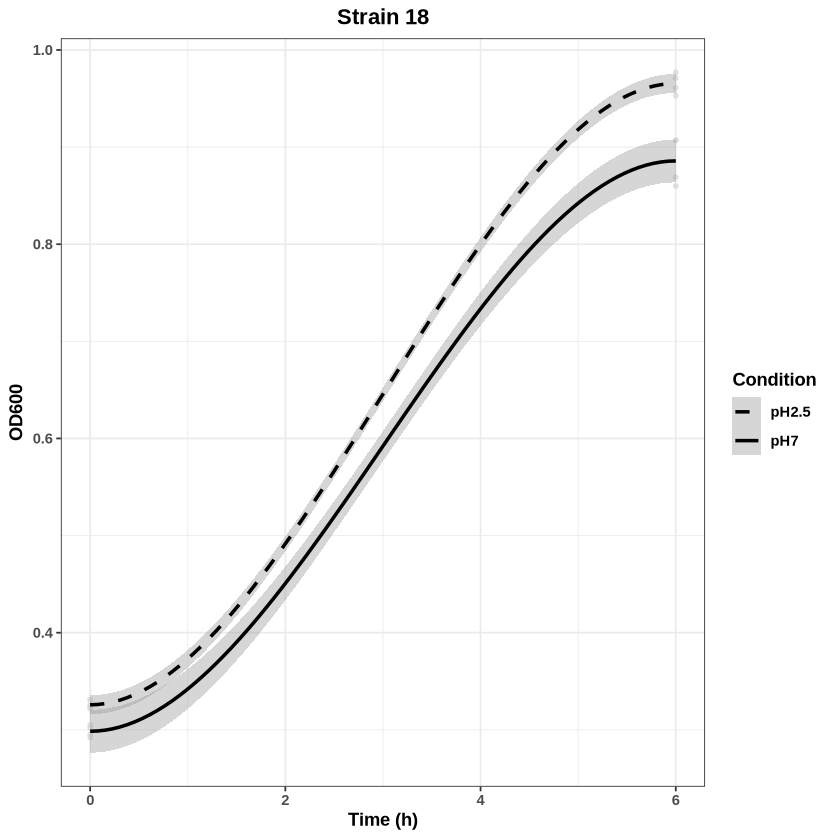

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

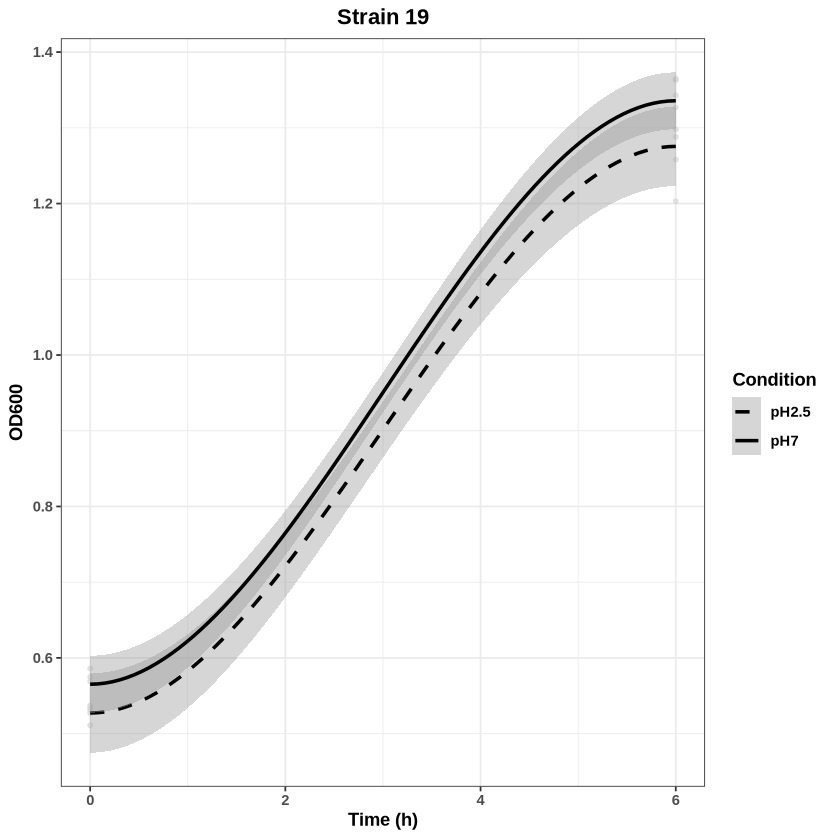

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

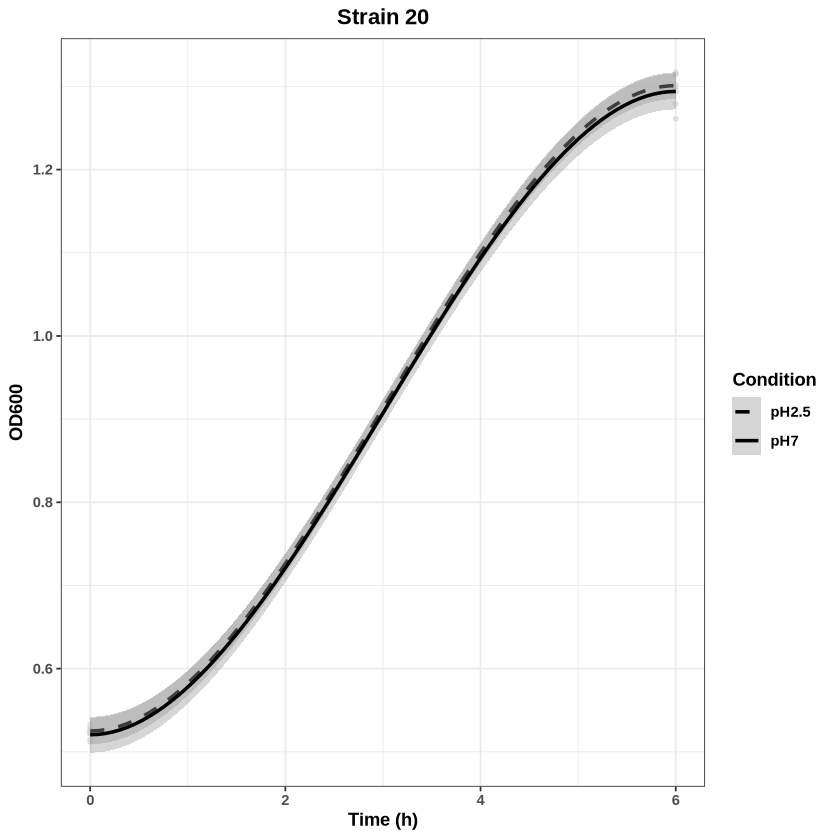

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

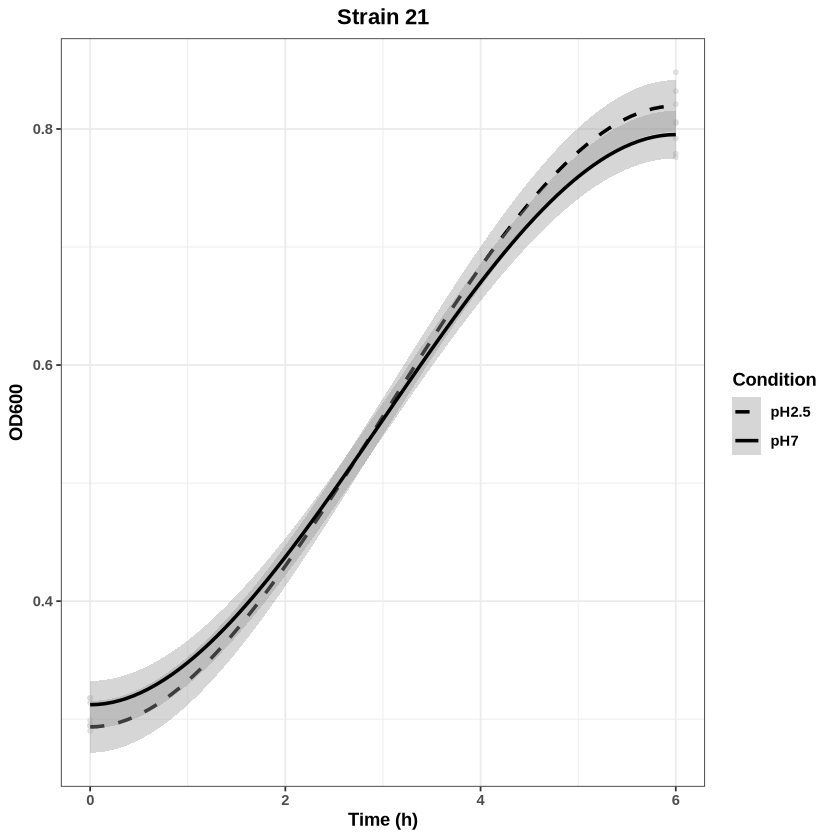

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

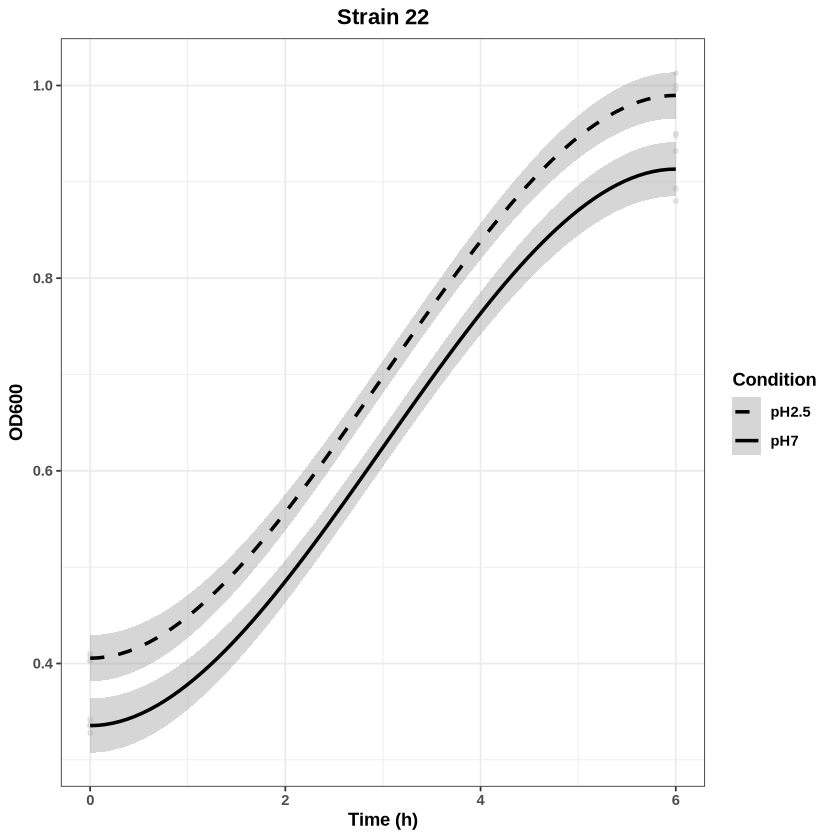

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

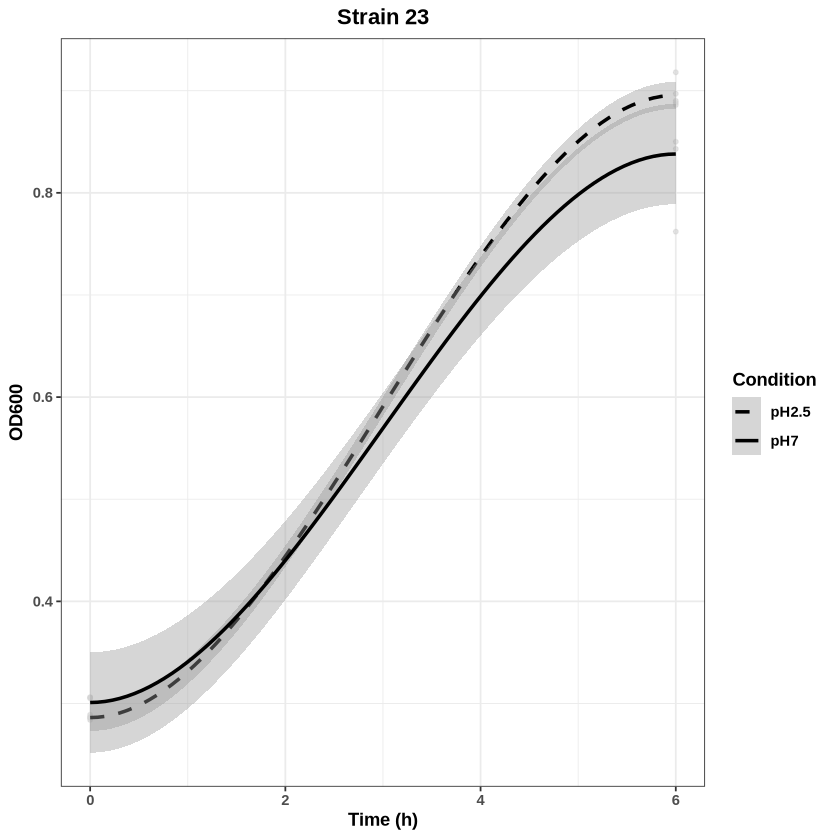

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

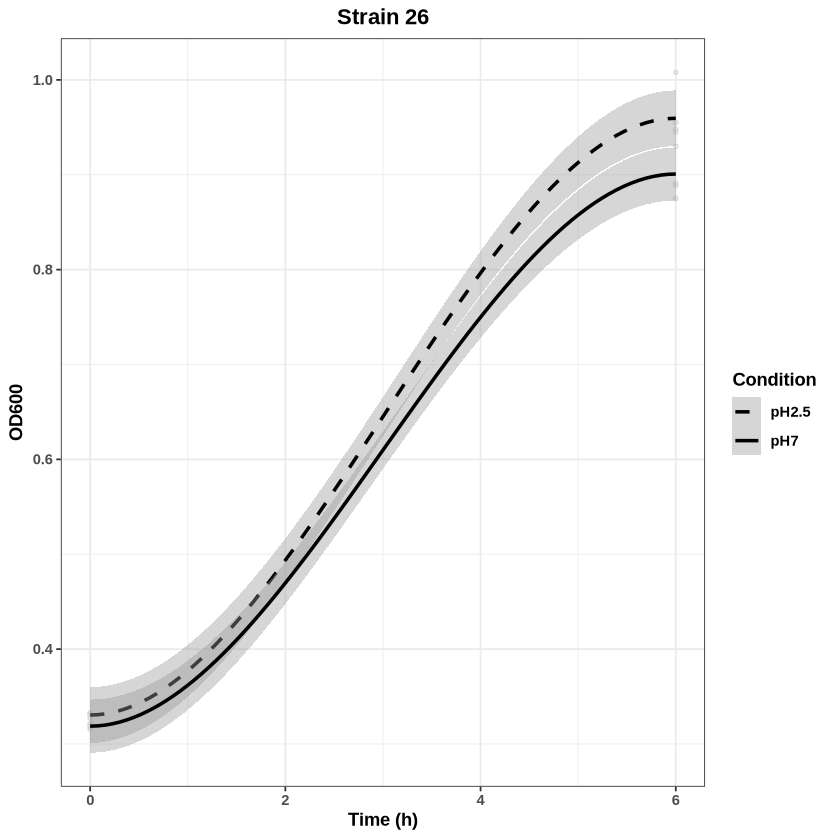

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

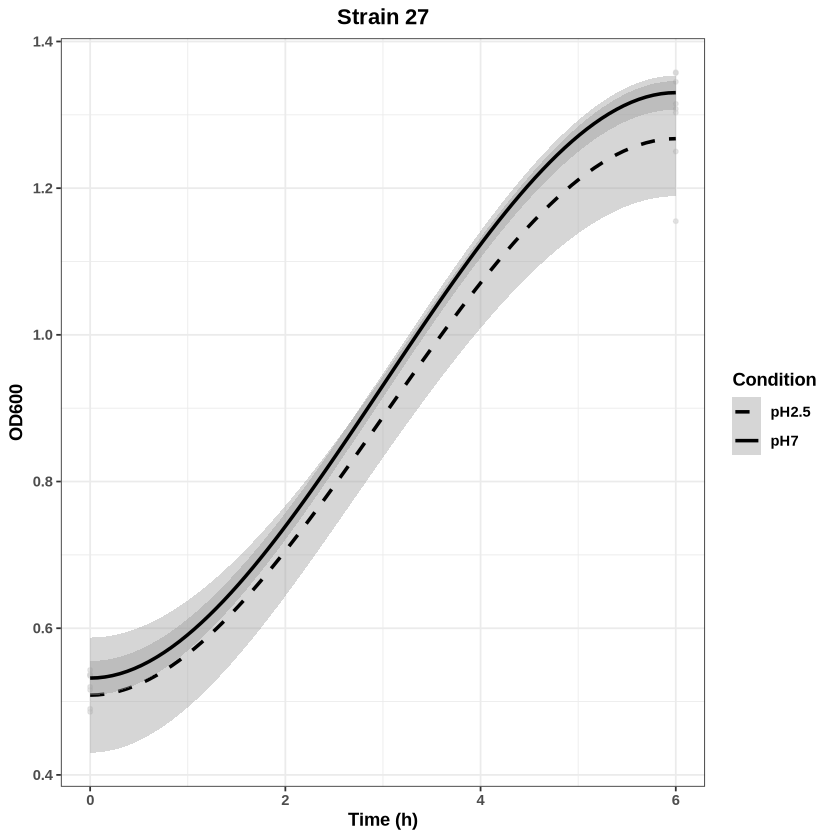

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

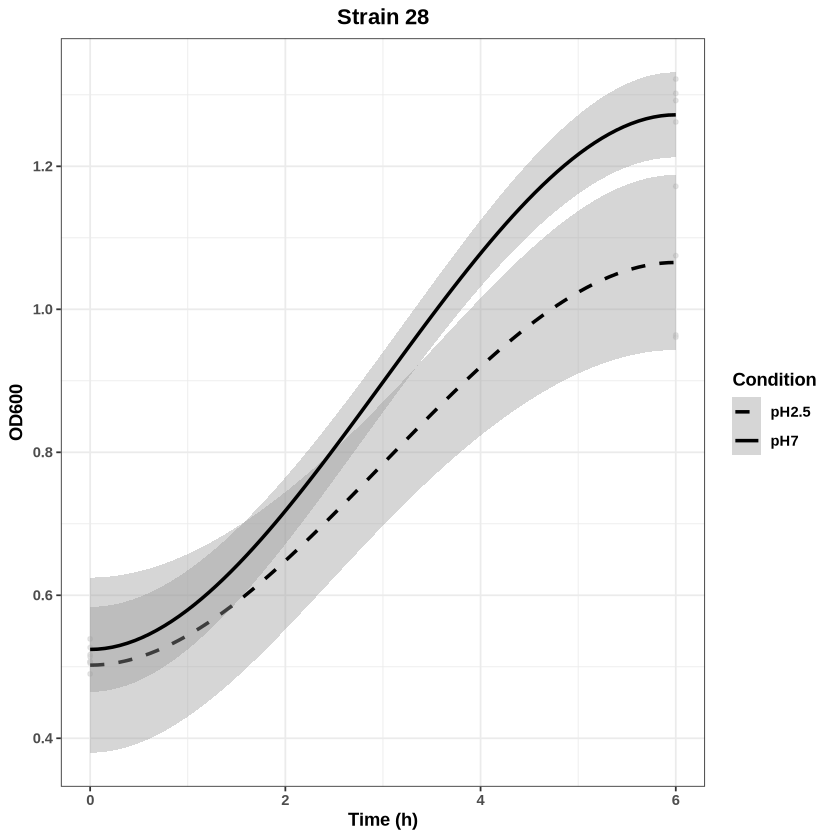

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

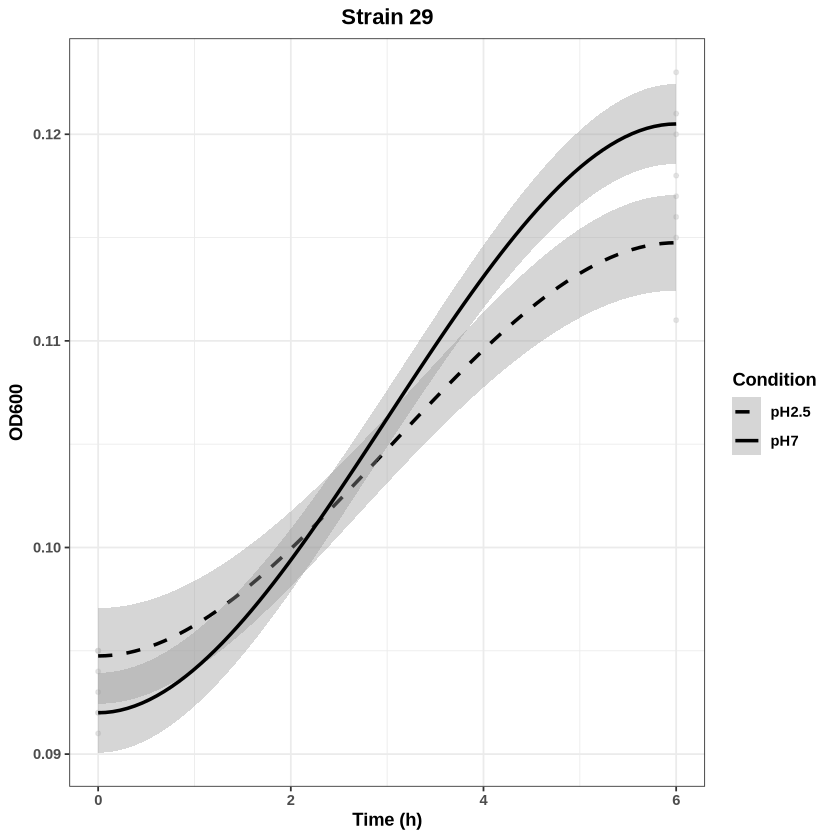

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

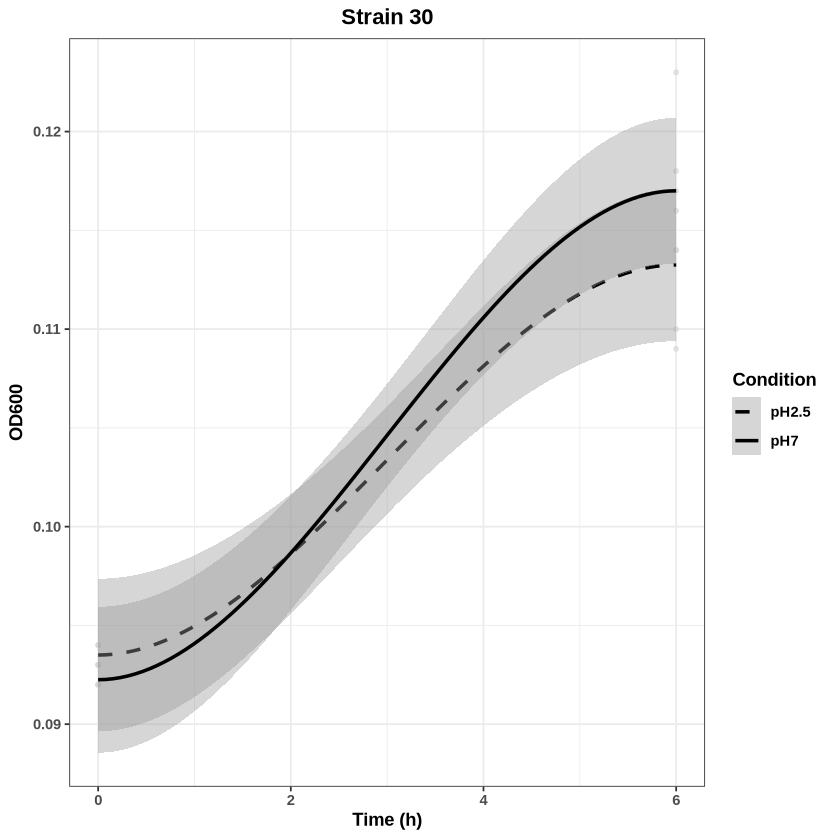

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

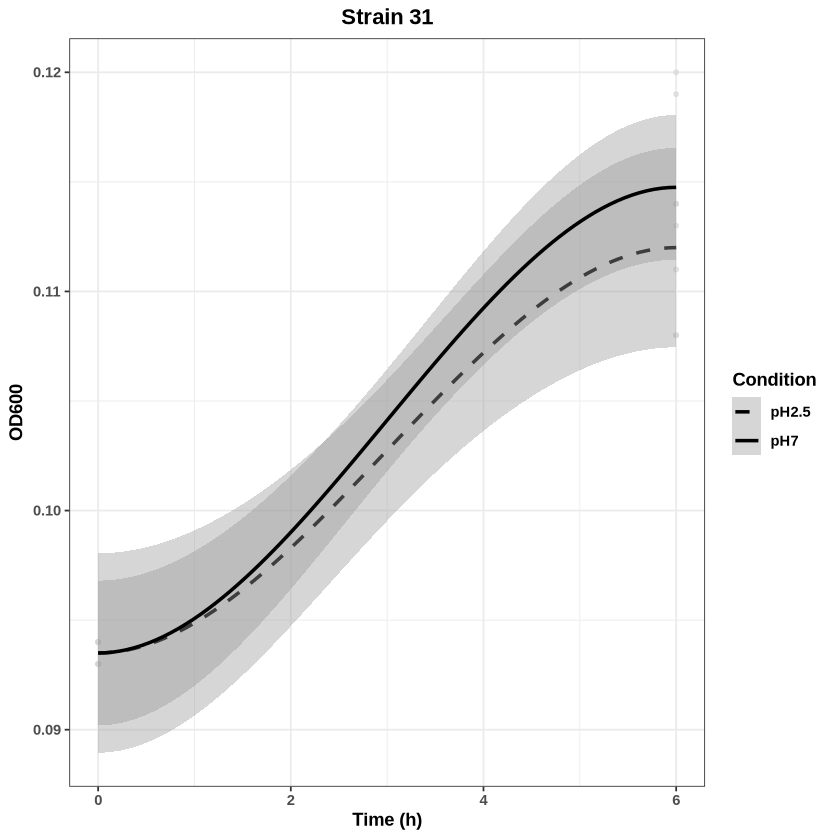

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

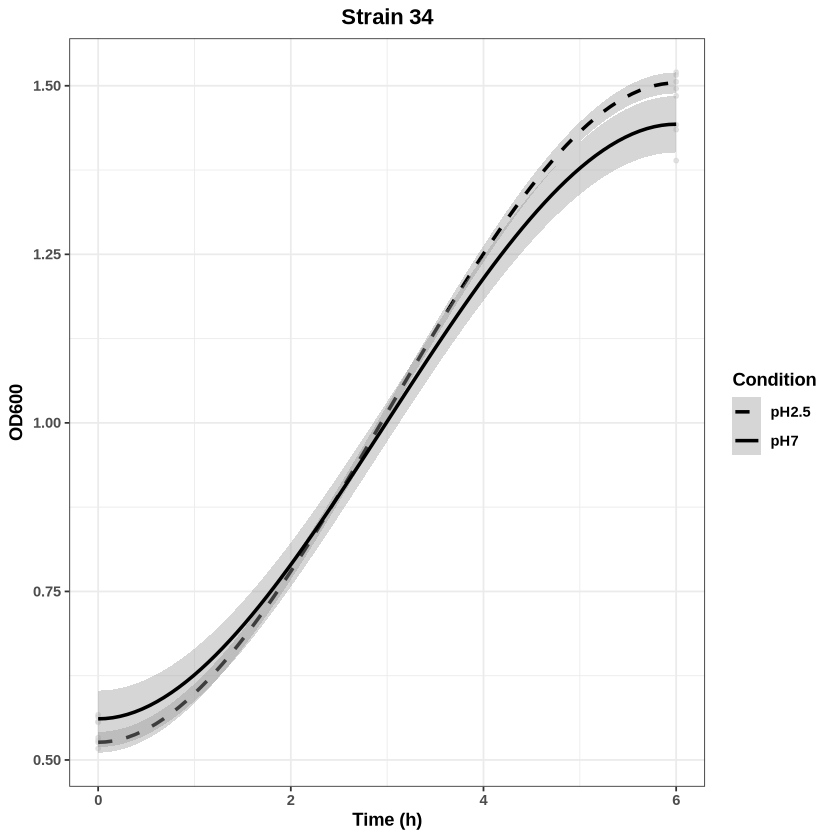

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

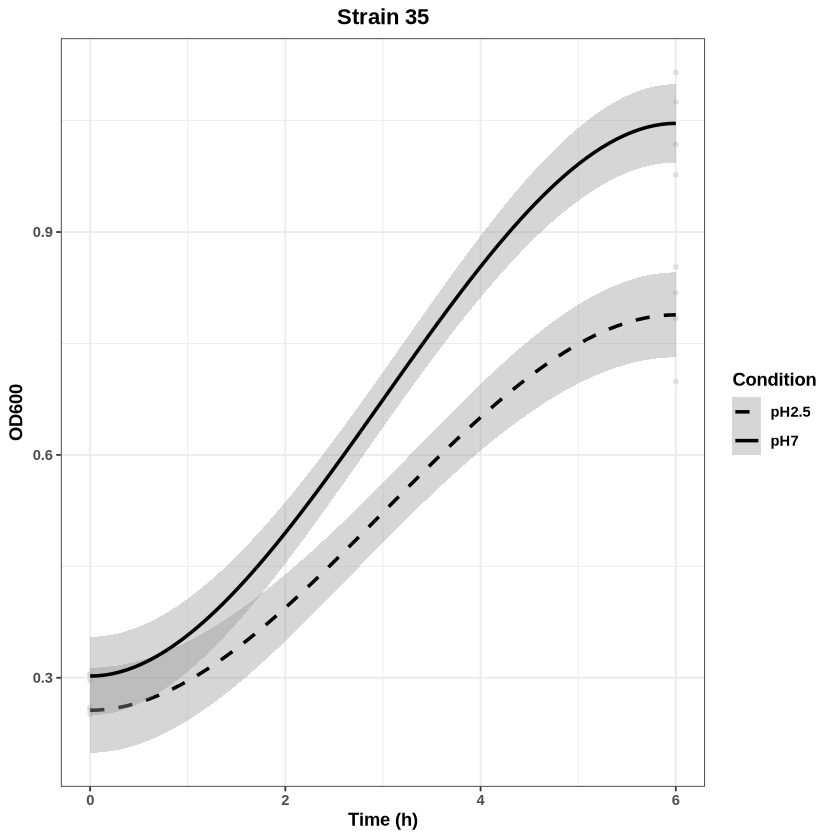

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

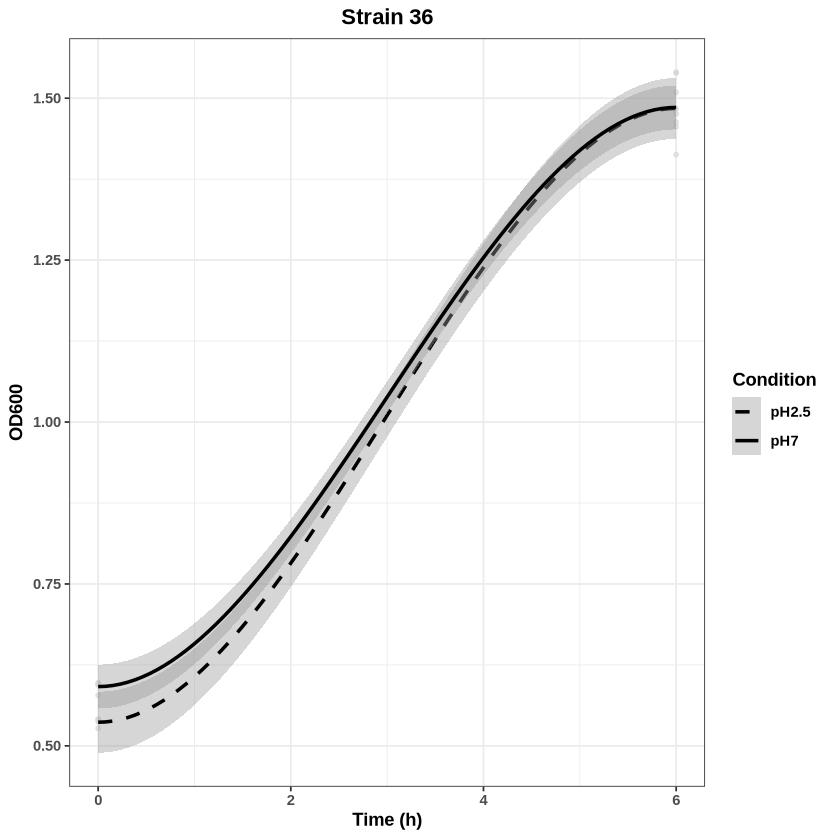

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

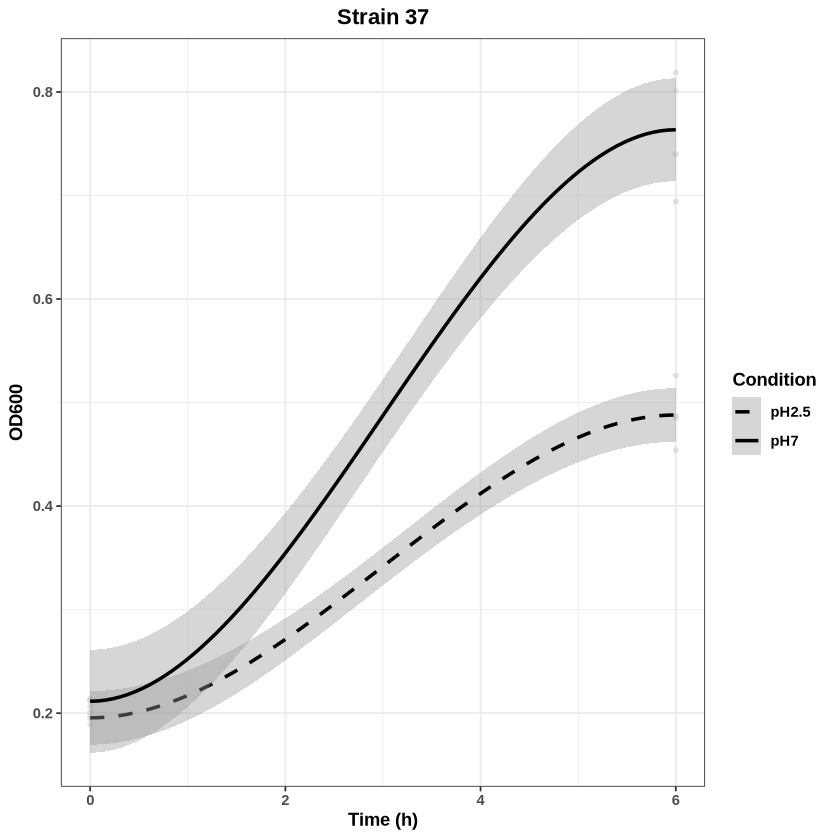

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

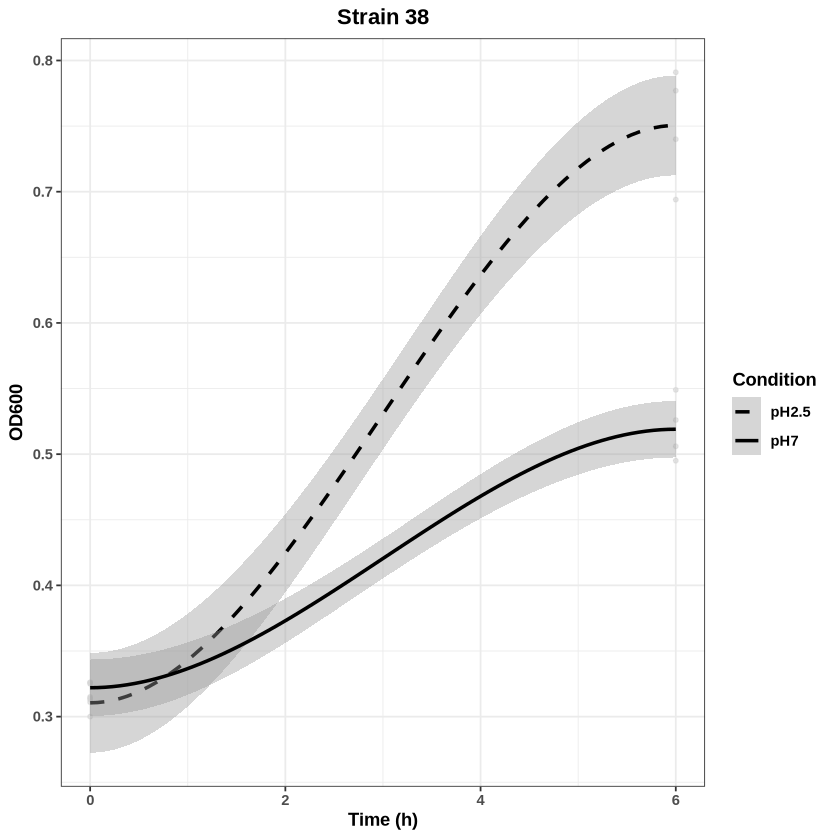

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

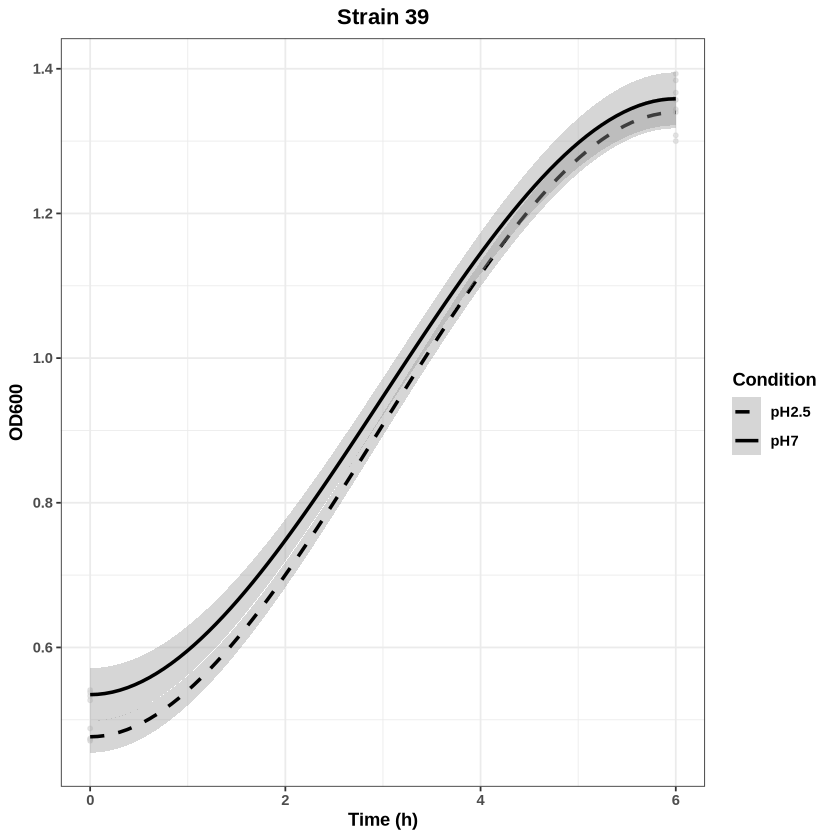

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

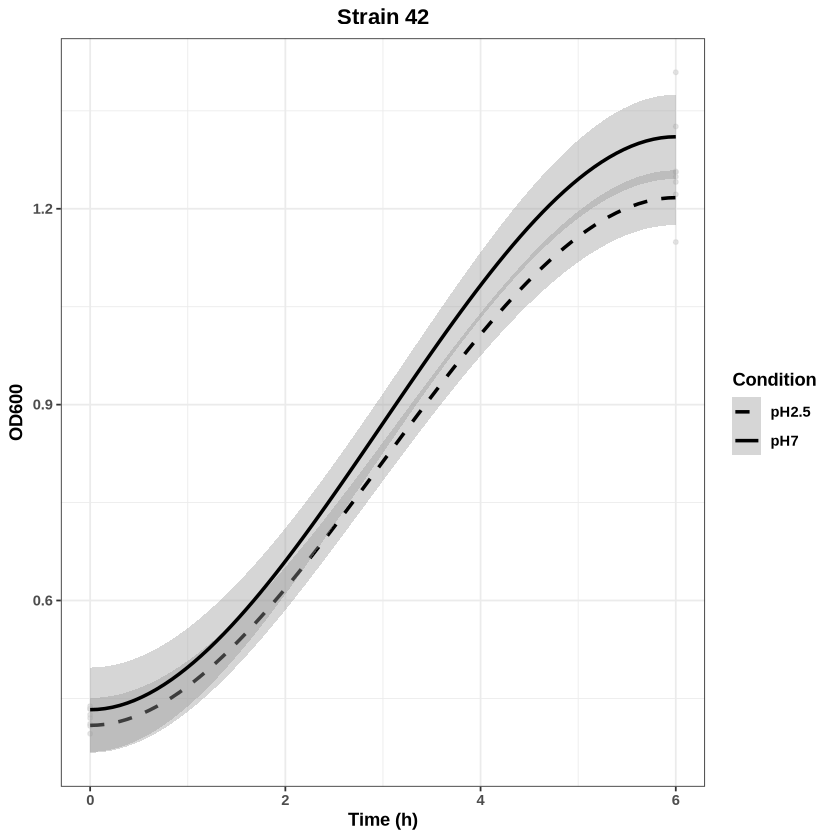

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

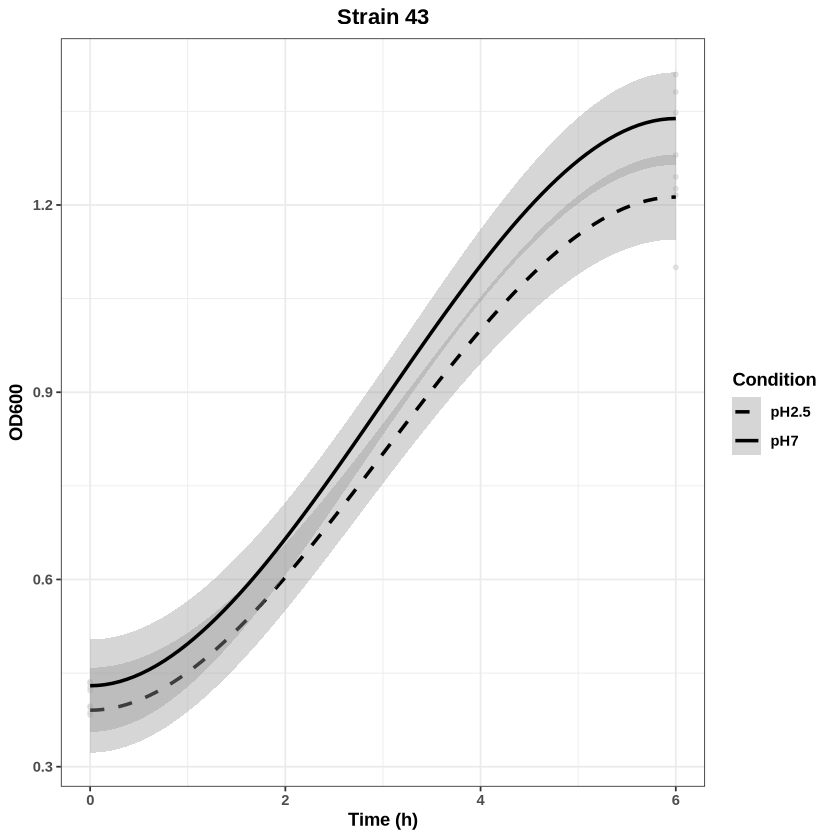

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

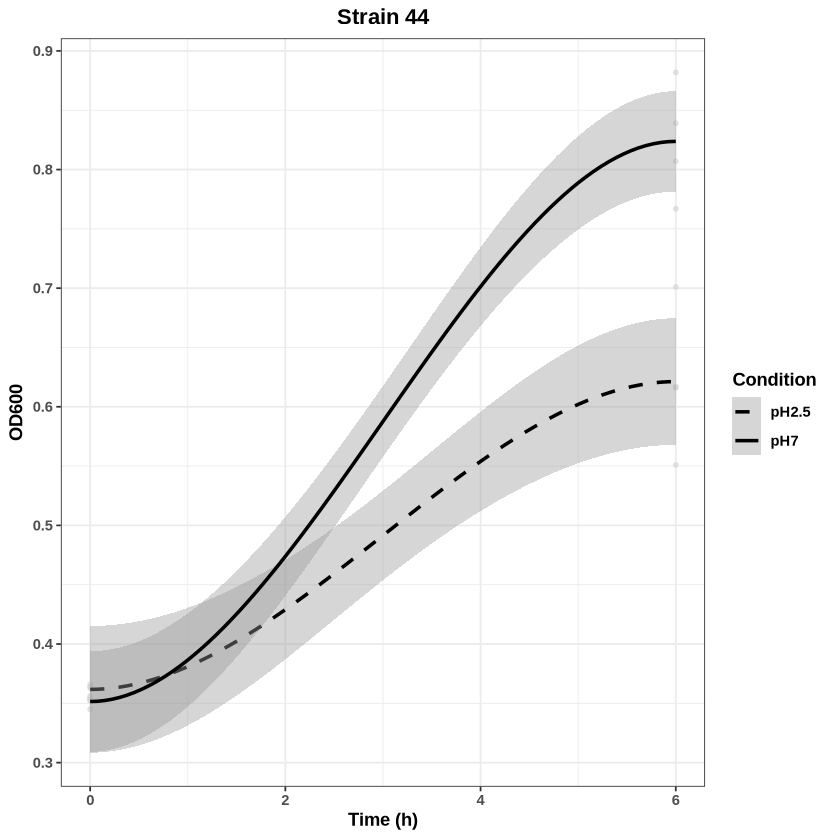

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

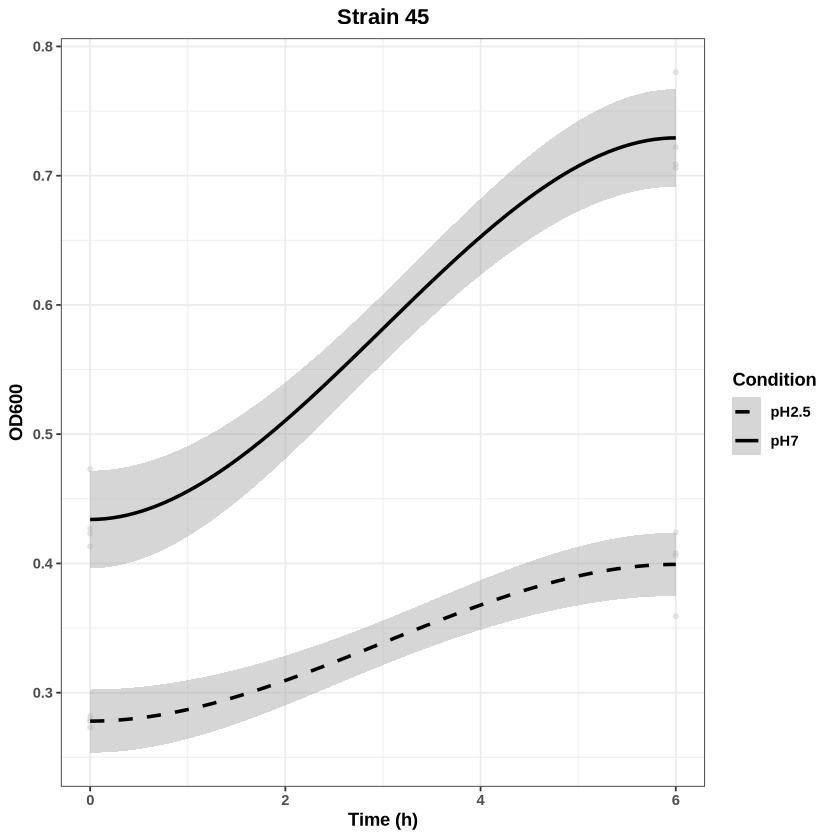

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]

[[22]]

[[23]]

[[24]]

[[25]]

[[26]]

[[27]]

[[28]]

[[29]]

[[30]]

[[31]]

[[32]]

[[33]]

[[34]]

[[35]]

[[36]]


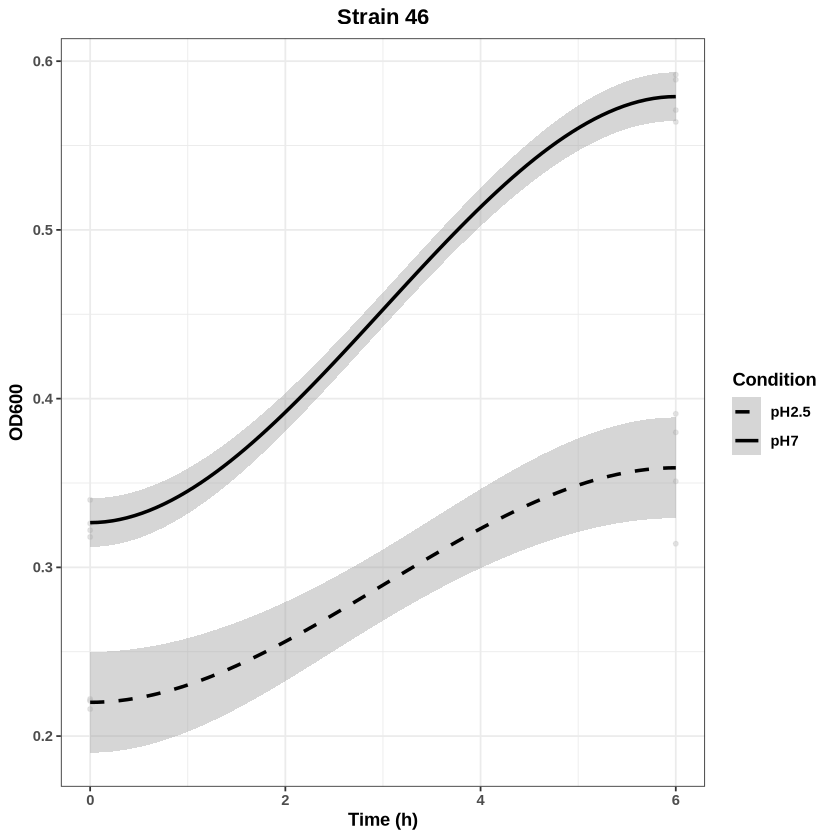

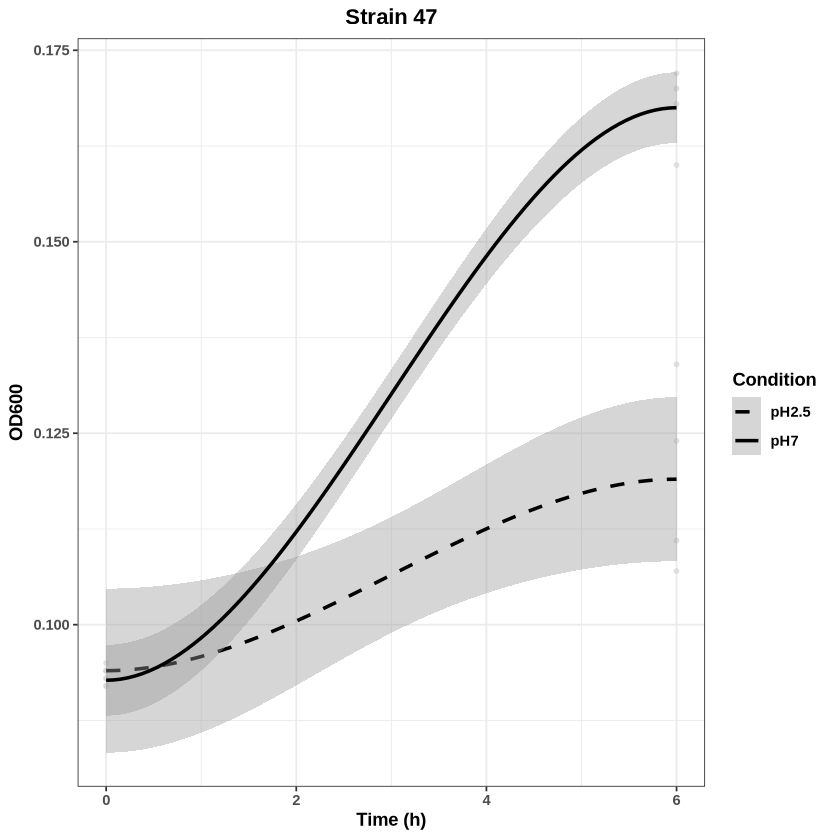

In [28]:
plot_isolate_growth <- function(df, isolate_id) {

  ggplot(
    df %>%
      filter(
        Strain == isolate_id,
        condition != "Blank"
      ),
    aes(x = Time_hr, y = OD600)
  ) +

    ## Raw wells (technical replicates)
    geom_point(
      aes(group = Well),
      color = "lightgray",
      size  = 1,
      alpha = 0.6
    ) +

    ## Smoothed growth curves
    geom_smooth(
      aes(
        linetype = condition,
        group    = condition
      ),
      method    = "loess",
      span      = 0.8,
      se        = TRUE,
      linewidth = 1,
      color     = "black"
    ) +

    ## Enforce line styles
    scale_linetype_manual(
      values = c(
        "pH7"   = "solid",
        "pH2.5" = "dashed"
      )
    ) +

    labs(
      title    = paste("Strain", isolate_id),
      x        = "Time (h)",
      y        = "OD600",
      linetype = "Condition"
    ) +

    theme_bw() +
    theme(
      strip.text   = element_text(face = "bold", size = 11),
      axis.title   = element_text(face = "bold"),
      axis.text    = element_text(face = "bold"),
      legend.title = element_text(face = "bold"),
      legend.text  = element_text(face = "bold"),
      plot.title   = element_text(face = "bold", hjust = 0.5)
    )
}

plots <- lapply(
  unique(plates_long$Strain),
  function(x) plot_isolate_growth(plates_long, x)
)

plots

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

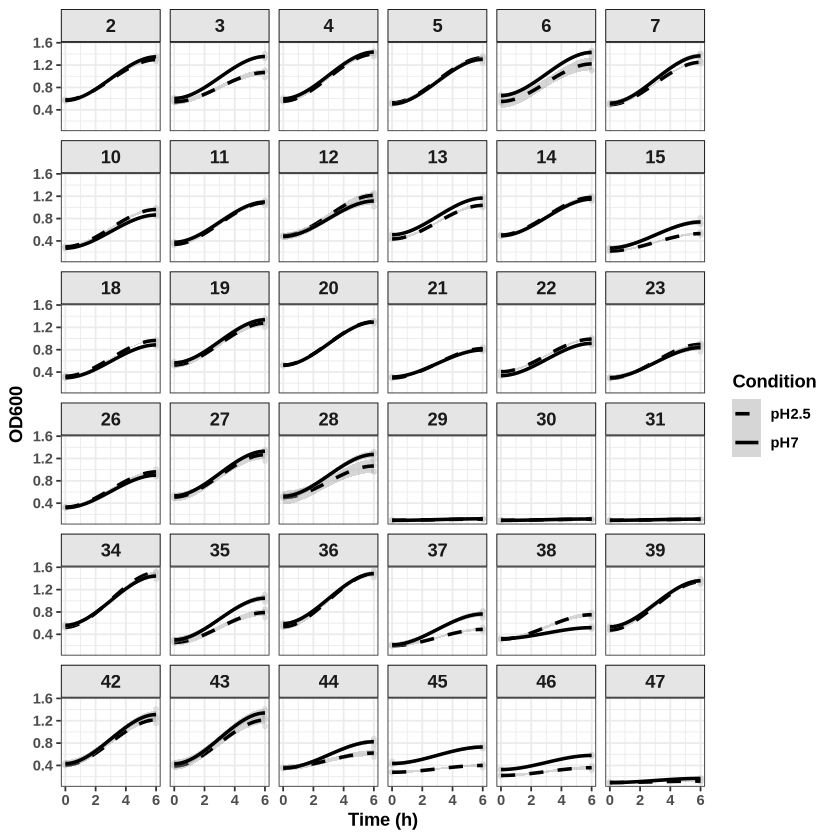

In [30]:
# Make a large pannel
## Compute global y-axis limits
y_limits <- range(
  plates_long$OD600[plates_long$condition != "Blank"],
  na.rm = TRUE
)

ggplot(
  plates_long %>%
    filter(condition != "Blank"),
  aes(x = Time_hr, y = OD600)
) +

  ## Raw wells
  geom_point(
    aes(group = Well),
    color = "lightgray",
    size  = 1,
    alpha = 0.6
  ) +

  ## Smoothed growth curves
  geom_smooth(
    aes(
      linetype = condition,
      group    = condition
    ),
    method    = "loess",
    span      = 0.8,
    se        = TRUE,
    linewidth = 1,
    color     = "black"
  ) +

  ## Facet by strain (shared axes)
  facet_wrap(
    ~ Strain,
    # ncol = 1,
    scales = "fixed"
  ) +

  ## Line styles
  scale_linetype_manual(
    values = c(
      "pH7"   = "solid",
      "pH2.5" = "dashed"
    )
  ) +

  ## Normalized y-axis
  scale_y_continuous(limits = y_limits) +

  labs(
    x        = "Time (h)",
    y        = "OD600",
    linetype = "Condition"
  ) +

  theme_bw() +
  theme(
    strip.background = element_rect(fill = "grey90", color = "black"),
    strip.text       = element_text(face = "bold", size = 11),
    axis.title       = element_text(face = "bold"),
    axis.text        = element_text(face = "bold"),
    legend.title     = element_text(face = "bold"),
    legend.text      = element_text(face = "bold")
  )


In [31]:
ggsave(
  "acid-growth-pilot.png",
  width = 10,
  height = 10,
  dpi = 300
)


`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.03”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.361”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.03”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 6.03”
Warning message in predLoess(object$y, object$x,

In [32]:
glimpse(plates_long)

Rows: 720
Columns: 6
$ Strain    <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, …
$ Well      <chr> "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11"…
$ Time_hr   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ condition <fct> pH2.5, pH2.5, pH2.5, pH2.5, Blank, Blank, pH7, pH7, pH7, pH7…
$ OD600     <dbl> 0.565, 0.585, 0.582, 0.581, 0.157, 0.155, 0.570, 0.566, 0.56…
$ plate     <chr> "a", "a", "a", "a", "a", "a", "a", "a", "a", "a", "a", "a", …


In [36]:
# Compute inhibition ratio for each isolate - using area under curve
## remove blanks & average technical replicates
growth_mean <- plates_long %>%
  filter(condition %in% c("pH7", "pH2.5")) %>%
  group_by(Strain, condition, Time_hr) %>%
  summarise(
    mean_OD = mean(OD600, na.rm = TRUE),
    .groups = "drop"
  )

## compute AUC per strain & condition
auc_df <- growth_mean %>%
  group_by(Strain, condition) %>%
  summarise(
    AUC = trapz(Time_hr, mean_OD),
    .groups = "drop"
  )

head(auc_df)

Strain,condition,AUC
<dbl>,<fct>,<dbl>
2,pH2.5,5.63025
2,pH7,5.74650
3,pH2.5,4.83000
3,pH7,5.87475
4,pH2.5,5.85075
4,pH7,6.09750


In [37]:
## compute inhibition rate
inhibition_df <- auc_df %>%
  tidyr::pivot_wider(
    names_from  = condition,
    values_from = AUC
  ) %>%
  mutate(
    inhibition_rate = 1 - (pH2.5 / pH7)
  )
head(inhibition_df)

Strain,pH2.5,pH7,inhibition_rate
<dbl>,<dbl>,<dbl>,<dbl>
2,5.63025,5.74650,0.02022971
3,4.83000,5.87475,0.17783735
4,5.85075,6.09750,0.04046740
5,5.56500,5.42925,-0.02500345
6,5.31225,6.24600,0.14949568
7,5.22750,5.65275,0.07522887


In [43]:
## Remove blank strains
strains_to_remove <- c(29, 30, 31, 47)

inhibition_df <- inhibition_df %>%
  filter(!Strain %in% strains_to_remove)


In [44]:
## Change strains codes to their names
inhibition_df <- inhibition_df %>%
  mutate(
    Strain = case_when(
      Strain == 46 ~ "BL21",
      Strain == 45 ~ "DH10B",
      Strain == 44 ~ "USA300",
      TRUE        ~ as.character(Strain)
    )
  )


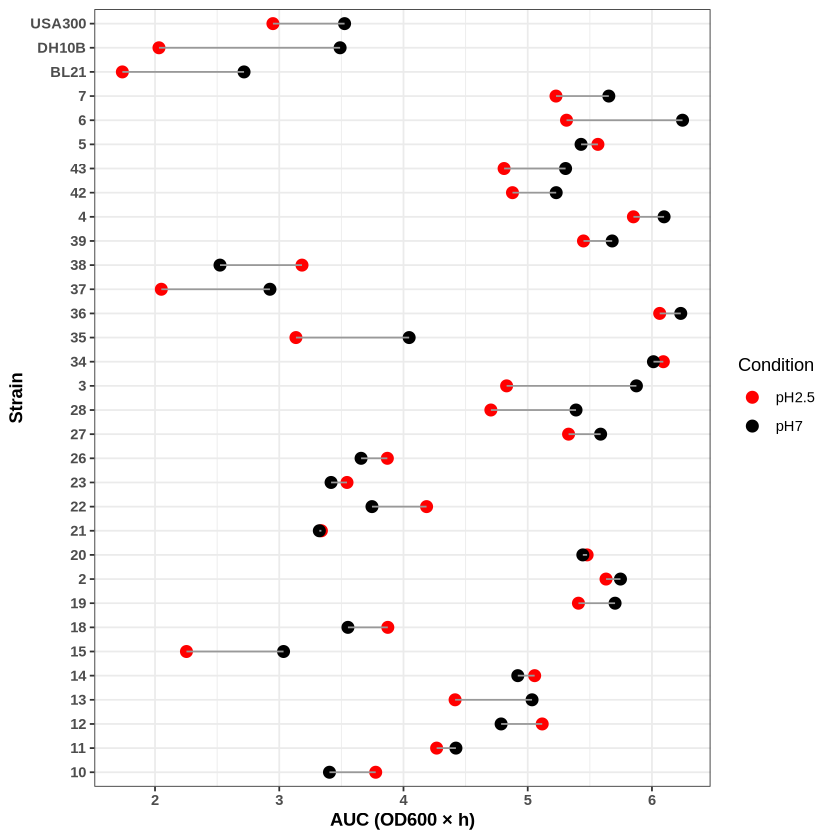

In [46]:
auc_long <- inhibition_df %>%
  pivot_longer(
    cols = c(pH2.5, pH7),
    names_to = "condition",
    values_to = "AUC"
  )

ggplot(
  auc_long,
  aes(x = AUC, y = factor(Strain), color = condition)
) +
  geom_point(size = 3) +
  geom_line(aes(group = Strain), color = "grey60") +
  scale_color_manual(
    values = c("pH7" = "black", "pH2.5" = "red")
  ) +
  labs(
    x = "AUC (OD600 × h)",
    y = "Strain",
    color = "Condition"
  ) +
  theme_bw() +
  theme(
    axis.title = element_text(face = "bold"),
    axis.text  = element_text(face = "bold")
  )



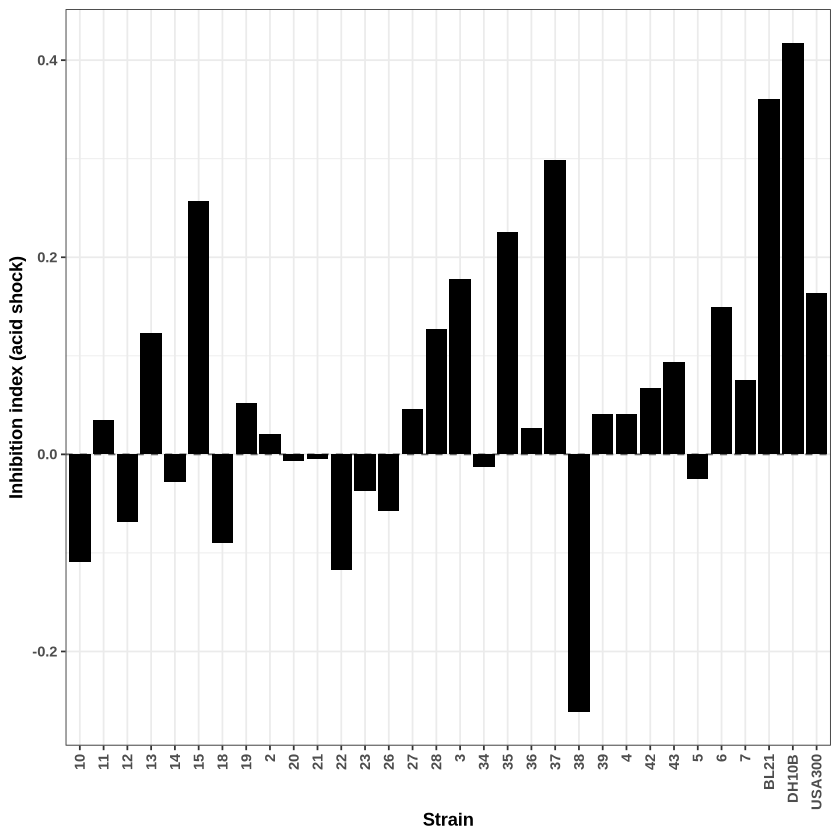

In [49]:
acid_inhib_plot <- ggplot(
  inhibition_df,
  aes(
    x = factor(Strain),
    y = inhibition_rate
  )
) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "grey40") +
  geom_col(fill = "black") +
  labs(
    x = "Strain",
    y = "Inhibition index (acid shock)"
  ) +
  theme_bw() +
  theme(
    axis.title = element_text(face = "bold"),
    axis.text  = element_text(face = "bold"),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)
  ) 

acid_inhib_plot

In [47]:
############################################################
## µmax estimation from growth curves
## Method: maximum slope of ln(OD) vs Time
############################################################

library(dplyr)
library(tidyr)
library(purrr)

## ---- Function to estimate µmax for a single well ----
estimate_mu <- function(df) {

  df <- df %>%
    arrange(Time_hr) %>%
    filter(OD > 0)

  ## Require enough points to estimate slope
  if (nrow(df) < 4) return(NA_real_)

  ## Log-transform OD
  df <- df %>%
    mutate(logOD = log(OD))

  ## Compute discrete slopes between consecutive time points
  slopes <- diff(df$logOD) / diff(df$Time_hr)

  ## Return maximum slope (µmax)
  max(slopes, na.rm = TRUE)
}

## ---- Apply µmax estimation per well ----
mu_well <- od_tp_long %>%
  filter(
    Strain != "Blank",
    !is.na(Carbon),
    OD > 0
  ) %>%
  group_by(
    Medium,
    Strain,
    Carbon,
    Well
  ) %>%
  summarise(
    mu_max = estimate_mu(cur_data()),
    .groups = "drop"
  )


ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `Medium` is not found.


In [17]:
mu_well

Medium,Strain,Carbon,Well,mu_max
<chr>,<chr>,<chr>,<chr>,<dbl>
Classic M9,HC-B1,M9,E7,0.12649826
Classic M9,HC-B1,M9,E8,0.13456433
Classic M9,HC-B1,M9,E9,0.05639775
Classic M9,HC-B1,M9,F7,0.12891455
Classic M9,HC-B1,M9,F8,0.07396007
Classic M9,HC-B1,M9,F9,0.06988097
Classic M9,HC-B1,M9,G7,0.11741980
Classic M9,HC-B1,M9,G8,0.08630637
Classic M9,HC-B1,M9,G9,0.05561282


In [18]:
############################################################
## Aggregate technical replicates
############################################################

mu_summary <- mu_well %>%
  group_by(
    Medium,
    Strain,
    Carbon
  ) %>%
  summarise(
    mu_mean = mean(mu_max, na.rm = TRUE),
    mu_sd   = sd(mu_max, na.rm = TRUE),
    n       = sum(!is.na(mu_max)),
    .groups = "drop"
  )
mu_summary

Medium,Strain,Carbon,mu_mean,mu_sd,n
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
Classic M9,HC-B1,M9,0.09439499,0.03239933,9
Classic M9,HC-B1,M9_GLU,0.21220418,0.02079454,9
Classic M9,HC-B1,M9_SIA,0.15961690,0.04364133,9
Classic M9,USA300,M9,0.18185922,0.02660061,9
Classic M9,USA300,M9_GLU,0.26116870,0.03112776,9
Classic M9,USA300,M9_SIA,0.25000398,0.03044264,9
Modified M9,HC-B1,M9,0.08131503,0.02513734,9
Modified M9,HC-B1,M9_GLU,0.14753017,0.01965229,9
Modified M9,HC-B1,M9_SIA,0.18036759,0.01904590,9


In [20]:
############################################################
## Statistical comparison between media
############################################################

mu_stats <- mu_well %>%
  group_by(
    Strain,
    Carbon
  ) %>%
  summarise(
    p_value = wilcox.test(
      mu_max ~ Medium,
      exact = FALSE
    )$p.value,
    .groups = "drop"
  ) %>%
  mutate(
    p_adj = p.adjust(p_value, method = "BH")
  )
mu_stats

Strain,Carbon,p_value,p_adj
<chr>,<chr>,<dbl>,<dbl>
HC-B1,M9,0.4267767365,0.426776737
HC-B1,M9_GLU,0.0004094601,0.002456761
HC-B1,M9_SIA,0.0168330921,0.020199711
USA300,M9,0.0061138114,0.009250131
USA300,M9_GLU,0.0061667542,0.009250131
USA300,M9_SIA,0.0035514648,0.009250131


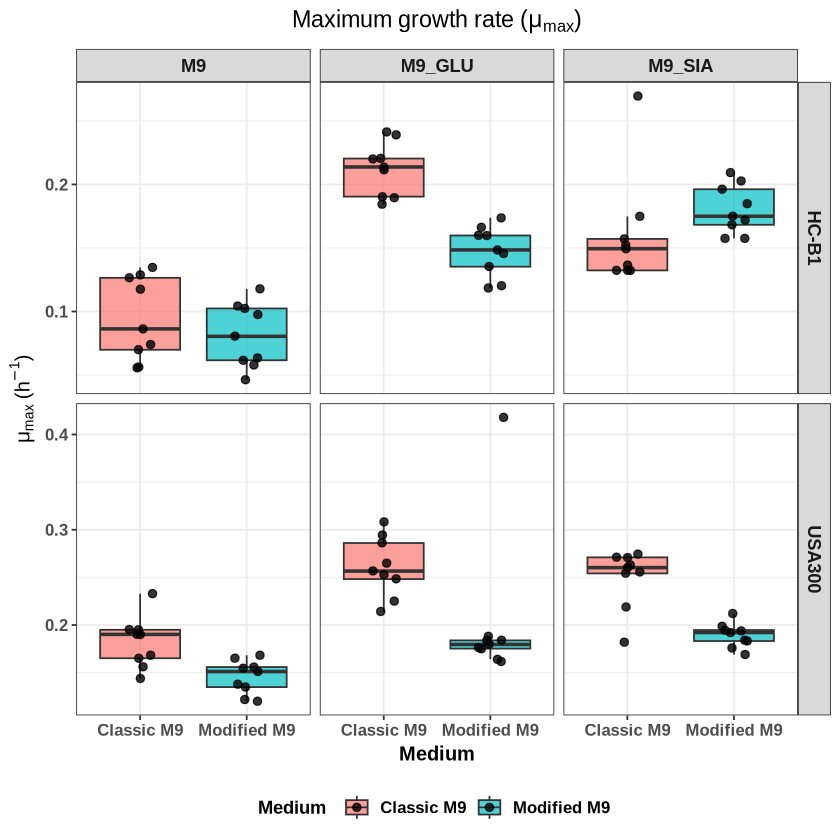

In [22]:
############################################################
## Plot µmax comparison
############################################################
plot_mu <- ggplot(
  mu_well,
  aes(x = Medium, y = mu_max, fill = Medium)
) +
  geom_boxplot(alpha = 0.7, outlier.shape = NA) +
  geom_jitter(width = 0.15, size = 2, alpha = 0.8) +
  facet_grid(Strain ~ Carbon, scales = "free_y") +
  labs(
    x = "Medium",
    y = expression(mu[max]~"(h"^{-1}*")"),
    title = expression("Maximum growth rate ("*mu[max]*")")
  ) +
  theme_bw() +
  theme(
    ## Global text
    text = element_text(face = "bold"),

    ## Axis-specific
    axis.title = element_text(size = 12),
    axis.text  = element_text(size = 10),

    ## Facet strips
    strip.text = element_text(size = 11),

    ## Legend
    legend.position = "bottom",
    legend.title    = element_text(size = 11),
    legend.text     = element_text(size = 10),

    ## Plot title
    plot.title = element_text(size = 14, hjust = 0.5)
  )

plot_mu

In [23]:
ggsave(
  filename = "growth_rates_M9_classic_vs_modified.png",
  plot     = plot_mu,
  width    = 10,
  height   = 6,
  units    = "in"
)

In [25]:
############################################################
## Prepare statistics table for annotation
############################################################

library(dplyr)

mu_stats_plot <- mu_well %>%
  group_by(Strain, Carbon) %>%
  summarise(
    p_value = wilcox.test(mu_max ~ Medium, exact = FALSE)$p.value,
    .groups = "drop"
  ) %>%
  mutate(
    p_adj = p.adjust(p_value, method = "BH"),
    label = case_when(
      p_adj < 0.001 ~ "***",
      p_adj < 0.01  ~ "**",
      p_adj < 0.05  ~ "*",
      TRUE          ~ "ns"
    ),

    ## Define comparison groups explicitly
    group1 = "Classic M9",
    group2 = "Modified M9"
  )
mu_stats_plot

Strain,Carbon,p_value,p_adj,label,group1,group2
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
HC-B1,M9,0.4267767365,0.426776737,ns,Classic M9,Modified M9
HC-B1,M9_GLU,0.0004094601,0.002456761,**,Classic M9,Modified M9
HC-B1,M9_SIA,0.0168330921,0.020199711,*,Classic M9,Modified M9
USA300,M9,0.0061138114,0.009250131,**,Classic M9,Modified M9
USA300,M9_GLU,0.0061667542,0.009250131,**,Classic M9,Modified M9
USA300,M9_SIA,0.0035514648,0.009250131,**,Classic M9,Modified M9


In [29]:
############################################################
## Compute y positions per Strain × Carbon
############################################################

y_pos <- mu_well %>%
  group_by(Strain, Carbon) %>%
  summarise(
    y.position = max(mu_max, na.rm = TRUE) * 1.15,
    .groups = "drop"
  )

mu_stats_plot2 <- mu_stats_plot %>%
  left_join(y_pos, by = c("Strain", "Carbon"))


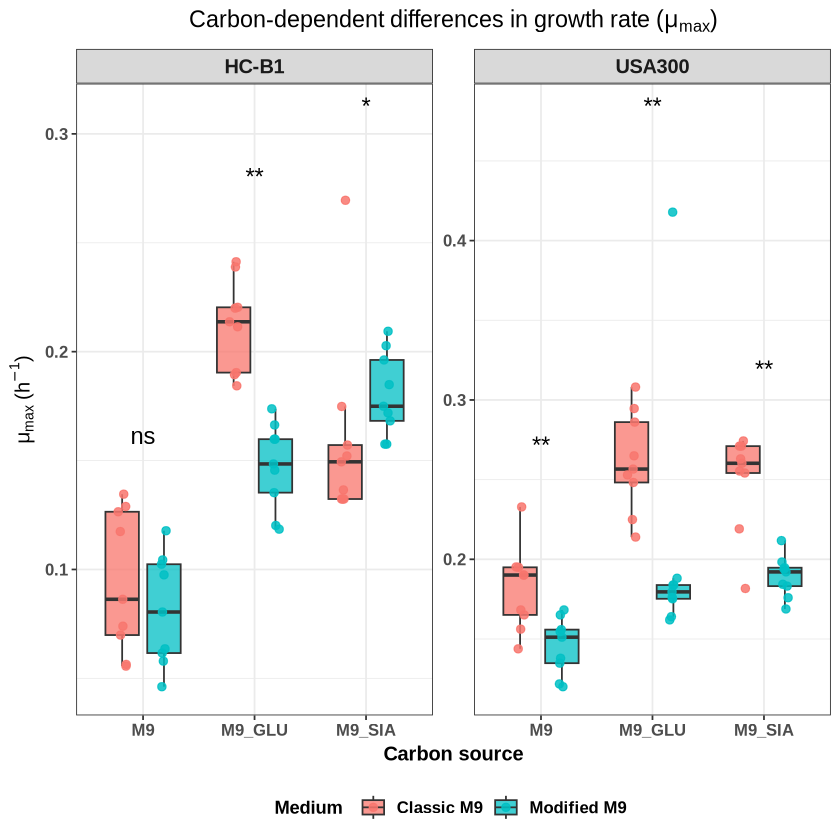

In [30]:
############################################################
## µmax comparison per carbon source
############################################################

library(ggplot2)
library(ggpubr)
library(dplyr)

plot_mu_carbon <- ggplot(
  mu_well,
  aes(x = Carbon, y = mu_max, fill = Medium)
) +
  ## Boxplots per medium
  geom_boxplot(
    position = position_dodge(width = 0.75),
    width = 0.6,
    alpha = 0.75,
    outlier.shape = NA
  ) +
  
  ## Individual well-level points
  geom_jitter(
    aes(color = Medium),
    position = position_jitterdodge(
      jitter.width = 0.15,
      dodge.width  = 0.75
    ),
    size = 2,
    alpha = 0.85
  ) +
  
  ## Statistical significance (Classic vs Modified per carbon)
  stat_pvalue_manual(
    mu_stats_plot2,
    label = "label",
    xmin = "Carbon",
    xmax = "Carbon",
    y.position = "y.position",
    tip.length = 0,
    size = 5
  ) +
  
  facet_wrap(~Strain, scales = "free_y") +
  labs(
    x = "Carbon source",
    y = expression(mu[max]~"(h"^{-1}*")"),
    fill  = "Medium",
    color = "Medium",
    title = expression("Carbon-dependent differences in growth rate ("*mu[max]*")")
  ) +
  theme_bw() +
  theme(
    text = element_text(face = "bold"),
    axis.title = element_text(size = 12),
    axis.text  = element_text(size = 10),
    strip.text = element_text(size = 12),
    legend.position = "bottom",
    legend.title = element_text(size = 11),
    legend.text  = element_text(size = 10),
    plot.title = element_text(size = 14, hjust = 0.5)
  )

plot_mu_carbon


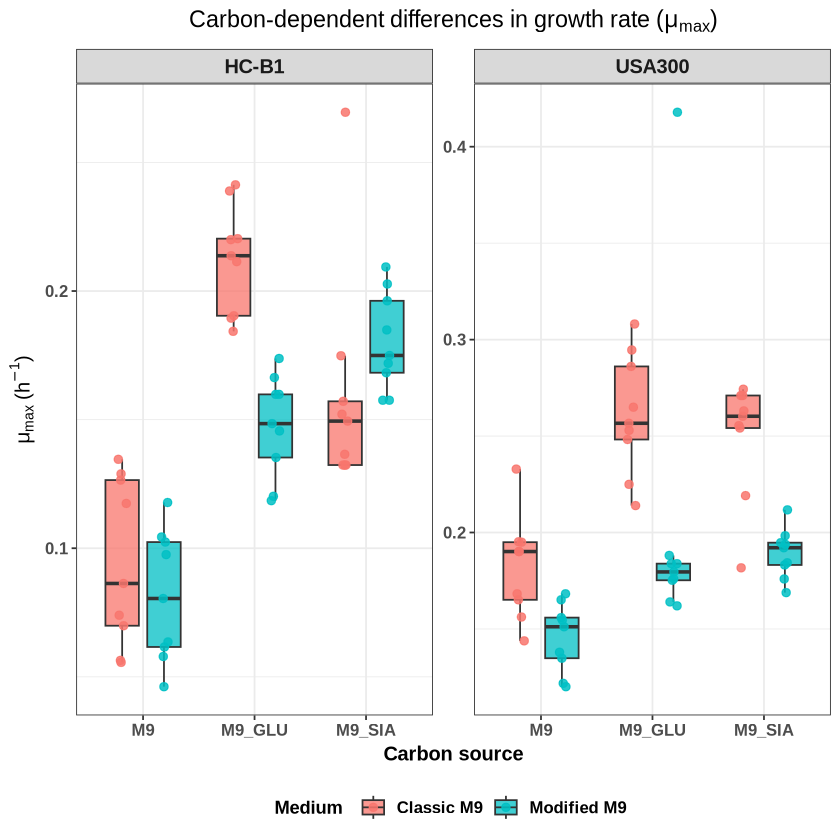

In [31]:
############################################################
## µmax comparison per carbon source (no stats annotation)
############################################################

library(ggplot2)
library(dplyr)

plot_mu_carbon_clean <- ggplot(
  mu_well,
  aes(x = Carbon, y = mu_max, fill = Medium)
) +
  ## Boxplots per medium
  geom_boxplot(
    position = position_dodge(width = 0.75),
    width = 0.6,
    alpha = 0.75,
    outlier.shape = NA
  ) +
  
  ## Individual well-level points
  geom_jitter(
    aes(color = Medium),
    position = position_jitterdodge(
      jitter.width = 0.15,
      dodge.width  = 0.75
    ),
    size = 2,
    alpha = 0.85
  ) +
  
  ## Facet by strain
  facet_wrap(~Strain, scales = "free_y") +
  
  ## Labels
  labs(
    x = "Carbon source",
    y = expression(mu[max]~"(h"^{-1}*")"),
    fill  = "Medium",
    color = "Medium",
    title = expression("Carbon-dependent differences in growth rate ("*mu[max]*")")
  ) +
  
  ## Theme
  theme_bw() +
  theme(
    text = element_text(face = "bold"),
    axis.title = element_text(size = 12),
    axis.text  = element_text(size = 10),
    strip.text = element_text(size = 12),
    legend.position = "bottom",
    legend.title = element_text(size = 11),
    legend.text  = element_text(size = 10),
    plot.title = element_text(size = 14, hjust = 0.5)
  )

plot_mu_carbon_clean


In [33]:
ggsave(
  filename = "growth_rates_M9_PERCARB-modifxclassic2.png",
  plot     = plot_mu_carbon_clean,
  width    = 10,
  height   = 6,
  units    = "in"
)